# 環境構築



*   Pythonモジュールへのパス追加





In [1]:
!pwd

/mnt/MachineLearning/NoteBook/NumDropletsRoI/TimeMean


In [2]:
# import os

# os.chdir("/mnt/MachineLearning")

In [3]:
import sys
sys.path.append('/mnt/MachineLearning/modules')

In [4]:
%matplotlib inline
import os
import glob
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import interpolate
import show_mod

# 前処理

In [4]:
#読み込むデータのパスの設定

# data_path = './data'
# input_list = glob.glob(data_path+"/*"+"/inputdata.csv")

# input_list

In [5]:
#input(空調条件等)の読み込み
# df_input = None

# for input_fname in input_list:
#     df_read = pd.read_csv(input_fname, index_col="case_name")
#     if df_input is None:
#         df_input = df_read
#     else:
#         df_input = pd.concat([df_input, df_read])

# df_input

In [6]:
#空調条件のみ抽出
# df_meta = df_input.loc[:, ['aircon', 'ventilation', 'exhaust']]

# df_meta

In [7]:
#排気口位置a,b,offをダミー変数化

# df_meta = pd.get_dummies(df_meta, columns=['exhaust'])
# # dummies = pd.get_dummies(df_input['exhaust'])
# # df_input.drop("exhaust", axis=1, inplace=True)
# # df_input = pd.concat([df_input, dummies], axis=1)
# # df_input = df_input.reindex(columns=['aircon','ventilation','exhaust_a','b','off'
# #           ,'1_x','1_y','1_z','1_angle','2_x','2_y','2_z','2_angle','3_x','3_y','3_z','3_angle'
# #           ,'4_x','4_y','4_z','4_angle','5_x','5_y','5_z','5_angle',"office_size_x","office_size_y"
# #           ,"aircon_position_x","aircon_position_y"])

# df_meta

# データ追加（2022/10/26）

- データ数：from 263 to 431
- オフィス数：from 9 to 15 (ID : 1,2,3,4,5,6,7,8,9,10,14,15,16,22,28)

In [8]:
# df_count = pd.read_csv("./CountResults/data_added_221018/sitting/count_from2sec_patientAverage.csv", index_col="casename")
df_count = pd.read_csv("/mnt/MachineLearning/CountResults/data_added_221018/sitting/count_from2sec_patientAverage.csv")
df_count

,casename,num_drop,volume[ml],RoI
0,office2_0_0,6739.4,0.000067,204.224242
1,office2_0_164_aout,7865.4,0.000063,238.345455
2,office2_0_164_bout,6049.8,0.000062,183.327273
3,office2_0_246_aout,7934.4,0.000050,240.436364
4,office2_0_246_bout,7662.0,0.000082,232.181818
...,...,...,...,...
426,office3_960_164_bout,5117.4,0.000075,155.072727
427,office3_960_246_aout,4428.0,0.000073,134.181818
428,office3_960_246_bout,3890.0,0.000066,117.878788
429,office3_960_82_aout,5221.2,0.000072,158.218182


In [9]:
def get_val_from_casename(casename:str, index:int):
    return float(casename.split("_")[index])

print(get_val_from_casename("office2_0_164_aout", 2))

164.0


In [10]:
def get_exhaust_from_casename(casename:str):
    s_split = casename.split("_")
    if len(s_split) == 4:
        exhaust_str = s_split[3]
        if exhaust_str == "aout":
            exhaust = "a"
        elif exhaust_str == "bout":
            exhaust = "b"
    else:
        exhaust = "off"
        
    return exhaust

print(get_exhaust_from_casename("office2_0_164"))

off


In [11]:
# df_count["aircon"] = df_count["casename"].apply(get_val_from_casename, args=(1,))
# df_count["ventilation"] = df_count["casename"].apply(get_val_from_casename, args=(2,))
# df_count["exhaust"] = df_count["casename"].apply(get_exhaust_from_casename)
                                                     
# df_count

In [12]:
# df_summary = df_count

In [13]:
# df_summary.to_csv("/mnt/MachineLearning/data/summary_221015.csv", index=False)

# データ取り込み

In [5]:
df_summary = pd.read_csv("/mnt/MachineLearning/data/summary_20221216.csv")

df_summary

,case_name,office,aircon,ventilation,exhaust,n_from2sec,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand
0,office2_0_0,office2,0.0,0.0,off,6739.4,204.224242,902.212978,3665.252246
1,office2_0_164_aout,office2,0.0,164.0,a,7865.4,238.345455,594.272879,3491.917804
2,office2_0_164_bout,office2,0.0,164.0,b,6049.8,183.327273,432.678869,2354.737770
3,office2_0_246_aout,office2,0.0,246.0,a,7934.4,240.436364,326.691514,2902.480532
4,office2_0_246_bout,office2,0.0,246.0,b,7662.0,232.181818,562.535441,2757.177704
...,...,...,...,...,...,...,...,...,...
426,office3_960_164_bout,office3,960.0,164.0,b,5117.4,155.072727,779.372047,3209.723128
427,office3_960_246_aout,office3,960.0,246.0,a,4428.0,134.181818,1662.486855,3671.024626
428,office3_960_246_bout,office3,960.0,246.0,b,3890.0,117.878788,1343.338436,3968.834276
429,office3_960_82_aout,office3,960.0,82.0,a,5221.2,158.218182,1130.875541,4683.139767


In [6]:
#排気口位置a,b,offをダミー変数化

df_total = pd.get_dummies(df_summary, columns=['exhaust'])
df_total

,case_name,office,aircon,ventilation,n_from2sec,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand,exhaust_a,exhaust_b,exhaust_off
0,office2_0_0,office2,0.0,0.0,6739.4,204.224242,902.212978,3665.252246,0,0,1
1,office2_0_164_aout,office2,0.0,164.0,7865.4,238.345455,594.272879,3491.917804,1,0,0
2,office2_0_164_bout,office2,0.0,164.0,6049.8,183.327273,432.678869,2354.737770,0,1,0
3,office2_0_246_aout,office2,0.0,246.0,7934.4,240.436364,326.691514,2902.480532,1,0,0
4,office2_0_246_bout,office2,0.0,246.0,7662.0,232.181818,562.535441,2757.177704,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
426,office3_960_164_bout,office3,960.0,164.0,5117.4,155.072727,779.372047,3209.723128,0,1,0
427,office3_960_246_aout,office3,960.0,246.0,4428.0,134.181818,1662.486855,3671.024626,1,0,0
428,office3_960_246_bout,office3,960.0,246.0,3890.0,117.878788,1343.338436,3968.834276,0,1,0
429,office3_960_82_aout,office3,960.0,82.0,5221.2,158.218182,1130.875541,4683.139767,1,0,0


In [7]:
df_total = df_total.set_index('case_name')

In [8]:
# # df_meta.join(df_count)
# df_total = pd.merge(df_meta, df_count, left_index=True, right_index=True)

# df_total

In [9]:
df_total.std(numeric_only=True)

aircon                     360.876287
ventilation                 83.985694
n_from2sec                 921.844114
n_from2sec/S                36.376848
countTimeMean_sit          219.342164
countTimeMean_sit2stand    758.168789
exhaust_a                    0.495869
exhaust_b                    0.495869
exhaust_off                  0.344132
dtype: float64

In [10]:
from sklearn import preprocessing

#meta(condifion of air)データの標準化
stdscaler = preprocessing.StandardScaler()
df_meta = df_total[["aircon", "ventilation", "exhaust_a", "exhaust_b", "exhaust_off"]]
stdscaler.fit(df_meta)
df_meta_array = stdscaler.transform(df_meta)

df_meta_standardized = pd.DataFrame(df_meta_array, index=df_total.index, columns=df_meta.columns)
# df_total_standardized = pd.DataFrame(df_total_tf, index=df_total.index, columns=df_total.columns)
df_meta_standardized

# df_input_std = df_input.copy()
# for i in range(int(input_std.shape[1])):
#     df_input_std.iloc[:, i] = input_std[:, i]


,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off
case_name,,,,,
office2_0_0,-1.384552,-1.666952,-0.871311,-0.871311,2.510993
office2_0_164_aout,-1.384552,0.288031,1.147695,-0.871311,-0.398249
office2_0_164_bout,-1.384552,0.288031,-0.871311,1.147695,-0.398249
office2_0_246_aout,-1.384552,1.265523,1.147695,-0.871311,-0.398249
office2_0_246_bout,-1.384552,1.265523,-0.871311,1.147695,-0.398249
...,...,...,...,...,...
office3_960_164_bout,1.278731,0.288031,-0.871311,1.147695,-0.398249
office3_960_246_aout,1.278731,1.265523,1.147695,-0.871311,-0.398249
office3_960_246_bout,1.278731,1.265523,-0.871311,1.147695,-0.398249


In [43]:
df_ml = df_meta_standardized.join(df_total[["office", "countTimeMean_sit2stand"]])
df_ml

,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off,office,countTimeMean_sit2stand
case_name,,,,,,,
office2_0_0,-1.384552,-1.666952,-0.871311,-0.871311,2.510993,office2,3665.252246
office2_0_164_aout,-1.384552,0.288031,1.147695,-0.871311,-0.398249,office2,3491.917804
office2_0_164_bout,-1.384552,0.288031,-0.871311,1.147695,-0.398249,office2,2354.737770
office2_0_246_aout,-1.384552,1.265523,1.147695,-0.871311,-0.398249,office2,2902.480532
office2_0_246_bout,-1.384552,1.265523,-0.871311,1.147695,-0.398249,office2,2757.177704
...,...,...,...,...,...,...,...
office3_960_164_bout,1.278731,0.288031,-0.871311,1.147695,-0.398249,office3,3209.723128
office3_960_246_aout,1.278731,1.265523,1.147695,-0.871311,-0.398249,office3,3671.024626
office3_960_246_bout,1.278731,1.265523,-0.871311,1.147695,-0.398249,office3,3968.834276


In [11]:
# import numpy as np
# import pointCloud_sampling as pcs

# # rng = np.random.default_rng()

# #予め点群をサンプリングしておいたものを取得
# sampledPointCloud_dict = pcs.read_sampledPointCloud('/content/drive/MyDrive/ML/PointNetTrial/data/pointCloud_sampled')

# sampledPointCloud_dict

In [12]:
officemodel_path = '/mnt/MachineLearning/Office3DModel/model_origin'
# office_list = os.listdir(officemodel_path)
# case_list = [s.replace('office', 'case') for s in os.listdir(data_path)]
case_list = os.listdir(officemodel_path)
print(case_list)
# office_list = ['office1', 'office2', 'office3', 'office7', 'office10', 'office15', 'office16', 'office22', 'office28']
# print(office_list)

['case1', 'case10', 'case11', 'case12', 'case13', 'case14', 'case15', 'case16', 'case17', 'case18', 'case19', 'case2', 'case20', 'case21', 'case22', 'case23', 'case24', 'case25', 'case26', 'case27', 'case28', 'case29', 'case3', 'case30', 'case31', 'case32', 'case33', 'case4', 'case5', 'case6', 'case7', 'case8', 'case9']


点数memo

- aircon: 580
- airvent: 8
- room: 20
- desks: 1800~1825
- bosy: 約26500

In [129]:
import os
import random
import numpy as np
import json
import glob
from stl import mesh
from enum import Enum, auto

# 列挙型の定義
class OfficePart(Enum):
    aircon = auto()
    airvent = auto()
    body = auto()
    room = auto()
    desks = auto()


"""
データの前処理

オフィスモデル（STLファイル）を読み込み、点群情報のみ取り出し、
ランダムサンプリングで指定個の点群(ndarray)にする。


aircon: air conditioner
airvent: hole of Air vent
body: body of human
layout: deskd and walls
"""


# 列挙型のメンバーの列挙
for part in OfficePart:
    print(part)
    
NUM_POINTS = 2048

pointCloud_dict = {}
for casename in case_list:
    officename = casename.replace('case', 'office') 
    
    #まずは単純に読み込み、辞書に格納
    pc_dict = {}
    for part in OfficePart:
        path = officemodel_path + '/' + casename + '/' + part.name
        # print(path)
        stl_list = glob.glob(path + "/*.stl")
        # print(stl_list)
        pc_list = []
        for stlfname in stl_list:
            for mesh_read in mesh.Mesh.from_multi_file(stlfname):
                points = mesh_read.points.reshape([-1, 3])
                pc_list.append(points)

        points_concat = np.concatenate(pc_list)
        points_concat = np.unique(points_concat, axis=0)
        pc_dict[part] = points_concat.copy()
                        
            
    """
    ここから都合合わせのため調整
    """
    pc_dict_modified = {}

    pc_dict_modified["aircon"] = pc_dict[OfficePart.aircon]
    pc_dict_modified["airvent"] = pc_dict[OfficePart.airvent]
    
    pc_body = pc_dict[OfficePart.body]
    rand_list = random.sample(range(len(pc_body)), k=2048)
    pc_dict_modified["body"] = pc_body[rand_list, :]
    
    pc_room = pc_dict[OfficePart.room]
    num_sampling_desks = 1024 - len(pc_room)
    print("num_sampling_desks = ", num_sampling_desks)
    pc_desks = pc_dict[OfficePart.desks]
    rand_list = random.sample(range(len(pc_desks)), k=num_sampling_desks)
    pc_sampled_desks = pc_desks[rand_list, :]
    pc_dict_modified["layout"] = np.concatenate([pc_room, pc_sampled_desks])
    
    
    pointCloud_dict[officename] = pc_dict_modified


OfficePart.aircon
OfficePart.airvent
OfficePart.body
OfficePart.room
OfficePart.desks
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  940
num_sampling_desks =  940
num_sampling_desks =  940
num_sampling_desks =  940
num_sampling_desks =  940
num_sampling_desks =  940
num_sampling_desks =  946
num_sampling_desks =  946
num_sampling_desks =  1004
num_sampling_desks =  946
num_sampling_desks =  946
num_sampling_desks =  946
num_sampling_desks =  946
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004
num_sampling_desks =  1004


In [13]:
pcFilePath = '/mnt/MachineLearning/Office3DModel/PointCloud_separated/dict.npy'

In [14]:
# import numpy as np

# np.save(pcFilePath, pointCloud_dict, allow_pickle='TRUE')

In [15]:
import numpy as np

a = np.load(pcFilePath, allow_pickle='TRUE')    # 0-D Array で返ってくる
pointCloud_dict = a.item()
pointCloud_dict

{'office1': {'aircon': array([[2.5  , 2.25 , 2.6  ],
         [2.5  , 2.375, 2.6  ],
         [2.5  , 2.45 , 2.6  ],
         ...,
         [3.5  , 3.05 , 2.6  ],
         [3.5  , 3.125, 2.6  ],
         [3.5  , 3.25 , 2.6  ]], dtype=float32),
  'airvent': array([[2.825, 1.025, 2.6  ],
         [2.825, 1.375, 2.6  ],
         [2.825, 4.125, 2.6  ],
         [2.825, 4.475, 2.6  ],
         [3.175, 1.025, 2.6  ],
         [3.175, 1.375, 2.6  ],
         [3.175, 4.125, 2.6  ],
         [3.175, 4.475, 2.6  ]], dtype=float32),
  'body': array([[3.098921 , 2.69311  , 0.1438653],
         [1.647102 , 3.116968 , 0.7697402],
         [2.840412 , 1.10439  , 1.45508  ],
         ...,
         [3.304059 , 3.177919 , 1.376374 ],
         [1.310924 , 1.471932 , 0.3961929],
         [3.261433 , 3.166402 , 1.266208 ]], dtype=float32),
  'layout': array([[0.    , 0.    , 0.    ],
         [0.    , 0.    , 2.6   ],
         [0.    , 5.5   , 0.    ],
         ...,
         [1.72  , 3.485 , 0.53  ],
     

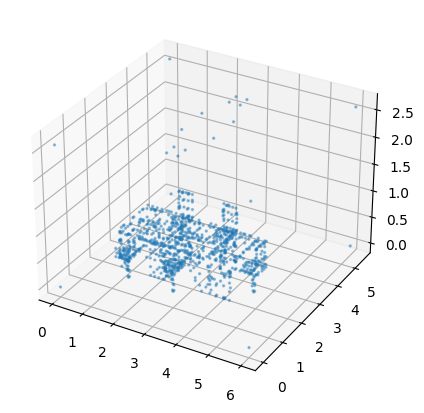

In [16]:
from matplotlib import pyplot as plt

def plot3d_points(point_cloud):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(projection="3d")
    ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], alpha=0.4, s=2)
    # ax.set_axis_off()
    plt.show()
    
plot3d_points(pointCloud_dict['office1']["layout"])

In [17]:
# import numpy as np
# '''
# 点群シャッフルによるデータ増強
# よく考えると無意味だと思う
# '''
# rng = np.random.default_rng()

# pointCloud_augumented_dict = {}
# for office_name, pointCloud in sampledPointCloud_dict.items():
#     pc_list = []
#     for i in range(4):
#         pc = pointCloud.copy()

#         if i >= 1:
#             #点群のシャッフル
#             rng.shuffle(pc)

#         pc_list.append(pc)

#     pointCloud_augumented_dict[office_name] = pc_list

# pointCloud_augumented_dict

In [18]:
# plot3d_points(pointCloud_augumented_dict['office10'][0])
# plot3d_points(pointCloud_augumented_dict['office10'][1])
# plot3d_points(pointCloud_augumented_dict['office10'][2])
# plot3d_points(pointCloud_augumented_dict['office10'][3])

In [19]:
# def get_augumented_dataset():
#     '''
#     点群データ増強に合わせて、メタデータや感染リスク分布のデータも複製して増やす
#     '''
#     case_index_list = list(df_total.index)
#     # case_index_list = list(df_total["casename"])


#     case_index_augumented_list = []

#     pointCloudArray_list = []
#     metaArray_list = []

#     RoI_list = []

#     for case_index in case_index_list:
#         office_name = case_index.split('_', maxsplit=1)[0]
#         pc_list = pointCloud_augumented_dict[office_name]
#         for augumentID, pointCloud in enumerate(pc_list):
#             case_index_augumented_list.append(case_index + '-' + str(augumentID))
#             pointCloudArray_list.append(pointCloud)
#             metaArray_list.append(df_meta_standardized.loc[case_index])
#             # RoI_list.append(df_total["RoI"].loc[case_index])
#             RoI_list.append(df_total["count_timeMean"].loc[case_index])

#     case_index_array = np.array(case_index_augumented_list)
#     metaArray = np.array(metaArray_list)
#     RoIArray = np.array(RoI_list)

#     pointCloudArray = np.array(pointCloudArray_list)
    
#     return case_index_array, pointCloudArray, metaArray, RoIArray

# X_index, X_pc, X_meta, y = get_augumented_dataset()

In [54]:
pointCloud_dict['office1']["layout"]

array([[0.    , 0.    , 0.    ],
       [0.    , 0.    , 2.6   ],
       [0.    , 5.5   , 0.    ],
       ...,
       [1.72  , 3.485 , 0.53  ],
       [4.475 , 2.85  , 0.5375],
       [0.975 , 1.525 , 0.2125]], dtype=float32)

In [55]:
a = np.tile(pointCloud_dict['office1']["layout"], (3,1,1))
a

array([[[0.    , 0.    , 0.    ],
        [0.    , 0.    , 2.6   ],
        [0.    , 5.5   , 0.    ],
        ...,
        [1.72  , 3.485 , 0.53  ],
        [4.475 , 2.85  , 0.5375],
        [0.975 , 1.525 , 0.2125]],

       [[0.    , 0.    , 0.    ],
        [0.    , 0.    , 2.6   ],
        [0.    , 5.5   , 0.    ],
        ...,
        [1.72  , 3.485 , 0.53  ],
        [4.475 , 2.85  , 0.5375],
        [0.975 , 1.525 , 0.2125]],

       [[0.    , 0.    , 0.    ],
        [0.    , 0.    , 2.6   ],
        [0.    , 5.5   , 0.    ],
        ...,
        [1.72  , 3.485 , 0.53  ],
        [4.475 , 2.85  , 0.5375],
        [0.975 , 1.525 , 0.2125]]], dtype=float32)

In [178]:
def get_officeDataset(officename_list:list, df_core:pd.DataFrame, pointCloud_dict:dict, shuffle:bool):
    """
    Return a certain office Dataset.
    You can specify List of offices.
    """
    
    df_main = pd.DataFrame()
    
    for officename in officename_list:
        df = df_core[ df_core["office"]==officename ]
        df_main = pd.concat([df_main, df])
        
    if shuffle:
        df_main = df_main.sample(frac=1, random_state=0)
        
    # meke Dictionary of pointCloudList in order of MainDataFrame
    pc_list_dict = {"aircon":[], "airvent":[], "body":[], "layout":[], }
    for officename in df_main["office"]:
        for key, pc_list in pc_list_dict.items():
            pc_list.append(pointCloud_dict[officename][key])
            
    # make input-Dictionary and to ND-Array
    input_dict = {"meta":df_main[["aircon", "ventilation", "exhaust_a", "exhaust_b", "exhaust_off", ]]}
    for key, pc in pc_list_dict.items():
        input_dict[f"pointCloud_{key}"] = np.array(pc)
                
    return input_dict, df_main["countTimeMean_sit2stand"]
        

In [242]:
X_dict_sample, y_sample = get_officeDataset(["office1", "office2"], df_ml, pointCloud_dict, shuffle=True)

In [243]:
X_dict_sample

{'meta':                         aircon  ventilation  exhaust_a  exhaust_b  exhaust_off
 case_name                                                                     
 office1_960_123_aout  1.278731    -0.200715   1.147695  -0.871311    -0.398249
 office2_660_246_aout  0.446455     1.265523   1.147695  -0.871311    -0.398249
 office1_960_41_aout   1.278731    -1.178206   1.147695  -0.871311    -0.398249
 office1_960_246_aout  1.278731     1.265523   1.147695  -0.871311    -0.398249
 office1_960_205_aout  1.278731     0.776777   1.147695  -0.871311    -0.398249
 ...                        ...          ...        ...        ...          ...
 office2_660_82_bout   0.446455    -0.689460  -0.871311   1.147695    -0.398249
 office1_0_164_aout   -1.384552     0.288031   1.147695  -0.871311    -0.398249
 office2_960_246_bout  1.278731     1.265523  -0.871311   1.147695    -0.398249
 office2_360_164_aout -0.385821     0.288031   1.147695  -0.871311    -0.398249
 office2_0_82_aout    -1.384552 

In [244]:
y_sample

case_name
office1_960_123_aout    1618.426622
office2_660_246_aout    2795.364393
office1_960_41_aout     1062.150416
office1_960_246_aout    1405.492845
office1_960_205_aout    1454.552745
                           ...     
office2_660_82_bout     2061.518802
office1_0_164_aout      2503.411647
office2_960_246_bout    1970.486855
office2_360_164_aout    1508.189684
office2_0_82_aout       4003.190349
Name: countTimeMean_sit2stand, Length: 67, dtype: float64

In [153]:
# def get_dataset(df_main, df_meta):
#     '''
#     説明変数と目的変数をNDArrayに変換する
#     '''
    
#     pc_aircon_list = []
#     pc_airvent_list = []
#     pc_body_list = []
#     pc_layout_list = []
    
#     metaArray_list = []

#     RoI_list = []

#     for index, row in df_total.iterrows():
#         office_name = row["office"]
#         pc_aircon_list.append(pointCloud_dict[office_name]["aircon"])
#         pc_airvent_list.append(pointCloud_dict[office_name]["airvent"])
#         pc_body_list.append(pointCloud_dict[office_name]["body"])
#         pc_layout_list.append(pointCloud_dict[office_name]["layout"])
        
#         metaArray_list.append(df_meta_standardized.loc[index])
            
#         RoI_list.append(df_main["countTimeMean_sit2stand"].loc[index])
#         # RoI_list.append(df_main["count_timeMean"].loc[case_index])

#     officename_array = df_total["office"].to_numpy()
#     metaArray = np.array(metaArray_list)
#     RoIArray = np.array(RoI_list)

#     pc_aircon_array = np.array(pc_aircon_list)
#     pc_airvent_array = np.array(pc_airvent_list)
#     pc_body_array = np.array(pc_body_list)
#     pc_layout_array = np.array(pc_layout_list)
    
#     pc_array_dict = {"aircon":pc_aircon_array, "airvent":pc_airvent_array, "body":pc_body_array, "layout":pc_layout_array}
    
#     return officename_array, pc_array_dict, metaArray, RoIArray.reshape(-1,1)


In [156]:
# X_officename, X_pc_dict, X_meta, y = get_dataset(df_total, df_meta)

# # print(X_pc.max())
# # X_pc /= X_pc.max() #Normalization
# # print(X_pc.max())

# for key, X_pc in X_pc_dict.items():
#     #Standardization
#     X_pc_dict[key] = ( X_pc - X_pc.mean() ) / X_pc.std()
    
    
# # l_mul = map(lambda X_pc: ( X_pc - X_pc.std() ) / X_pc.std(), X_pc_list)
# # # print(list(l_mul))

# # X_pc_airvent.std()

In [157]:
import sys

def standardization_test(X:np.ndarray):
    """
    標準化されているかをテスト
    """
    threshold = 1.e-5
    
    if abs(X.mean()) > threshold:
        sys.stderr.write(f'StandardizationError: mean= {X.mean()}\n')
        
    if abs(X.std() - 1.) > threshold:
        sys.stderr.write(f'StandardizationError: std= {X.std()}')
        

In [158]:
# print(X_officename.shape)


# print("=============pointClouds=============")
# for key, X_pc in X_pc_dict.items():
#     standardization_test(X_pc)
#     print(key)
#     print(X_pc.shape, X_pc.mean(), X_pc.var())
# print("=====================================")
    
# print(X_meta.shape, X_meta.mean(), X_meta.var())

# print(y.shape, y.mean(), y.var())

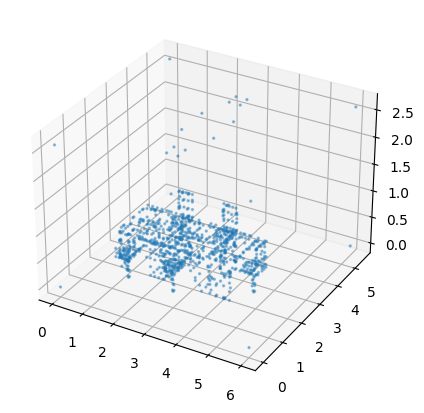

In [159]:
plot3d_points(pc_array_dict["layout"][0, :,:])

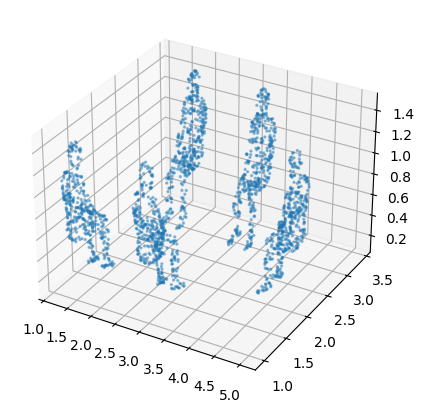

In [160]:
plot3d_points(pc_array_dict["body"][0, :,:])

# チューニング

In [162]:
office_list = list(df_total["office"].unique())

office_list

['office2',
 'office15',
 'office14',
 'office1',
 'office22',
 'office6',
 'office4',
 'office16',
 'office8',
 'office9',
 'office7',
 'office10',
 'office28',
 'office5',
 'office3']

In [163]:
# test_office_list = ["office1", "office7", "office10", "office16", "office22", "office28", ]
test_office_list = ["office1", "office7", "office10", "office16", "office22", "office28", ]

In [164]:
from tensorflow.python.client import device_lib; print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3595781587326386439
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9985785856
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3386973394566133836
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


2022-12-17 01:01:32.356723: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-17 01:01:32.873534: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1553] Created device /device:GPU:0 with 9523 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6


In [165]:
# def conv_bn(x, filters):
#     x = layers.Conv1D(filters, kernel_size=1, padding="valid")(x)
#     x = layers.BatchNormalization(momentum=0.0)(x)
#     return layers.Activation("relu")(x)


In [182]:
from tensorflow import keras
import PointNet

def myPointNet(trial, input_pointCloud:keras.Input, suffix:str):
    
    hp_conv_layers = trial.suggest_int(f'conv_layers_{suffix}', 1, 3, step=1)
    
    x = input_pointCloud
    for i in range(hp_conv_layers):
        hp_filters = trial.suggest_int(f'filters_{suffix}-{i}', 32, 256, step=32)
        
        x = PointNet.conv_bn(x, hp_filters)
        
#         x = keras.layers.Conv1D(hp_filters, kernel_size=1, padding="valid")(x)
#         x = keras.layers.BatchNormalization(momentum=0.99)(x)       
#         x = keras.layers.ReLU()(x)
    
    return keras.layers.GlobalMaxPooling1D()(x)

In [248]:
from PointNet import conv_bn
from tensorflow import keras

db_path = '/mnt/MachineLearning/OptunaLog/separatePointCloud_study_timeMean_sit2stand.db'


def total_model_builder(trial):
    """
    感染リスク分布予測モデル

    順序不変性モデルに、メタデータ（空調条件）を合流させ、MLPで感染リスク予測

    KerasTunerから呼び出され、ハイパーパラメータをチューニングする
    """
    
    input_list = []
    features_list = []
    for key, value in X_dict_sample.items():
        if key == "meta":
            # MetaData
            input_meta = keras.Input(shape=(len(value.columns), ), name='meta')
            
            # append metaData to input_list
            input_list.append(input_meta)

            # append metaData to features_list
            features_list.append(input_meta)
            
        else:
            # PointCloud
            input_pc = keras.Input(shape=(value.shape[1], 3), name=key)

            # append pointClouds to input_list
            input_list.append(input_pc)

            # append feturesOfPointClouds to features_list
            features_list.append(myPointNet(trial, input_pointCloud=input_pc, suffix=key))
        
    
    x = keras.layers.Concatenate()(features_list)
    
    hp_dense_layers = trial.suggest_int('dense_layers', 0, 4, step=1)
    if hp_dense_layers > 0:
        hp_activation = trial.suggest_categorical('activation', ["ReLU", "LeakyReLU", "ELU"])
        hp_dropout = trial.suggest_categorical('dropout', [None, 0.3, 0.5])
    
    for i in range(hp_dense_layers):
        hp_units = trial.suggest_int(f'units-{i}', 64, 512, step=64)
        x = keras.layers.Dense(hp_units)(x)
        
        if hp_activation == "ReLU":
            x = keras.layers.ReLU()(x)
        elif hp_activation == "LeakyReLU":
            x = keras.layers.LeakyReLU()(x)
        elif hp_activation == "ELU":
            x = keras.layers.ELU()(x)
            
        if hp_dropout is not None:
            x = keras.layers.Dropout(hp_dropout)(x)

    outputs = keras.layers.Dense(1)(x)

#     hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 
    hp_learning_rate = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    model = keras.Model(inputs=input_list, outputs=outputs, name="predictionnet")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
#         optimizer=keras.optimizers.RMSprop(learning_rate=hp_learning_rate),
        loss='mse',
        metrics=['mae']
        )

    return model


from tensorflow.keras.callbacks import EarlyStopping
import optuna
from keras.backend import clear_session

# 1. Define an objective function to be maximized.
# def objective(trial, X_dict_train, y_train, X_dict_val, y_val):
def objective(trial, fit_office_list, val_office_list):
    # Clear clutter from previous Keras session graphs.
    clear_session()
    
    mse_max_list = []
    for val_office in val_office_list:
        
        train_office_list = [office for office in fit_office_list if office != val_office]
    
        X_dict_train, y_train = get_officeDataset(train_office_list, df_ml, pointCloud_dict, shuffle=True)
        X_dict_val, y_val = get_officeDataset([val_office], df_ml, pointCloud_dict, shuffle=False)
    
        model = total_model_builder(trial)

        hp_batch_size = trial.suggest_categorical('batch_size', [1, 4, 16, 32, 64, 128, 256])
    #     hp_batch_size = trial.suggest_categorical('batch_size', [1, 4, 16, 64, 128, 256, 512])

        history = model.fit(
            X_dict_train, y_train,
            validation_data = (X_dict_val, y_val),
            epochs = 200,
            batch_size=hp_batch_size,
            callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.0, patience=10)],
            verbose=False,
        )

        #履歴の最後の１０エポック
        val_loss_list = history.history['val_loss'][-10:] #List of MSE
        
        # evaluate = model.evaluate({'pointCloud':X_pc_val, 'meta':X_meta_val}, y_val, verbose=0)

        mse_max = np.max(val_loss_list) #終盤の誤差の最大値（振動抑制が目的）
        mse_max_list.append(mse_max)
        
        print("(train, val): ", ([s.replace('office', '') for s in train_office_list], val_office), mse_max)

    #交差検証の結果の平均値を目的関数
    return np.mean(mse_max_list)#, np.mean(mse_min_list)


In [249]:
"""
最終テスト用オフィスを切り替えながらチューニング実行
"""

for test_office in test_office_list:
    print("test_office:", test_office)
    
    study_name = test_office + '_is_test'

    # 3. Create a study object and optimize the objective function.
    # study = optuna.create_study(direction='minimize')
    study = optuna.create_study(
        # sampler=optuna.samplers.RandomSampler(),
        direction='minimize',
        study_name=study_name,
        storage='sqlite:///'+db_path,
        load_if_exists=True
    )
    
    fit_office_list = [office for office in office_list if office != test_office]
    val_office_list = [val_office for val_office in test_office_list if val_office != test_office]

    study.optimize(
        lambda trial: objective(trial, fit_office_list, val_office_list),
        n_trials=100,
        gc_after_trial=True
    )


[I 2022-12-20 00:40:16,834] Using an existing study with name 'office1_is_test' instead of creating a new one.


test_office: office1
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 357330.46875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 655307.625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 245972.421875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 657083.875


[I 2022-12-20 00:42:10,602] Trial 113 finished with value: 457277.996875 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 96, 'filters_pointCloud_aircon-1': 96, 'filters_pointCloud_aircon-2': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 96, 'filters_pointCloud_airvent-1': 224, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 160, 'filters_pointCloud_body-1': 192, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 64, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 128, 'units-2': 256, 'lr': 0.00010306490734014108, 'batch_size': 256}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 370695.59375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 4040668.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2583972.75
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 3316748.5
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2402468.0


[I 2022-12-20 00:44:55,180] Trial 114 finished with value: 3305371.9 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 96, 'filters_pointCloud_aircon-1': 96, 'filters_pointCloud_aircon-2': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 96, 'filters_pointCloud_airvent-1': 224, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 160, 'filters_pointCloud_body-1': 192, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 64, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 128, 'units-2': 256, 'lr': 1.0054701190051567e-05, 'batch_size': 256}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 4183001.75
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 341114.78125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 646266.6875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 242200.875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 619241.4375


[I 2022-12-20 00:47:05,207] Trial 115 finished with value: 437808.1625 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 96, 'filters_pointCloud_aircon-1': 96, 'filters_pointCloud_aircon-2': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 256, 'filters_pointCloud_body-1': 256, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 64, 'units-2': 256, 'lr': 9.728903672194579e-05, 'batch_size': 256}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 340217.03125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 332861.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 634708.0
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 245228.953125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 619344.6875


[I 2022-12-20 00:48:50,809] Trial 116 finished with value: 437162.409375 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 96, 'filters_pointCloud_aircon-1': 96, 'filters_pointCloud_aircon-2': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 256, 'filters_pointCloud_body-1': 256, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 64, 'units-2': 256, 'lr': 0.0001063194513742335, 'batch_size': 256}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 353668.90625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 330855.34375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 616179.6875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 245723.25
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 615377.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 305303.5


[I 2022-12-20 00:50:33,387] Trial 117 finished with value: 422687.84375 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 96, 'filters_pointCloud_aircon-1': 96, 'filters_pointCloud_aircon-2': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 256, 'filters_pointCloud_body-1': 256, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 320, 'lr': 0.0001189065987672754, 'batch_size': 256}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 340880.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 650190.875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 244013.21875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 591790.625


[I 2022-12-20 00:52:29,085] Trial 118 finished with value: 426734.33125 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 96, 'filters_pointCloud_aircon-1': 96, 'filters_pointCloud_aircon-2': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 256, 'filters_pointCloud_body-1': 256, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 320, 'lr': 0.00010228619471512993, 'batch_size': 256}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 306796.6875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 350336.09375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 645772.875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 240175.75
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 610655.4375


[I 2022-12-20 00:54:14,753] Trial 119 finished with value: 425006.95625 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 96, 'filters_pointCloud_aircon-1': 96, 'filters_pointCloud_aircon-2': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 256, 'filters_pointCloud_body-1': 256, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 320, 'lr': 0.00010748387156479949, 'batch_size': 256}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 278094.625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 351569.53125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 628768.0
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 240303.953125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 641515.1875


[I 2022-12-20 00:56:13,529] Trial 120 finished with value: 441564.465625 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 96, 'filters_pointCloud_aircon-1': 96, 'filters_pointCloud_aircon-2': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 256, 'filters_pointCloud_body-1': 256, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 320, 'lr': 0.00010638747883955261, 'batch_size': 256}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 345665.65625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 350440.75
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 611045.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 242691.96875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 571440.8125


[I 2022-12-20 00:58:08,135] Trial 121 finished with value: 421271.0375 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 96, 'filters_pointCloud_aircon-1': 96, 'filters_pointCloud_aircon-2': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 256, 'filters_pointCloud_body-1': 256, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 320, 'lr': 0.00010237755290762924, 'batch_size': 256}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 330736.21875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 354841.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 639549.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 241672.359375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 579042.375


[I 2022-12-20 00:59:50,845] Trial 122 finished with value: 439694.015625 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 96, 'filters_pointCloud_aircon-1': 96, 'filters_pointCloud_aircon-2': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 256, 'filters_pointCloud_body-1': 256, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 320, 'lr': 0.00011189064101856553, 'batch_size': 256}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 383364.65625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 333484.21875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 647035.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 248528.96875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 604234.0


[I 2022-12-20 01:01:44,513] Trial 123 finished with value: 430536.6875 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 96, 'filters_pointCloud_aircon-1': 96, 'filters_pointCloud_aircon-2': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 256, 'filters_pointCloud_body-1': 256, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 320, 'lr': 0.0001057300122253641, 'batch_size': 256}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 319400.6875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 337573.84375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 619758.6875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 238377.125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 595285.3125


[I 2022-12-20 01:03:38,155] Trial 124 finished with value: 426017.2125 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 96, 'filters_pointCloud_aircon-1': 96, 'filters_pointCloud_aircon-2': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 256, 'filters_pointCloud_body-1': 256, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 320, 'lr': 0.00010986662539208585, 'batch_size': 256}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 339091.09375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 358509.15625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 614980.8125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 234873.28125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 613104.6875


[I 2022-12-20 01:05:32,573] Trial 125 finished with value: 427959.3875 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 96, 'filters_pointCloud_aircon-1': 96, 'filters_pointCloud_aircon-2': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 256, 'filters_pointCloud_body-1': 256, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 320, 'lr': 0.00010163892945225478, 'batch_size': 256}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 318329.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 329182.8125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 729984.6875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 245174.0
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 680812.9375


[I 2022-12-20 01:06:52,140] Trial 126 finished with value: 475672.9 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 96, 'filters_pointCloud_aircon-1': 96, 'filters_pointCloud_aircon-2': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 256, 'filters_pointCloud_body-1': 256, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 320, 'lr': 0.00018335371918660752, 'batch_size': 256}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 393210.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 343280.71875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 620715.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 237174.03125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 550777.4375


[I 2022-12-20 01:09:14,108] Trial 127 finished with value: 422527.025 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 96, 'filters_pointCloud_aircon-1': 96, 'filters_pointCloud_aircon-2': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 256, 'filters_pointCloud_body-1': 256, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 320, 'lr': 9.001504450701131e-05, 'batch_size': 256}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 360687.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 343529.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 588512.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 243971.140625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 556570.6875


[I 2022-12-20 01:11:45,402] Trial 128 finished with value: 406394.396875 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 96, 'filters_pointCloud_aircon-1': 96, 'filters_pointCloud_aircon-2': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 256, 'filters_pointCloud_body-1': 256, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 320, 'lr': 7.926236956364198e-05, 'batch_size': 256}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 299388.53125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 335476.46875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 593829.8125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 244218.53125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 563678.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 345145.15625


[I 2022-12-20 01:14:14,950] Trial 129 finished with value: 416469.60625 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 96, 'filters_pointCloud_aircon-1': 96, 'filters_pointCloud_aircon-2': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 256, 'filters_pointCloud_body-1': 256, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 384, 'lr': 7.861399127744931e-05, 'batch_size': 256}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 337600.78125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 597463.8125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 237893.46875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 562439.5625


[I 2022-12-20 01:16:26,621] Trial 130 finished with value: 414113.8375 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 96, 'filters_pointCloud_aircon-1': 96, 'filters_pointCloud_aircon-2': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 256, 'filters_pointCloud_body-1': 256, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 384, 'lr': 7.512651218486002e-05, 'batch_size': 256}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 335171.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 345394.65625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 588424.6875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 242653.96875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 563728.8125


[I 2022-12-20 01:18:37,189] Trial 131 finished with value: 423647.03125 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 96, 'filters_pointCloud_aircon-1': 96, 'filters_pointCloud_aircon-2': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 256, 'filters_pointCloud_body-1': 256, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 384, 'lr': 7.877998599450444e-05, 'batch_size': 256}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 378033.03125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 400919.8125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 554248.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 249807.140625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 500665.15625


[I 2022-12-20 01:22:05,440] Trial 132 finished with value: 422214.859375 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 96, 'filters_pointCloud_aircon-1': 96, 'filters_pointCloud_aircon-2': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 256, 'filters_pointCloud_body-1': 256, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 384, 'lr': 4.3635248149549376e-05, 'batch_size': 256}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 405434.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 357339.78125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 604987.875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 237116.921875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 560546.1875


[I 2022-12-20 01:24:27,001] Trial 133 finished with value: 418858.140625 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 96, 'filters_pointCloud_aircon-1': 96, 'filters_pointCloud_aircon-2': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 256, 'filters_pointCloud_body-1': 256, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 384, 'lr': 7.754005503151284e-05, 'batch_size': 256}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 334299.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 382293.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 543320.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 375481.28125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 500375.09375


[I 2022-12-20 01:27:44,960] Trial 134 finished with value: 440668.4625 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 96, 'filters_pointCloud_aircon-1': 96, 'filters_pointCloud_aircon-2': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 256, 'filters_pointCloud_body-1': 256, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 384, 'lr': 4.11685915067141e-05, 'batch_size': 256}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 401872.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 330018.15625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 574391.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 239951.109375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 563098.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 384704.9375


[I 2022-12-20 01:30:12,292] Trial 135 finished with value: 418432.740625 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 96, 'filters_pointCloud_aircon-1': 128, 'filters_pointCloud_aircon-2': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 256, 'filters_pointCloud_body-1': 256, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 384, 'lr': 7.888955014312937e-05, 'batch_size': 256}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 347279.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 660302.0
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 303805.0
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 728576.375


[I 2022-12-20 01:32:19,148] Trial 136 finished with value: 451057.946875 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 256, 'filters_pointCloud_body-2': 32, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 224, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 384, 'lr': 8.004862657347689e-05, 'batch_size': 256}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 215327.046875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 473899.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 549961.875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 241311.734375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 530674.0


[I 2022-12-20 01:34:34,722] Trial 137 finished with value: 408100.00625 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 128, 'filters_pointCloud_aircon-1': 128, 'filters_pointCloud_aircon-2': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 128, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 384, 'lr': 4.880603258706187e-05, 'batch_size': 256}. Best is trial 85 with value: 391548.253125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 244652.859375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 349533.59375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 561703.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 240734.578125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 516505.15625


[I 2022-12-20 01:36:42,357] Trial 138 finished with value: 376888.33125 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 128, 'filters_pointCloud_aircon-1': 128, 'filters_pointCloud_aircon-2': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 224, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 128, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 384, 'lr': 5.212855379432554e-05, 'batch_size': 256}. Best is trial 138 with value: 376888.33125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 215964.390625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 356596.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 549775.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 250589.03125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 506863.84375


[I 2022-12-20 01:38:53,408] Trial 139 finished with value: 383949.275 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 160, 'filters_pointCloud_aircon-1': 128, 'filters_pointCloud_aircon-2': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 128, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 384, 'lr': 5.294961640921385e-05, 'batch_size': 256}. Best is trial 138 with value: 376888.33125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 255922.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 400350.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 559536.8125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 236279.515625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 511503.9375


[I 2022-12-20 01:41:30,502] Trial 140 finished with value: 387130.396875 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 160, 'filters_pointCloud_aircon-1': 128, 'filters_pointCloud_aircon-2': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 160, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 384, 'lr': 4.8724338319280166e-05, 'batch_size': 256}. Best is trial 138 with value: 376888.33125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 227981.46875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 353835.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 560207.5
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 253309.375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 516586.84375


[I 2022-12-20 01:43:30,578] Trial 141 finished with value: 375968.35625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 160, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 384, 'lr': 5.092686028330356e-05, 'batch_size': 256}. Best is trial 141 with value: 375968.35625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 195903.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 329157.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 553916.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 238483.34375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 514965.21875


[I 2022-12-20 01:45:43,754] Trial 142 finished with value: 388877.49375 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 160, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 160, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 384, 'lr': 4.994731600685986e-05, 'batch_size': 256}. Best is trial 141 with value: 375968.35625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 307865.46875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 385216.15625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 560148.875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 237985.859375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 504795.1875


[I 2022-12-20 01:48:14,738] Trial 143 finished with value: 392180.996875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 160, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 384, 'lr': 4.490909313820379e-05, 'batch_size': 256}. Best is trial 141 with value: 375968.35625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 272758.90625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2363979.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1204620.875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1051807.625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 884426.4375


[I 2022-12-20 01:50:23,973] Trial 144 finished with value: 1426298.4875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 160, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 384, 'lr': 3.3185885918724605e-05, 'batch_size': 256}. Best is trial 141 with value: 375968.35625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1626658.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 373999.03125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 577095.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 258391.78125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 530329.625


[I 2022-12-20 01:52:22,065] Trial 145 finished with value: 387579.896875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 160, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 384, 'lr': 5.0983268366270825e-05, 'batch_size': 256}. Best is trial 141 with value: 375968.35625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 198083.859375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 354442.40625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 582833.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 247238.28125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 554857.4375


[I 2022-12-20 01:54:18,083] Trial 146 finished with value: 389922.971875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 64, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 384, 'lr': 5.62040081135693e-05, 'batch_size': 256}. Best is trial 141 with value: 375968.35625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 210243.671875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 507458.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 553989.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 281235.0625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 518278.3125


[I 2022-12-20 01:56:25,885] Trial 147 finished with value: 443658.06875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 384, 'lr': 4.7802765211422656e-05, 'batch_size': 256}. Best is trial 141 with value: 375968.35625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 357329.28125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 364477.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 616148.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 245127.78125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 604820.875


[I 2022-12-20 01:58:23,086] Trial 148 finished with value: 409612.365625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 64, 'filters_pointCloud_layout-2': 64, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 384, 'lr': 5.5428890910587794e-05, 'batch_size': 256}. Best is trial 141 with value: 375968.35625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 217486.796875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 341322.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 610816.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 263025.40625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 554034.5


[I 2022-12-20 02:00:21,954] Trial 149 finished with value: 393103.778125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 64, 'filters_pointCloud_layout-2': 64, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 384, 'lr': 5.468791274693962e-05, 'batch_size': 256}. Best is trial 141 with value: 375968.35625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 196319.859375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 357012.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 560364.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 245135.21875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 567262.875


[I 2022-12-20 02:02:21,672] Trial 150 finished with value: 390077.934375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 64, 'filters_pointCloud_layout-2': 64, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 384, 'lr': 5.5607841579513764e-05, 'batch_size': 256}. Best is trial 141 with value: 375968.35625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 220615.265625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 375218.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 581064.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 258477.578125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 595178.1875


[I 2022-12-20 02:04:27,739] Trial 151 finished with value: 404354.028125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 64, 'filters_pointCloud_layout-2': 64, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 384, 'lr': 5.391086448775074e-05, 'batch_size': 256}. Best is trial 141 with value: 375968.35625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 211831.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 334150.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 579906.5
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 243509.671875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 556748.0


[I 2022-12-20 02:06:33,550] Trial 152 finished with value: 389058.725 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 32, 'filters_pointCloud_airvent-1': 32, 'filters_pointCloud_airvent-2': 192, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 64, 'filters_pointCloud_layout-2': 64, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 384, 'lr': 5.46595293135688e-05, 'batch_size': 256}. Best is trial 141 with value: 375968.35625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 230979.390625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 736295.125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 567616.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 491495.78125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 487014.4375


[I 2022-12-20 02:08:57,292] Trial 153 finished with value: 562225.36875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 32, 'filters_pointCloud_airvent-1': 32, 'filters_pointCloud_airvent-2': 192, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 192, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 64, 'filters_pointCloud_layout-2': 64, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 448, 'lr': 3.579966937324053e-05, 'batch_size': 256}. Best is trial 141 with value: 375968.35625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 528705.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 342669.96875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 565520.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 256517.421875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 541574.3125


[I 2022-12-20 02:10:59,161] Trial 154 finished with value: 383164.8 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 32, 'filters_pointCloud_airvent-1': 32, 'filters_pointCloud_airvent-2': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 64, 'filters_pointCloud_layout-2': 64, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 384, 'lr': 5.501696469924743e-05, 'batch_size': 256}. Best is trial 141 with value: 375968.35625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 209542.109375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 338839.21875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 549356.8125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 247005.71875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 510332.59375


[I 2022-12-20 02:13:12,123] Trial 155 finished with value: 387493.58125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 256, 'filters_pointCloud_airvent-1': 32, 'filters_pointCloud_airvent-2': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 192, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 64, 'filters_pointCloud_layout-2': 64, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 448, 'lr': 5.578963869091529e-05, 'batch_size': 256}. Best is trial 141 with value: 375968.35625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 291933.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 342174.71875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 562421.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 248676.15625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 587517.5625


[I 2022-12-20 02:15:00,097] Trial 156 finished with value: 396171.596875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 256, 'filters_pointCloud_airvent-1': 32, 'filters_pointCloud_airvent-2': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 192, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 64, 'filters_pointCloud_layout-2': 64, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 128, 'units-2': 448, 'lr': 5.765149131573683e-05, 'batch_size': 256}. Best is trial 141 with value: 375968.35625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 240068.109375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 3160826.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1833032.375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2625213.5
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1739290.375


[I 2022-12-20 02:17:20,524] Trial 157 finished with value: 2510252.0 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 256, 'filters_pointCloud_airvent-1': 32, 'filters_pointCloud_airvent-2': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 192, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 64, 'filters_pointCloud_layout-2': 64, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 128, 'units-2': 448, 'lr': 2.2112652690029978e-05, 'batch_size': 256}. Best is trial 141 with value: 375968.35625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 3192897.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 345101.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 550056.6875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 240438.859375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 547795.3125


[I 2022-12-20 02:19:28,308] Trial 158 finished with value: 385573.725 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 256, 'filters_pointCloud_airvent-1': 32, 'filters_pointCloud_airvent-2': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 64, 'filters_pointCloud_layout-2': 64, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 448, 'lr': 5.9764575247022934e-05, 'batch_size': 256}. Best is trial 141 with value: 375968.35625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 244476.578125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 820584.875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 815494.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 874604.875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 745628.0625


[I 2022-12-20 02:21:51,043] Trial 159 finished with value: 932977.8 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 224, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 256, 'filters_pointCloud_airvent-1': 32, 'filters_pointCloud_airvent-2': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 192, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 64, 'filters_pointCloud_layout-2': 64, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 448, 'lr': 3.873285662789607e-05, 'batch_size': 256}. Best is trial 141 with value: 375968.35625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1408576.625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 342822.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 601257.875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 239804.328125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 560409.5625


[I 2022-12-20 02:23:43,536] Trial 160 finished with value: 396162.61875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 224, 'filters_pointCloud_airvent-1': 32, 'filters_pointCloud_airvent-2': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 64, 'filters_pointCloud_layout-2': 64, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 128, 'units-2': 448, 'lr': 6.024640753378491e-05, 'batch_size': 256}. Best is trial 141 with value: 375968.35625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 236519.015625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2039908.625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1111152.875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1560600.125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 938969.9375


[I 2022-12-20 02:26:08,905] Trial 161 finished with value: 1711905.0625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 224, 'filters_pointCloud_airvent-1': 96, 'filters_pointCloud_airvent-2': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 64, 'filters_pointCloud_layout-2': 64, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 448, 'lr': 3.164383181466696e-05, 'batch_size': 256}. Best is trial 141 with value: 375968.35625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2908893.75
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2486034.75
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1420339.375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2484127.75
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1201632.875


[I 2022-12-20 02:28:48,439] Trial 162 finished with value: 2037585.1 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 64, 'filters_pointCloud_airvent-2': 96, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 224, 'filters_pointCloud_layout-1': 96, 'filters_pointCloud_layout-2': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 448, 'lr': 2.7028313693389877e-05, 'batch_size': 256}. Best is trial 141 with value: 375968.35625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2595790.75
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 329056.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 553365.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 246220.59375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 493609.34375


[I 2022-12-20 02:30:56,390] Trial 163 finished with value: 381676.43125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 128, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 32, 'filters_pointCloud_airvent-1': 96, 'filters_pointCloud_airvent-2': 192, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 96, 'filters_pointCloud_layout-2': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'lr': 6.37489797282597e-05, 'batch_size': 256}. Best is trial 141 with value: 375968.35625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 286130.21875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 395608.15625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 581769.875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 239424.625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 587261.5


[I 2022-12-20 02:33:30,467] Trial 164 finished with value: 409828.8875 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 128, 'filters_pointCloud_aircon-1': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 96, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 128, 'filters_pointCloud_layout-2': 224, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'lr': 4.4730561127490075e-05, 'batch_size': 256}. Best is trial 141 with value: 375968.35625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 245080.28125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2047502.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1099656.375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1637391.25
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1127580.75


[I 2022-12-20 02:35:57,769] Trial 165 finished with value: 1574146.75 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 128, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 32, 'filters_pointCloud_airvent-1': 96, 'filters_pointCloud_airvent-2': 224, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 96, 'filters_pointCloud_layout-2': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'lr': 3.766919295255112e-05, 'batch_size': 256}. Best is trial 141 with value: 375968.35625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1958603.125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 333246.78125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 570064.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 255873.375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 563643.0625


[I 2022-12-20 02:37:20,821] Trial 166 finished with value: 388449.6625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 384, 'lr': 6.6351876405034e-05, 'batch_size': 256}. Best is trial 141 with value: 375968.35625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 219420.90625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 340034.8125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 556728.5
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 241854.25
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 520291.84375


[I 2022-12-20 02:38:51,339] Trial 167 finished with value: 377249.221875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 384, 'lr': 6.449173751778597e-05, 'batch_size': 256}. Best is trial 141 with value: 375968.35625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 227336.703125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 338699.90625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 568288.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 257551.828125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 542077.8125


[I 2022-12-20 02:40:14,221] Trial 168 finished with value: 388679.403125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 384, 'lr': 6.374989327944004e-05, 'batch_size': 256}. Best is trial 141 with value: 375968.35625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 236779.28125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 345157.96875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 582037.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 246151.25
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 538281.875


[I 2022-12-20 02:41:33,908] Trial 169 finished with value: 382531.425 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 384, 'lr': 6.839782446572524e-05, 'batch_size': 256}. Best is trial 141 with value: 375968.35625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 201028.96875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 327845.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 566018.125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 249350.109375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 561618.875


[I 2022-12-20 02:42:56,866] Trial 170 finished with value: 380861.88125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 384, 'lr': 6.593798624910325e-05, 'batch_size': 256}. Best is trial 141 with value: 375968.35625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 199476.859375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 327102.34375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 551670.375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 240696.78125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 542445.6875


[I 2022-12-20 02:44:19,216] Trial 171 finished with value: 374311.540625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 384, 'lr': 6.678250804186177e-05, 'batch_size': 256}. Best is trial 171 with value: 374311.540625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 209642.515625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 338105.84375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 561542.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 247616.234375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 524411.5625


[I 2022-12-20 02:45:48,510] Trial 172 finished with value: 380040.19375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 384, 'lr': 6.321876926649555e-05, 'batch_size': 256}. Best is trial 171 with value: 374311.540625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 228524.890625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 335766.84375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 554035.875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 245855.09375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 534446.375


[I 2022-12-20 02:47:20,794] Trial 173 finished with value: 380871.403125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'lr': 6.63510070783221e-05, 'batch_size': 256}. Best is trial 171 with value: 374311.540625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 234252.828125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 358718.09375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 554061.875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 254781.71875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 492840.75


[I 2022-12-20 02:48:53,546] Trial 174 finished with value: 383709.240625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'lr': 6.452351672190554e-05, 'batch_size': 256}. Best is trial 171 with value: 374311.540625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 258143.765625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 325664.65625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 558259.8125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 238474.109375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 534512.125


[I 2022-12-20 02:50:23,479] Trial 175 finished with value: 383635.971875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 224, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'lr': 6.998981061643534e-05, 'batch_size': 256}. Best is trial 171 with value: 374311.540625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 261269.15625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 3425006.75
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2022813.75
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2748673.75
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1995693.75


[I 2022-12-20 02:52:08,230] Trial 176 finished with value: 2720812.9 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 224, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'lr': 3.073826056354159e-05, 'batch_size': 256}. Best is trial 171 with value: 374311.540625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 3411876.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2886472.75
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1277340.0
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1813923.25
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1326997.375


[I 2022-12-20 02:53:43,390] Trial 177 finished with value: 1914883.175 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'lr': 3.886846466682944e-05, 'batch_size': 256}. Best is trial 171 with value: 374311.540625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2269682.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 331939.53125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 548111.75
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 252151.421875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 519779.65625


[I 2022-12-20 02:55:11,616] Trial 178 finished with value: 378820.496875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'lr': 6.995205959725891e-05, 'batch_size': 256}. Best is trial 171 with value: 374311.540625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 242120.125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 378312.8125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 551399.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 237477.640625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 508254.5


[I 2022-12-20 02:56:36,308] Trial 179 finished with value: 391624.721875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'lr': 6.857776123974739e-05, 'batch_size': 256}. Best is trial 171 with value: 374311.540625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 282679.46875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 334006.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 553711.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 244573.859375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 525866.8125


[I 2022-12-20 02:58:08,018] Trial 180 finished with value: 382272.55 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'lr': 6.635128501966052e-05, 'batch_size': 256}. Best is trial 171 with value: 374311.540625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 253205.015625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 341306.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 543168.75
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 259335.015625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 537791.875


[I 2022-12-20 02:59:40,110] Trial 181 finished with value: 394988.334375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'lr': 6.896310272866466e-05, 'batch_size': 256}. Best is trial 171 with value: 374311.540625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 293339.46875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 333832.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 564801.8125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 266191.78125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 518336.5625


[I 2022-12-20 03:00:55,628] Trial 182 finished with value: 397498.775 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 224, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'lr': 9.038489880994759e-05, 'batch_size': 256}. Best is trial 171 with value: 374311.540625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 304331.15625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 342366.96875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 550090.375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 250252.390625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 529104.8125


[I 2022-12-20 03:02:25,304] Trial 183 finished with value: 389175.590625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 192, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'lr': 6.595072410461982e-05, 'batch_size': 256}. Best is trial 171 with value: 374311.540625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 274063.40625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 334785.96875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 567238.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 240039.078125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 554861.6875


[I 2022-12-20 03:03:52,847] Trial 184 finished with value: 390432.609375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 224, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'lr': 8.5991797874044e-05, 'batch_size': 256}. Best is trial 171 with value: 374311.540625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 255238.125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 368567.15625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 722326.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 286880.65625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 832131.5625


[I 2022-12-20 03:04:48,956] Trial 185 finished with value: 485937.9375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 256, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 512, 'lr': 0.00012892576244972201, 'batch_size': 256}. Best is trial 171 with value: 374311.540625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 219784.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2173453.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1056458.75
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1713839.75
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1005598.6875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1477992.125


[I 2022-12-20 03:06:28,067] Trial 186 finished with value: 1485468.5125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 192, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'lr': 4.348178009958283e-05, 'batch_size': 256}. Best is trial 171 with value: 374311.540625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 359535.46875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 543858.375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 253985.25
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 522001.5625


[I 2022-12-20 03:08:04,641] Trial 187 finished with value: 388065.803125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 448, 'lr': 6.169068442729288e-05, 'batch_size': 256}. Best is trial 171 with value: 374311.540625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 260948.359375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1539593.625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 832208.5
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1044617.4375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 689461.6875


[I 2022-12-20 03:09:39,909] Trial 188 finished with value: 1216789.675 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 224, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'lr': 4.737938345071187e-05, 'batch_size': 256}. Best is trial 171 with value: 374311.540625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1978067.125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 330911.03125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 549391.125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 244060.640625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 498262.4375


[I 2022-12-20 03:11:02,793] Trial 189 finished with value: 378631.278125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 192, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'lr': 6.977753622964012e-05, 'batch_size': 256}. Best is trial 171 with value: 374311.540625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 270531.15625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 342302.65625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 552050.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 241236.453125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 510625.78125


[I 2022-12-20 03:12:24,144] Trial 190 finished with value: 378746.91875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 192, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'lr': 6.915177611222381e-05, 'batch_size': 256}. Best is trial 171 with value: 374311.540625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 247519.140625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 328787.75
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 575222.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 254361.984375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 536177.75


[I 2022-12-20 03:13:35,261] Trial 191 finished with value: 387813.49375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 192, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'lr': 8.721848438003676e-05, 'batch_size': 256}. Best is trial 171 with value: 374311.540625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 244517.671875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 338594.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 541647.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 246455.40625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 522667.5


[I 2022-12-20 03:15:00,038] Trial 192 finished with value: 384024.89375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 192, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'lr': 6.824016234283897e-05, 'batch_size': 256}. Best is trial 171 with value: 374311.540625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 270760.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 341429.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 554675.875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 250433.875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 541875.4375


[I 2022-12-20 03:16:21,631] Trial 193 finished with value: 395028.51875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 192, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'lr': 7.137783726178771e-05, 'batch_size': 256}. Best is trial 171 with value: 374311.540625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 286728.15625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 332534.03125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 541564.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 252057.671875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 505628.0


[I 2022-12-20 03:17:45,175] Trial 194 finished with value: 380560.509375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 192, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'lr': 6.916668642197636e-05, 'batch_size': 256}. Best is trial 171 with value: 374311.540625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 271018.28125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 344277.8125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 551881.875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 280878.25
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 520195.46875


[I 2022-12-20 03:19:35,484] Trial 195 finished with value: 386362.8875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 224, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 192, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 32, 'filters_pointCloud_body-2': 256, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'lr': 8.297175533343785e-05, 'batch_size': 256}. Best is trial 171 with value: 374311.540625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 234581.03125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 328769.6875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 552907.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 244799.203125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 506031.84375


[I 2022-12-20 03:21:00,252] Trial 196 finished with value: 381068.490625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 192, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'lr': 6.889271547231363e-05, 'batch_size': 256}. Best is trial 171 with value: 374311.540625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 272833.78125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2515596.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1589644.625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1855488.75
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1663875.0


[I 2022-12-20 03:22:24,620] Trial 197 finished with value: 1990904.925 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 224, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'lr': 3.8557674284940414e-05, 'batch_size': 256}. Best is trial 171 with value: 374311.540625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2329920.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 333779.65625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 549530.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 249232.546875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 527255.125


[I 2022-12-20 03:23:45,371] Trial 198 finished with value: 383866.753125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 192, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'lr': 7.111806497259132e-05, 'batch_size': 256}. Best is trial 171 with value: 374311.540625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 259535.875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 334933.78125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 552772.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 244467.546875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 551160.1875


[I 2022-12-20 03:25:04,480] Trial 199 finished with value: 380474.81875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'lr': 8.946708089673979e-05, 'batch_size': 256}. Best is trial 171 with value: 374311.540625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 219039.640625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 330327.65625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 573853.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 243265.15625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 554629.0625


[I 2022-12-20 03:26:24,074] Trial 200 finished with value: 383887.990625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'lr': 8.262274614683026e-05, 'batch_size': 256}. Best is trial 171 with value: 374311.540625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 217364.140625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 351392.78125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 555642.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 254990.171875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 520360.40625


[I 2022-12-20 03:27:46,616] Trial 201 finished with value: 393916.428125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 192, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'lr': 7.246462076567842e-05, 'batch_size': 256}. Best is trial 171 with value: 374311.540625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 287196.46875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 330522.15625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 561736.25
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 266981.90625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 540057.4375


[I 2022-12-20 03:29:04,184] Trial 202 finished with value: 390682.709375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'lr': 9.257163185788723e-05, 'batch_size': 256}. Best is trial 171 with value: 374311.540625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 254115.796875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 339840.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 612741.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 250097.609375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 587473.125


[I 2022-12-20 03:30:08,044] Trial 203 finished with value: 427745.946875 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 192, 'filters_pointCloud_aircon-1': 32, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'lr': 0.00013954846406857434, 'batch_size': 256}. Best is trial 171 with value: 374311.540625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 348577.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 354869.34375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 555867.125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 243685.59375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 532005.3125


[I 2022-12-20 03:31:32,702] Trial 204 finished with value: 386466.065625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'lr': 6.862891304100414e-05, 'batch_size': 256}. Best is trial 171 with value: 374311.540625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 245902.953125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 331389.46875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 554044.625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 250788.765625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 556935.4375


[I 2022-12-20 03:32:47,329] Trial 205 finished with value: 386530.625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 192, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'lr': 8.96169022537765e-05, 'batch_size': 256}. Best is trial 171 with value: 374311.540625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 239494.828125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 341040.84375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 572655.25
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 243298.109375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 571102.875


[I 2022-12-20 03:33:58,446] Trial 206 finished with value: 412429.628125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 160, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'lr': 0.00012242125379263797, 'batch_size': 256}. Best is trial 171 with value: 374311.540625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 334051.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 346584.65625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 540620.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 243189.578125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 497340.59375


[I 2022-12-20 03:35:43,822] Trial 207 finished with value: 378360.696875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 224, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 128, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'lr': 6.324780520629856e-05, 'batch_size': 256}. Best is trial 171 with value: 374311.540625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 264068.46875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 337346.90625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 550984.6875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 247181.53125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 560631.4375


[I 2022-12-20 03:37:23,540] Trial 208 finished with value: 393097.125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 224, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 128, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'lr': 7.032717414900004e-05, 'batch_size': 256}. Best is trial 171 with value: 374311.540625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 269341.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 363314.34375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 546147.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 248636.046875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 493022.78125


[I 2022-12-20 03:39:13,075] Trial 209 finished with value: 387898.059375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 128, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'lr': 6.105657102886614e-05, 'batch_size': 256}. Best is trial 171 with value: 374311.540625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 288369.8125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2288157.75
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1187632.25
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1320601.375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 769291.3125


[I 2022-12-20 03:40:38,692] Trial 210 finished with value: 1431728.0125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 192, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 32, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'lr': 4.540580287870729e-05, 'batch_size': 256}. Best is trial 171 with value: 374311.540625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1592957.375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 353817.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 604570.375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 258285.0
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 610344.375


[I 2022-12-20 03:41:53,693] Trial 211 finished with value: 407289.146875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 192, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'lr': 7.922238902264703e-05, 'batch_size': 256}. Best is trial 171 with value: 374311.540625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 209428.546875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 374499.75
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 566432.875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 255034.09375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 499597.46875


[I 2022-12-20 03:43:30,419] Trial 212 finished with value: 386494.74375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 224, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 384, 'lr': 5.707089965523393e-05, 'batch_size': 256}. Best is trial 171 with value: 374311.540625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 236909.53125


[I 2022-12-20 03:43:31,469] Using an existing study with name 'office7_is_test' instead of creating a new one.


test_office: office7
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 740256.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 653361.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 280848.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 691804.125


[I 2022-12-20 03:44:56,242] Trial 100 finished with value: 517141.796875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 160, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 128, 'filters_pointCloud_layout-2': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 320, 'lr': 2.170691395172354e-05, 'batch_size': 64}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 219438.859375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 726498.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 630262.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 304875.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 657424.4375


[I 2022-12-20 03:46:20,805] Trial 101 finished with value: 511522.765625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 160, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 128, 'filters_pointCloud_layout-2': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 320, 'lr': 2.141097874852242e-05, 'batch_size': 64}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 238553.515625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 726123.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 625619.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 328298.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 622739.125


[I 2022-12-20 03:47:46,189] Trial 102 finished with value: 508140.90625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 160, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 128, 'filters_pointCloud_layout-2': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 320, 'lr': 2.151080883018936e-05, 'batch_size': 64}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 237923.78125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 730497.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 625989.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 257015.953125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 659360.125


[I 2022-12-20 03:49:16,381] Trial 103 finished with value: 504228.15625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 160, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 128, 'filters_pointCloud_layout-2': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 320, 'lr': 1.966635508701138e-05, 'batch_size': 64}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 248278.203125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 730359.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 647265.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 285164.09375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 687341.5625


[I 2022-12-20 03:50:49,532] Trial 104 finished with value: 518627.596875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 160, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 128, 'filters_pointCloud_layout-2': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 320, 'lr': 1.978219918566006e-05, 'batch_size': 64}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 243007.578125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 743663.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 625704.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 271083.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 657980.125


[I 2022-12-20 03:52:23,917] Trial 105 finished with value: 514170.61875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 160, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 128, 'filters_pointCloud_layout-2': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 320, 'lr': 1.8644238132700285e-05, 'batch_size': 64}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 272421.21875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 735015.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 624929.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 272144.84375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 610366.6875


[I 2022-12-20 03:54:18,334] Trial 106 finished with value: 489684.296875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 160, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 128, 'filters_pointCloud_layout-2': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 320, 'lr': 1.5420402128756365e-05, 'batch_size': 64}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 205964.640625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 804749.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 608794.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 278200.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 553309.375


[I 2022-12-20 03:56:13,328] Trial 107 finished with value: 490757.55625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 160, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 128, 'filters_pointCloud_layout-2': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 320, 'lr': 1.552138751588704e-05, 'batch_size': 64}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 208733.78125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 745503.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 576050.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 254128.140625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 590369.3125


[I 2022-12-20 03:58:04,929] Trial 108 finished with value: 477497.034375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 160, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 128, 'filters_pointCloud_layout-2': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 320, 'lr': 1.5659478288373025e-05, 'batch_size': 64}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 221433.84375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 742125.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 594771.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 293283.96875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 576786.875


[I 2022-12-20 04:00:12,446] Trial 109 finished with value: 482671.009375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 160, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 128, 'filters_pointCloud_layout-2': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 320, 'lr': 1.3362522753775966e-05, 'batch_size': 64}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 206386.828125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 756349.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 602950.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 253046.296875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 562676.1875


[I 2022-12-20 04:02:19,881] Trial 110 finished with value: 475962.21875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 160, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 128, 'filters_pointCloud_layout-2': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 320, 'lr': 1.3299357735482023e-05, 'batch_size': 64}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 204788.171875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 892328.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 549516.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 254230.375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 548612.5625


[I 2022-12-20 04:04:15,849] Trial 111 finished with value: 492026.56875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 160, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 128, 'filters_pointCloud_layout-2': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 320, 'lr': 1.438753206778237e-05, 'batch_size': 64}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 215445.71875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 812491.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 561110.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 265339.09375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 524922.0625


[I 2022-12-20 04:06:53,268] Trial 112 finished with value: 482219.0875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 160, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 128, 'filters_pointCloud_layout-2': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 320, 'lr': 1.0074657470183115e-05, 'batch_size': 64}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 247231.96875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 860604.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 629200.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 276741.78125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 535261.8125


[I 2022-12-20 04:08:49,643] Trial 113 finished with value: 501451.325 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 160, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 128, 'filters_pointCloud_layout-2': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 320, 'lr': 1.4530073546430115e-05, 'batch_size': 64}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 205448.40625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 777359.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 561641.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 256665.234375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 510504.65625


[I 2022-12-20 04:11:25,945] Trial 114 finished with value: 470314.21875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 160, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 128, 'filters_pointCloud_layout-2': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 320, 'lr': 1.0073898547218668e-05, 'batch_size': 64}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 245399.890625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 750420.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 544434.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 250362.984375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 501837.28125


[I 2022-12-20 04:14:13,114] Trial 115 finished with value: 450853.1875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 160, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 128, 'filters_pointCloud_layout-2': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 320, 'lr': 1.0898112161299137e-05, 'batch_size': 64}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 207210.421875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 735548.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 588980.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 251824.125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 565248.9375


[I 2022-12-20 04:16:33,299] Trial 116 finished with value: 470796.81875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 160, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 128, 'filters_pointCloud_layout-2': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 320, 'lr': 1.2543975369139742e-05, 'batch_size': 64}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 212381.84375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 749020.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 570187.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 274724.90625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 502693.15625


[I 2022-12-20 04:19:18,801] Trial 117 finished with value: 461115.134375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 160, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 128, 'filters_pointCloud_layout-2': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 320, 'lr': 1.0661136207085346e-05, 'batch_size': 64}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 208950.359375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 780054.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 554003.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 279486.34375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 522331.1875


[I 2022-12-20 04:22:02,786] Trial 118 finished with value: 467887.66875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 192, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 128, 'filters_pointCloud_layout-2': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 320, 'lr': 1.0251967783531422e-05, 'batch_size': 64}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 203563.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 779803.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 537564.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 236474.609375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 523335.9375


[I 2022-12-20 04:25:42,330] Trial 119 finished with value: 489902.040625 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 224, 'filters_pointCloud_aircon-1': 96, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 96, 'filters_pointCloud_airvent-1': 64, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 96, 'filters_pointCloud_body-2': 128, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 320, 'lr': 1.0508207717828347e-05, 'batch_size': 64}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 372330.84375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 3282472.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1736965.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 2170635.25
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1556376.125


[I 2022-12-20 04:28:09,722] Trial 120 finished with value: 2374399.85 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 128, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 224, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 192, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 32, 'filters_pointCloud_layout-1': 64, 'filters_pointCloud_layout-2': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 320, 'lr': 1.0076696850437129e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 3125550.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 742219.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 725391.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 268134.75
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 669676.4375


[I 2022-12-20 04:29:37,973] Trial 121 finished with value: 520668.928125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 96, 'filters_pointCloud_body-1': 224, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 128, 'filters_pointCloud_layout-2': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 320, 'lr': 2.913366453160755e-05, 'batch_size': 64}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 197923.078125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1155818.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 531669.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 440489.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 485165.25


[I 2022-12-20 04:31:43,482] Trial 122 finished with value: 661091.2125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 64, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 320, 'lr': 1.3634109220027252e-05, 'batch_size': 64}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 692313.6875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 792880.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 549401.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 265019.65625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 514715.53125


[I 2022-12-20 04:34:09,859] Trial 123 finished with value: 467023.071875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 192, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 192, 'filters_pointCloud_body-1': 64, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 96, 'filters_pointCloud_layout-2': 160, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 320, 'lr': 1.2014479839944397e-05, 'batch_size': 64}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 213097.859375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 733187.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 574008.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 254057.78125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 526105.4375


[I 2022-12-20 04:37:07,604] Trial 124 finished with value: 475205.35 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 256, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 192, 'filters_pointCloud_airvent-1': 256, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 192, 'filters_pointCloud_body-1': 64, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 96, 'filters_pointCloud_layout-2': 128, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 256, 'lr': 1.2419603551443858e-05, 'batch_size': 64}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 288667.53125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 740857.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 550888.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 242446.609375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 507218.0


[I 2022-12-20 04:40:14,438] Trial 125 finished with value: 481315.796875 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 256, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 224, 'filters_pointCloud_airvent-1': 256, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 192, 'filters_pointCloud_body-1': 64, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 224, 'filters_pointCloud_layout-1': 64, 'filters_pointCloud_layout-2': 128, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 256, 'lr': 1.172359424913555e-05, 'batch_size': 64}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 365168.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 773644.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 631424.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 246202.703125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 619082.9375


[I 2022-12-20 04:42:01,481] Trial 126 finished with value: 512002.959375 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 256, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 224, 'filters_pointCloud_airvent-1': 224, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 192, 'filters_pointCloud_body-1': 96, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 224, 'filters_pointCloud_layout-1': 64, 'filters_pointCloud_layout-2': 128, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 256, 'lr': 2.5448420826647547e-05, 'batch_size': 64}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 289660.34375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 744620.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 555880.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 254425.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 492063.34375


[I 2022-12-20 04:45:00,234] Trial 127 finished with value: 469246.1875 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 256, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 192, 'filters_pointCloud_airvent-1': 256, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 192, 'filters_pointCloud_body-1': 64, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 224, 'filters_pointCloud_layout-1': 96, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 256, 'lr': 1.2627019820280834e-05, 'batch_size': 64}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 299241.28125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 884877.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 527721.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 465524.0625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 477072.84375


[I 2022-12-20 04:48:08,418] Trial 128 finished with value: 622360.73125 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 192, 'filters_pointCloud_aircon-2': 96, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 192, 'filters_pointCloud_airvent-1': 256, 'filters_pointCloud_airvent-2': 128, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 192, 'filters_pointCloud_body-1': 64, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 256, 'lr': 1.168182592085114e-05, 'batch_size': 64}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 756607.125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 736373.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 553978.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 240429.15625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 513611.25


[I 2022-12-20 04:50:54,562] Trial 129 finished with value: 461532.475 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 192, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 64, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 96, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 256, 'lr': 2.6130890597459243e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 263270.59375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1920506.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 965418.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1176908.25
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 788995.1875


[I 2022-12-20 04:53:48,589] Trial 130 finished with value: 1205284.4 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 192, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 64, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 96, 'filters_pointCloud_layout-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 256, 'lr': 1.762904690435979e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1174593.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 2468887.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1272169.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1591203.125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1134091.75


[I 2022-12-20 04:57:00,341] Trial 131 finished with value: 1672150.775 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 256, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 192, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 256, 'filters_pointCloud_body-1': 64, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 96, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 256, 'lr': 1.3288668565116475e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1894402.375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 729061.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 558259.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 234232.828125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 510294.8125


[I 2022-12-20 04:59:41,669] Trial 132 finished with value: 474880.409375 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 128, 'filters_pointCloud_aircon-1': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 192, 'filters_pointCloud_airvent-1': 192, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 192, 'filters_pointCloud_body-1': 64, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 96, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 256, 'lr': 2.6134321724278746e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 342553.09375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 747015.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 546988.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 245758.984375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 516583.5625


[I 2022-12-20 05:02:29,139] Trial 133 finished with value: 475396.315625 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 128, 'filters_pointCloud_aircon-1': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 192, 'filters_pointCloud_airvent-1': 192, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 192, 'filters_pointCloud_body-1': 96, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 96, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 256, 'lr': 2.5832570117765927e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 320635.09375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 734542.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 560562.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 246354.65625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 507527.3125


[I 2022-12-20 05:04:59,414] Trial 134 finished with value: 466175.0125 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 128, 'filters_pointCloud_aircon-1': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 192, 'filters_pointCloud_airvent-1': 192, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 192, 'filters_pointCloud_body-1': 96, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 96, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 256, 'lr': 3.026665756056933e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 281887.84375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 750643.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 553632.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 243550.359375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 515705.8125


[I 2022-12-20 05:07:16,966] Trial 135 finished with value: 464453.0125 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 192, 'filters_pointCloud_airvent-1': 192, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 64, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 96, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 256, 'lr': 3.332096237518394e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 258733.515625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 736986.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 554802.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 247912.109375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 510164.46875


[I 2022-12-20 05:09:45,293] Trial 136 finished with value: 463256.121875 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 192, 'filters_pointCloud_airvent-1': 192, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 64, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 96, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 192, 'lr': 3.263198493677912e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 266415.28125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 736127.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 549810.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 253260.859375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 504261.6875


[I 2022-12-20 05:12:16,211] Trial 137 finished with value: 463738.153125 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 192, 'filters_pointCloud_airvent-1': 192, 'filters_pointCloud_airvent-2': 256, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 96, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 160, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 192, 'lr': 3.2149772445943025e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 275230.03125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 766233.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 597557.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 250746.109375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 624148.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 308592.8125


[I 2022-12-20 05:14:39,207] Trial 138 finished with value: 509455.671875 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 192, 'filters_pointCloud_airvent-1': 192, 'filters_pointCloud_airvent-2': 256, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 128, 'filters_pointCloud_body-2': 256, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 160, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 192, 'lr': 5.6070311071226236e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 742548.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 623891.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 266242.71875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 628074.625


[I 2022-12-20 05:16:01,748] Trial 139 finished with value: 506249.275 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 192, 'filters_pointCloud_airvent-1': 192, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 160, 'filters_pointCloud_layout-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 128, 'lr': 9.294211016532507e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 270489.15625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 733994.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 563829.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 247488.546875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 537005.3125


[I 2022-12-20 05:18:24,250] Trial 140 finished with value: 471810.665625 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 96, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 96, 'filters_pointCloud_airvent-2': 256, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 96, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 160, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 192, 'lr': 3.6621729920763846e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 276736.34375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 743764.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 575781.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 245453.578125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 554047.625


[I 2022-12-20 05:21:02,343] Trial 141 finished with value: 478531.021875 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 192, 'filters_pointCloud_aircon-1': 128, 'filters_pointCloud_aircon-2': 256, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 192, 'filters_pointCloud_airvent-1': 128, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 256, 'filters_pointCloud_body-1': 64, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 96, 'filters_pointCloud_layout-2': 160, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 192, 'lr': 3.1607550125154934e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 273607.53125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 2877990.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1811610.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 2420111.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1345248.875


[I 2022-12-20 05:24:17,787] Trial 142 finished with value: 2252017.4 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 192, 'filters_pointCloud_aircon-1': 224, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 32, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 64, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 256, 'filters_pointCloud_layout-1': 96, 'filters_pointCloud_layout-2': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 192, 'lr': 1.0204988243678418e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 2805126.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 2556715.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1074898.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1556833.875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1002277.1875


[I 2022-12-20 05:27:17,556] Trial 143 finished with value: 1573546.3875 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 32, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 192, 'filters_pointCloud_airvent-1': 224, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 128, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 64, 'filters_pointCloud_layout-1': 96, 'filters_pointCloud_layout-2': 160, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 128, 'lr': 1.6419018581252303e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1677007.125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 740963.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 563670.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 235375.03125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 514125.5625


[I 2022-12-20 05:30:00,516] Trial 144 finished with value: 451495.5125 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 192, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 64, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 160, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 256, 'lr': 2.4975348632962303e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 203342.28125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 728623.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 548521.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 265695.40625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 514730.59375


[I 2022-12-20 05:32:40,193] Trial 145 finished with value: 461671.028125 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 192, 'filters_pointCloud_airvent-1': 224, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 64, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 160, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 256, 'lr': 2.5425096205464037e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 250784.265625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 742132.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 558748.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 247839.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 524618.625


[I 2022-12-20 05:35:29,677] Trial 146 finished with value: 468958.6375 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 192, 'filters_pointCloud_airvent-1': 224, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 64, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 160, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 256, 'lr': 2.517260581181656e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 271454.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 731545.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 568572.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 256797.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 535929.625


[I 2022-12-20 05:37:36,927] Trial 147 finished with value: 465929.09375 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 224, 'filters_pointCloud_airvent-1': 224, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 96, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 160, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 256, 'lr': 3.5441014701201914e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 236800.34375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 747659.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 578427.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 249571.53125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 527484.6875


[I 2022-12-20 05:39:44,236] Trial 148 finished with value: 477666.23125 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 96, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 256, 'filters_pointCloud_airvent-1': 192, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 96, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 192, 'filters_pointCloud_layout-2': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 192, 'lr': 3.606250416807485e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 285188.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 752418.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 587097.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 256773.671875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 592709.4375


[I 2022-12-20 05:41:37,080] Trial 149 finished with value: 489962.45625 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 96, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 224, 'filters_pointCloud_airvent-1': 224, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 256, 'filters_pointCloud_body-1': 96, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 160, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 256, 'lr': 4.404767594464092e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 260812.796875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 732841.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 554352.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 246824.109375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 518093.96875


[I 2022-12-20 05:44:30,157] Trial 150 finished with value: 456991.009375 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 224, 'filters_pointCloud_airvent-1': 192, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 128, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 160, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 256, 'lr': 2.8425290610406023e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 232842.28125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 728356.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 554726.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 257513.84375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 538478.8125


[I 2022-12-20 05:47:04,924] Trial 151 finished with value: 463767.9375 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 224, 'filters_pointCloud_airvent-1': 192, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 128, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 160, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 256, 'lr': 2.9674847953503096e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 239763.28125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 724321.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 551440.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 246565.515625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 523826.0625


[I 2022-12-20 05:49:41,542] Trial 152 finished with value: 457905.859375 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 224, 'filters_pointCloud_airvent-1': 192, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 128, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 160, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 256, 'lr': 2.8749176688424083e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 243375.96875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 734999.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 566547.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 245913.96875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 537980.375


[I 2022-12-20 05:52:07,459] Trial 153 finished with value: 468483.609375 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 224, 'filters_pointCloud_airvent-1': 192, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 128, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 160, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 256, 'lr': 3.1486094457975224e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 256976.640625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 744976.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 599066.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 259595.96875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 546307.4375


[I 2022-12-20 05:54:05,279] Trial 154 finished with value: 479972.690625 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 224, 'filters_pointCloud_airvent-1': 192, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 128, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 160, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 256, 'lr': 4.293046185809352e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 249917.921875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 750639.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 676661.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 249965.984375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 680691.5625


[I 2022-12-20 05:55:41,663] Trial 155 finished with value: 525085.534375 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 256, 'filters_pointCloud_airvent-1': 192, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 160, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 160, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 256, 'lr': 6.138816748912347e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 267468.8125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 741510.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 552820.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 242426.859375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 515851.0


[I 2022-12-20 05:58:22,580] Trial 156 finished with value: 460688.90625 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 224, 'filters_pointCloud_airvent-1': 224, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 160, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 160, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 256, 'lr': 2.833213610841366e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 250835.109375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 749993.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 612553.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 253133.921875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 586614.3125


[I 2022-12-20 06:00:17,448] Trial 157 finished with value: 489707.653125 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 224, 'filters_pointCloud_airvent-1': 224, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 160, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 160, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 256, 'lr': 4.9006445296961046e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 246243.28125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 732843.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 569513.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 251033.21875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 533801.125


[I 2022-12-20 06:03:00,075] Trial 158 finished with value: 464876.2 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 224, 'filters_pointCloud_airvent-1': 224, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 160, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 192, 'filters_pointCloud_layout-2': 128, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 256, 'lr': 2.8265557126576597e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 237189.34375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 759964.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 693802.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 314012.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 809199.4375


[I 2022-12-20 06:04:09,232] Trial 159 finished with value: 564952.13125 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 224, 'filters_pointCloud_airvent-1': 224, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 160, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 192, 'filters_pointCloud_layout-2': 128, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 256, 'lr': 7.705750128765618e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 247782.09375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 730070.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 547907.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 237577.390625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 495010.5625


[I 2022-12-20 06:07:29,221] Trial 160 finished with value: 459173.153125 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 224, 'filters_pointCloud_airvent-1': 224, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 160, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 224, 'filters_pointCloud_layout-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 256, 'lr': 2.2979951706960074e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 285300.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 733888.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 559486.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 255981.078125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 558323.3125


[I 2022-12-20 06:09:49,599] Trial 161 finished with value: 477694.503125 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 224, 'filters_pointCloud_airvent-1': 224, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 160, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 224, 'filters_pointCloud_layout-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 256, 'lr': 3.63028287392605e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 280793.8125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 735729.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 535661.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 235039.390625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 488367.71875


[I 2022-12-20 06:13:14,061] Trial 162 finished with value: 477663.378125 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 224, 'filters_pointCloud_airvent-1': 224, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 192, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 192, 'filters_pointCloud_layout-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 256, 'lr': 2.4184425604315246e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 393518.78125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 728483.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 546937.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 249319.671875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 528802.375


[I 2022-12-20 06:16:19,355] Trial 163 finished with value: 466166.215625 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 96, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 224, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 160, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 256, 'filters_pointCloud_layout-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 256, 'lr': 2.9332648693809948e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 277287.15625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 726615.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 533631.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 236593.875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 498200.1875


[I 2022-12-20 06:19:40,791] Trial 164 finished with value: 469424.30625 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 256, 'filters_pointCloud_airvent-1': 224, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 256, 'filters_pointCloud_body-1': 128, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 160, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 192, 'lr': 2.2516312427316876e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 352080.78125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 737878.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 620479.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 256352.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 588820.5625


[I 2022-12-20 06:21:44,920] Trial 165 finished with value: 487426.80625 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 224, 'filters_pointCloud_airvent-1': 32, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 160, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 160, 'filters_pointCloud_layout-2': 128, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 256, 'lr': 4.2532850310274264e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 233602.53125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 735075.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 568949.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 254997.28125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 524803.1875


[I 2022-12-20 06:24:18,286] Trial 166 finished with value: 464414.978125 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 96, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 224, 'filters_pointCloud_airvent-1': 192, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 128, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 224, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 256, 'lr': 2.9573794562910495e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 238249.609375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 736538.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 561269.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 254479.109375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 520912.40625


[I 2022-12-20 06:26:55,564] Trial 167 finished with value: 463773.984375 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 96, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 224, 'filters_pointCloud_airvent-1': 192, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 128, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 224, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 256, 'lr': 2.833847747402329e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 245670.21875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 879215.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 545714.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 248501.78125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 499697.21875


[I 2022-12-20 06:30:15,624] Trial 168 finished with value: 489799.84375 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 96, 'filters_pointCloud_aircon-1': 96, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 224, 'filters_pointCloud_airvent-1': 192, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 128, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 256, 'lr': 2.0174396866080845e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 275871.15625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 734498.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 545168.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 244779.390625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 502832.09375


[I 2022-12-20 06:33:34,868] Trial 169 finished with value: 465651.609375 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 96, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 160, 'filters_pointCloud_airvent-1': 192, 'filters_pointCloud_airvent-2': 32, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 256, 'filters_pointCloud_body-1': 128, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 64, 'filters_pointCloud_layout-1': 224, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 192, 'lr': 2.458166967924409e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 300980.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 724709.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 556306.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 244296.734375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 515724.84375


[I 2022-12-20 06:35:24,653] Trial 170 finished with value: 458162.5375 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 224, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 128, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 256, 'lr': 5.0019979109011177e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 249775.359375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 727756.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 567316.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 250574.703125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 538901.6875


[I 2022-12-20 06:37:12,546] Trial 171 finished with value: 465060.096875 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 224, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 128, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 256, 'lr': 5.308494710171264e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 240751.28125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 728046.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 546766.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 248005.828125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 501483.0


[I 2022-12-20 06:39:59,431] Trial 172 finished with value: 465487.859375 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 224, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 128, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 256, 'lr': 3.2536308513686117e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 303137.78125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1122311.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 529907.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 403086.46875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 492341.34375


[I 2022-12-20 06:43:18,142] Trial 173 finished with value: 619885.7375 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 192, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 128, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 224, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 256, 'lr': 1.823318637735608e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 551781.875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 734948.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 541982.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 236225.421875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 521253.5


[I 2022-12-20 06:46:02,077] Trial 174 finished with value: 452951.346875 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 96, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 256, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 224, 'filters_pointCloud_layout-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 256, 'lr': 2.7373746900464725e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 230346.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 732141.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 547955.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 246210.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 513815.9375


[I 2022-12-20 06:48:41,778] Trial 175 finished with value: 448001.26875 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 96, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 224, 'filters_pointCloud_layout-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 256, 'lr': 2.7182196640260287e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 199883.15625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1015759.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 528984.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 469549.21875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 489629.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 428809.71875


[I 2022-12-20 06:51:42,714] Trial 176 finished with value: 586546.3 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 96, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 256, 'filters_pointCloud_layout-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 192, 'lr': 2.167539284043e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 727247.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 601139.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 258702.03125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 571859.0625


[I 2022-12-20 06:53:28,090] Trial 177 finished with value: 471173.528125 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 256, 'lr': 4.172352854993117e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 196919.359375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1069814.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 538478.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 287710.34375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 493666.34375


[I 2022-12-20 06:55:46,891] Trial 178 finished with value: 571894.06875 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 96, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 64, 'filters_pointCloud_layout-1': 128, 'filters_pointCloud_layout-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 256, 'lr': 2.5340870602033703e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 469800.78125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1610592.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 753912.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 800792.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 486859.46875


[I 2022-12-20 06:58:55,693] Trial 179 finished with value: 923052.89375 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 96, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 256, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 224, 'filters_pointCloud_layout-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 256, 'lr': 1.8639806805058203e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 963108.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 727214.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 567131.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 264929.40625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 515326.40625


[I 2022-12-20 07:01:36,096] Trial 180 finished with value: 456703.30625 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 224, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 32, 'filters_pointCloud_layout-2': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 192, 'lr': 2.6956335391145023e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 208914.84375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 730629.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 553879.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 238474.109375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 511105.0


[I 2022-12-20 07:04:10,197] Trial 181 finished with value: 446556.375 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 192, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 32, 'filters_pointCloud_layout-2': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 192, 'lr': 2.6446469070994775e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 198694.703125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 727072.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 596445.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 272692.625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 610004.1875


[I 2022-12-20 07:06:12,650] Trial 182 finished with value: 481270.94375 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 224, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 32, 'filters_pointCloud_layout-2': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 192, 'lr': 3.805470422216677e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 200139.21875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 738512.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 547639.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 237117.203125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 491439.84375


[I 2022-12-20 07:08:59,800] Trial 183 finished with value: 443140.465625 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 224, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'filters_pointCloud_layout-2': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 192, 'lr': 2.3762249183335892e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 200993.21875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 930552.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 553471.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 260324.28125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 518852.46875


[I 2022-12-20 07:11:58,277] Trial 184 finished with value: 504636.403125 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 224, 'filters_pointCloud_aircon-2': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 32, 'filters_pointCloud_layout-2': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 192, 'lr': 2.2317513955074822e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 259981.328125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 936546.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 547293.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 618963.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 498136.28125


[I 2022-12-20 07:14:59,521] Trial 185 finished with value: 644218.68125 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 224, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 32, 'filters_pointCloud_layout-2': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 192, 'lr': 1.820685320368898e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 620153.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 733871.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 554611.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 265520.96875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 538038.0


[I 2022-12-20 07:17:33,547] Trial 186 finished with value: 457429.940625 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 192, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 32, 'filters_pointCloud_layout-2': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 192, 'lr': 2.4613784134874538e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 195107.046875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 731274.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 553239.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 238393.828125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 532470.0


[I 2022-12-20 07:19:58,407] Trial 187 finished with value: 452282.840625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 32, 'filters_pointCloud_layout-2': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 192, 'lr': 2.3938651517271675e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 206036.125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1471338.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 866123.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1167731.75
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 588341.3125


[I 2022-12-20 07:22:10,742] Trial 188 finished with value: 1059620.0375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 96, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 32, 'filters_pointCloud_layout-2': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 192, 'lr': 1.5953005574218483e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1204565.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 770423.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 569517.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 266341.59375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 516368.21875


[I 2022-12-20 07:24:29,268] Trial 189 finished with value: 465591.14375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 192, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 32, 'filters_pointCloud_layout-2': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 192, 'lr': 2.368954938666008e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 205305.53125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 888240.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 565576.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 250111.34375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 505314.5625


[I 2022-12-20 07:27:02,186] Trial 190 finished with value: 491956.9875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 64, 'filters_pointCloud_layout-2': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 192, 'lr': 2.014557663579892e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 250542.78125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1244255.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 560692.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 703138.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 504882.15625


[I 2022-12-20 07:29:19,371] Trial 191 finished with value: 837453.55625 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 192, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 192, 'lr': 2.6272060110694205e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1174298.75
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1716292.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 681781.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 459492.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 508626.0


[I 2022-12-20 07:32:10,865] Trial 192 finished with value: 798806.9625 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 192, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 32, 'filters_pointCloud_layout-2': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 192, 'lr': 1.7475567515963685e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 627841.875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 732698.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 564389.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 269718.59375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 516394.21875


[I 2022-12-20 07:34:39,575] Trial 193 finished with value: 458155.41875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'filters_pointCloud_layout-2': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 192, 'lr': 2.3730832052917195e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 207576.71875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 820107.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 559283.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 242854.359375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 516832.78125


[I 2022-12-20 07:37:08,885] Trial 194 finished with value: 475499.65625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 64, 'filters_pointCloud_layout-1': 32, 'filters_pointCloud_layout-2': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 192, 'lr': 2.3194615874342524e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 238420.328125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 851737.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 536514.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 362756.09375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 511517.40625


[I 2022-12-20 07:39:48,795] Trial 195 finished with value: 498896.384375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'filters_pointCloud_layout-2': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 192, 'lr': 1.990910407196985e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 231956.921875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 726729.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 564535.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 242797.390625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 510221.65625


[I 2022-12-20 07:42:59,405] Trial 196 finished with value: 450510.675 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 256, 'filters_pointCloud_body-1': 256, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 32, 'filters_pointCloud_layout-2': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 192, 'lr': 2.597705236602889e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 208268.890625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 2171176.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 820302.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 885169.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 690244.375


[I 2022-12-20 07:46:36,391] Trial 197 finished with value: 1214553.0625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 256, 'filters_pointCloud_body-1': 256, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 32, 'filters_pointCloud_layout-2': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 128, 'lr': 1.6116223253977953e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1505872.875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 727223.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 637244.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 264191.03125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 618843.0


[I 2022-12-20 07:48:27,287] Trial 198 finished with value: 489666.784375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 256, 'filters_pointCloud_body-1': 192, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 64, 'filters_pointCloud_layout-2': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 192, 'lr': 4.7925687321475985e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 200831.765625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 727688.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 605629.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 247916.09375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 574622.875


[I 2022-12-20 07:50:48,456] Trial 199 finished with value: 471390.5125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 192, 'filters_pointCloud_body-1': 256, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 32, 'filters_pointCloud_layout-2': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 192, 'lr': 3.630160503331145e-05, 'batch_size': 128}. Best is trial 97 with value: 424254.3625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 201095.46875


[I 2022-12-20 07:50:49,577] Using an existing study with name 'office10_is_test' instead of creating a new one.


test_office: office10
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 760856.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 338739.03125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 252343.015625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 606363.8125


[I 2022-12-20 07:52:35,797] Trial 100 finished with value: 452913.609375 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 256, 'filters_pointCloud_airvent-1': 256, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 96, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 128, 'lr': 4.5783259219891177e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 306265.75
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 738212.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 328258.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 263298.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 558366.0


[I 2022-12-20 07:54:22,776] Trial 101 finished with value: 438731.9 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 256, 'filters_pointCloud_airvent-1': 256, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 96, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 128, 'lr': 4.4594021643048444e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 305523.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 768163.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 329933.53125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 238982.609375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 579060.75


[I 2022-12-20 07:56:20,228] Trial 102 finished with value: 447964.934375 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 256, 'filters_pointCloud_airvent-1': 256, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 96, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 128, 'lr': 4.007295863789407e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 323684.28125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 793070.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 343229.78125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 247920.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 527858.6875


[I 2022-12-20 07:58:29,738] Trial 103 finished with value: 505426.90625 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 256, 'filters_pointCloud_airvent-1': 256, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 96, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 128, 'lr': 3.3931064539457563e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 615055.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 744441.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 329218.03125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 253698.46875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 591672.0625


[I 2022-12-20 08:00:19,399] Trial 104 finished with value: 449620.64375 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 256, 'filters_pointCloud_airvent-1': 256, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 96, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 128, 'lr': 4.351543794523595e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 329072.84375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 758215.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 330941.34375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 241446.78125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 646187.3125


[I 2022-12-20 08:01:55,542] Trial 105 finished with value: 449436.64375 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 256, 'filters_pointCloud_airvent-1': 256, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 96, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 128, 'lr': 5.140243342344635e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 270392.46875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 751887.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 357803.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 260370.53125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 587367.625


[I 2022-12-20 08:03:38,177] Trial 106 finished with value: 452049.63125 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 256, 'filters_pointCloud_airvent-1': 256, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 96, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 128, 'lr': 5.0709918940132686e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 302818.6875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 764747.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 355769.71875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 289888.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 593253.5


[I 2022-12-20 08:05:20,678] Trial 107 finished with value: 471194.125 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 256, 'filters_pointCloud_airvent-1': 256, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 96, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 128, 'lr': 5.0214279277837514e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 352311.65625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 749497.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 346237.03125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 266693.34375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 602154.0


[I 2022-12-20 08:06:41,874] Trial 108 finished with value: 448267.39375 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 256, 'filters_pointCloud_airvent-1': 256, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 96, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 128, 'lr': 6.752761015846464e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 276755.34375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 760401.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 329396.84375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 318655.65625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 723882.6875


[I 2022-12-20 08:08:07,268] Trial 109 finished with value: 483822.76875 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 256, 'filters_pointCloud_airvent-1': 256, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 96, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 128, 'lr': 6.407455558151829e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 286777.34375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 745823.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 379788.34375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 243248.796875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 514037.28125


[I 2022-12-20 08:10:57,899] Trial 110 finished with value: 455393.828125 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 256, 'filters_pointCloud_airvent-1': 256, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 96, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'lr': 2.789462592298502e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 394071.21875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 752920.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 329490.28125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 297488.53125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 674650.3125


[I 2022-12-20 08:12:22,563] Trial 111 finished with value: 465866.44375 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 256, 'filters_pointCloud_airvent-1': 256, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 96, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 128, 'lr': 6.430532583759951e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 274782.28125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 746227.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 519865.15625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 256996.265625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 504891.9375


[I 2022-12-20 08:15:16,695] Trial 112 finished with value: 483910.915625 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 256, 'filters_pointCloud_airvent-1': 256, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 96, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 128, 'lr': 2.1259860994991358e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 391574.09375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 732015.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 346254.21875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 242659.53125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 545418.125


[I 2022-12-20 08:17:31,872] Trial 113 finished with value: 433750.00625 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 256, 'filters_pointCloud_airvent-1': 256, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 96, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 128, 'lr': 3.27080668531662e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 302402.40625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 743042.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 371258.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 244258.015625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 511282.71875


[I 2022-12-20 08:19:58,324] Trial 114 finished with value: 429975.765625 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 256, 'filters_pointCloud_airvent-1': 256, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 96, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 128, 'lr': 2.87713105030842e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 280037.03125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 734005.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 355522.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 250473.671875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 504078.28125


[I 2022-12-20 08:22:47,891] Trial 115 finished with value: 422849.346875 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 256, 'filters_pointCloud_airvent-1': 256, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 96, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'lr': 2.95697073249415e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 270166.40625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 754101.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 368294.84375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 256824.40625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 495797.96875


[I 2022-12-20 08:25:14,482] Trial 116 finished with value: 431596.86875 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 96, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 160, 'filters_pointCloud_airvent-1': 256, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 192, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 64, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'lr': 3.192929180311922e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 282965.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 3800547.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 3845688.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 3114200.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2143346.0


[I 2022-12-20 08:28:41,450] Trial 117 finished with value: 3344793.85 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 128, 'filters_pointCloud_aircon-1': 192, 'filters_pointCloud_aircon-2': 64, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 192, 'filters_pointCloud_airvent-2': 128, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 160, 'filters_pointCloud_body-1': 224, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'lr': 1.018778831756611e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 3820187.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1082287.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 759309.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 465162.84375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 495605.5625


[I 2022-12-20 08:30:56,684] Trial 118 finished with value: 652020.98125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 192, 'filters_pointCloud_airvent-1': 64, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 192, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 224, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'lr': 3.180657725323373e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 457739.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 3222361.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 3200922.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 2210117.25
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1516543.0


[I 2022-12-20 08:32:50,610] Trial 119 finished with value: 2559314.3 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 64, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 32, 'filters_pointCloud_layout-1': 64, 'filters_pointCloud_layout-2': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'lr': 2.2767049910083516e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 2646627.75
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 2196216.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1714662.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 957409.375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 666953.5


[I 2022-12-20 08:36:03,437] Trial 120 finished with value: 1393777.95 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 128, 'filters_pointCloud_aircon-1': 64, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 224, 'filters_pointCloud_airvent-1': 224, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 256, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 160, 'filters_pointCloud_layout-2': 128, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'lr': 1.597302629531264e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1433647.75
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 748862.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 334691.46875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 264301.875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 602805.875


[I 2022-12-20 08:38:06,663] Trial 121 finished with value: 483698.35 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 96, 'filters_pointCloud_aircon-1': 96, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 224, 'filters_pointCloud_airvent-1': 224, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 192, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 224, 'filters_pointCloud_layout-1': 128, 'filters_pointCloud_layout-2': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 128, 'lr': 3.5821157884934776e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 467829.96875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 744452.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 356053.34375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 239608.859375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 560534.125


[I 2022-12-20 08:39:37,356] Trial 122 finished with value: 437655.759375 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 224, 'filters_pointCloud_airvent-1': 224, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 256, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 64, 'filters_pointCloud_layout-2': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 128, 'lr': 6.17942439868133e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 287630.09375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 739091.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 344455.71875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 241097.578125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 578725.0625


[I 2022-12-20 08:41:40,699] Trial 123 finished with value: 465933.615625 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 224, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 224, 'filters_pointCloud_airvent-1': 224, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 256, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 256, 'filters_pointCloud_layout-2': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'lr': 5.964654442700599e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 426298.53125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 762493.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 342726.40625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 243572.671875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 509846.5625


[I 2022-12-20 08:44:11,675] Trial 124 finished with value: 418168.1125 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 224, 'filters_pointCloud_airvent-1': 224, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 256, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 64, 'filters_pointCloud_layout-2': 192, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 128, 'lr': 2.5626290662460326e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 232201.671875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 749064.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 341690.71875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 248375.53125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 507151.25


[I 2022-12-20 08:46:49,310] Trial 125 finished with value: 430451.2125 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 192, 'filters_pointCloud_airvent-1': 224, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 256, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 192, 'lr': 2.6732158279792272e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 305974.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 726165.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 362552.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 274955.59375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 497662.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 306643.75


[I 2022-12-20 08:49:25,905] Trial 126 finished with value: 433595.94375 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 160, 'filters_pointCloud_airvent-1': 192, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 256, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 192, 'lr': 2.5788526131849846e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 735847.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 436252.78125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 259265.515625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 486488.0625


[I 2022-12-20 08:52:01,789] Trial 127 finished with value: 456654.015625 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 160, 'filters_pointCloud_airvent-1': 192, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 256, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 192, 'lr': 2.62259086194077e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 365416.53125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 739993.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 360340.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 251000.75
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 516795.53125


[I 2022-12-20 08:54:39,532] Trial 128 finished with value: 436578.7 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 160, 'filters_pointCloud_airvent-1': 224, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 256, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 192, 'lr': 2.5858164290754116e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 314762.59375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1569568.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1076292.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1109271.125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 722611.625


[I 2022-12-20 08:58:04,551] Trial 129 finished with value: 1227795.1 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 160, 'filters_pointCloud_airvent-1': 192, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 256, 'filters_pointCloud_body-1': 64, 'filters_pointCloud_body-2': 96, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 192, 'lr': 1.7196632035735014e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1661231.375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 727851.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 355707.03125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 261385.46875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 503612.84375


[I 2022-12-20 09:00:31,261] Trial 130 finished with value: 433578.03125 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 160, 'filters_pointCloud_airvent-1': 224, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 256, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 192, 'lr': 2.921176771031501e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 319333.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 732388.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 340860.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 241183.171875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 498807.5


[I 2022-12-20 09:02:59,771] Trial 131 finished with value: 419665.709375 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 160, 'filters_pointCloud_airvent-1': 224, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 256, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 192, 'lr': 2.9424956931121587e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 285089.125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 732036.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 336484.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 239285.25
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 500914.28125


[I 2022-12-20 09:05:25,406] Trial 132 finished with value: 431173.5 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 160, 'filters_pointCloud_airvent-1': 224, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 256, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 192, 'lr': 2.985942895027246e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 347147.90625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 759116.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 457569.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 333720.75
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 487374.34375


[I 2022-12-20 09:08:02,791] Trial 133 finished with value: 514524.30625 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 160, 'filters_pointCloud_airvent-1': 224, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 256, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 192, 'lr': 2.4704947391553665e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 534840.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 730621.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 328042.84375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 250960.171875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 492270.21875


[I 2022-12-20 09:10:27,218] Trial 134 finished with value: 421385.165625 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 224, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 256, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 192, 'lr': 2.8957601079449263e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 305030.96875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 726849.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 337784.21875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 253217.25
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 519669.78125


[I 2022-12-20 09:12:41,144] Trial 135 finished with value: 436007.78125 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 224, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 256, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 192, 'lr': 3.2290586946031435e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 342518.03125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 750469.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 327991.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 250722.375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 501888.4375


[I 2022-12-20 09:14:40,237] Trial 136 finished with value: 419223.61875 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 192, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 256, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 192, 'lr': 3.064508982070949e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 265046.28125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1519790.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 985986.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 549202.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 489646.78125


[I 2022-12-20 09:17:02,547] Trial 137 finished with value: 824770.25625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 256, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 192, 'lr': 1.7441938896548342e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 579225.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 749460.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 345343.65625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 308172.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 504236.21875


[I 2022-12-20 09:19:41,299] Trial 138 finished with value: 497084.7125 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 192, 'filters_pointCloud_aircon-2': 256, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 192, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 256, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 256, 'lr': 2.0386317105520052e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 578210.875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 745400.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 340362.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 257546.078125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 508421.6875


[I 2022-12-20 09:21:48,294] Trial 139 finished with value: 439089.771875 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 192, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 256, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 192, 'lr': 2.8749074682394118e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 343718.96875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 748528.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 343404.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 244532.578125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 605399.9375


[I 2022-12-20 09:23:04,018] Trial 140 finished with value: 450690.296875 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 192, 'filters_pointCloud_airvent-1': 224, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 256, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'lr': 8.115969066948817e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 311586.15625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 906123.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 179255.09375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 361506.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 735991.0


[I 2022-12-20 09:23:54,519] Trial 141 finished with value: 508316.075 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 96, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 160, 'filters_pointCloud_airvent-1': 224, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 192, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 192, 'lr': 0.0021082421335004648, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 358703.84375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 733436.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 329807.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 265002.25
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 500604.5


[I 2022-12-20 09:26:28,728] Trial 142 finished with value: 419831.96875 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 96, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 256, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 64, 'filters_pointCloud_layout-1': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 192, 'lr': 3.1207243764924256e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 270309.21875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 2610471.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 2543900.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 2079717.75
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1002634.625


[I 2022-12-20 09:29:03,588] Trial 143 finished with value: 2150446.025 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 96, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 256, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 64, 'filters_pointCloud_layout-1': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 192, 'lr': 1.4156069891183039e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 2515506.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1395959.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1069488.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 671274.0625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 502889.6875


[I 2022-12-20 09:31:35,040] Trial 144 finished with value: 908137.3625 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 96, 'filters_pointCloud_airvent-1': 192, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 256, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 64, 'filters_pointCloud_layout-1': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 192, 'lr': 2.1861346079159413e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 901074.8125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 745371.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 333697.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 254472.53125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 569468.125


[I 2022-12-20 09:33:37,418] Trial 145 finished with value: 447373.50625 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 160, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 256, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 192, 'lr': 3.7593859000019143e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 333857.6875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 740272.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 354563.28125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 242664.359375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 584208.875


[I 2022-12-20 09:35:41,310] Trial 146 finished with value: 455541.840625 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 96, 'filters_pointCloud_aircon-1': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 192, 'filters_pointCloud_airvent-1': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 256, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 192, 'lr': 2.9061924594698752e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 355999.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 786025.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 359837.15625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 270106.09375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 861124.4375


[I 2022-12-20 09:36:34,919] Trial 147 finished with value: 509866.66875 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 96, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 96, 'filters_pointCloud_airvent-1': 224, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 256, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 192, 'lr': 0.00014051783335385242, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 272240.34375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 884419.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 487062.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 390420.75
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 497616.4375


[I 2022-12-20 09:39:22,337] Trial 148 finished with value: 579405.975 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 160, 'filters_pointCloud_airvent-1': 192, 'filters_pointCloud_airvent-2': 256, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 256, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 128, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'lr': 1.8138701158842665e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 637510.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 817110.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 405152.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 427209.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 495042.09375


[I 2022-12-20 09:41:57,156] Trial 149 finished with value: 547945.65625 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 96, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 224, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 256, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 64, 'filters_pointCloud_layout-1': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 192, 'lr': 2.4663643059698204e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 595213.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 736529.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 330840.40625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 241064.96875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 513217.75


[I 2022-12-20 09:43:46,057] Trial 150 finished with value: 422884.94375 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 160, 'filters_pointCloud_airvent-1': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 192, 'lr': 3.943987247739878e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 292771.84375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 744228.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 340691.78125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 241479.890625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 599123.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 302440.71875


[I 2022-12-20 09:45:38,887] Trial 151 finished with value: 445592.703125 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 160, 'filters_pointCloud_airvent-1': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 192, 'lr': 3.8513097797002805e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 2197991.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 2062358.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1627987.25
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 651345.375


[I 2022-12-20 09:48:11,810] Trial 152 finished with value: 1710511.725 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 160, 'filters_pointCloud_airvent-1': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 64, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'lr': 3.3057382918692663e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 2012876.125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 2188987.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1848262.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 911957.125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 846390.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1829645.375


[I 2022-12-20 09:50:44,307] Trial 153 finished with value: 1525048.7125 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 192, 'filters_pointCloud_airvent-1': 96, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 192, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 192, 'lr': 2.0530849746097676e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1143028.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 718096.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 535058.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 495022.5625


[I 2022-12-20 09:53:30,631] Trial 154 finished with value: 747129.575 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 224, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 224, 'filters_pointCloud_layout-1': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 192, 'lr': 2.3099713570513472e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 844441.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 736218.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 345212.71875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 240397.296875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 545759.4375


[I 2022-12-20 09:55:20,115] Trial 155 finished with value: 480720.540625 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 192, 'filters_pointCloud_aircon-1': 256, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 160, 'filters_pointCloud_airvent-1': 256, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 256, 'lr': 2.9304986644102806e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 536014.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 752447.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 344238.78125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 241701.265625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 587987.375


[I 2022-12-20 09:57:02,918] Trial 156 finished with value: 449923.278125 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 256, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 160, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 192, 'lr': 3.842692816197757e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 323241.34375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 753691.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 545146.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 272764.25
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 678380.0625


[I 2022-12-20 10:00:00,443] Trial 157 finished with value: 561340.075 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 160, 'filters_pointCloud_airvent-1': 256, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 256, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 256, 'filters_pointCloud_layout-1': 96, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 192, 'lr': 1.0703000517043105e-05, 'batch_size': 16}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 556717.875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 726533.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 328677.46875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 245808.96875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 552236.0625


[I 2022-12-20 10:02:00,828] Trial 158 finished with value: 416943.99375 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 192, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 96, 'filters_pointCloud_body-1': 224, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 128, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 256, 'lr': 2.7779587862360447e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 231464.46875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 733935.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 328337.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 334242.09375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 568936.5


[I 2022-12-20 10:04:12,622] Trial 159 finished with value: 445435.034375 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 256, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 96, 'filters_pointCloud_body-1': 256, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 128, 'filters_pointCloud_layout-2': 224, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 128, 'lr': 5.054983177167423e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 261724.140625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 4061230.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 5150109.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 7290790.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 10737232.0


[I 2022-12-20 10:07:20,365] Trial 160 finished with value: 7066614.35 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 96, 'filters_pointCloud_airvent-1': 224, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 96, 'filters_pointCloud_body-1': 160, 'filters_pointCloud_body-2': 256, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 256, 'lr': 1.4886117990202774e-05, 'batch_size': 1}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 8093709.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 737053.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 329123.21875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 243219.75
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 520803.84375


[I 2022-12-20 10:09:59,266] Trial 161 finished with value: 419398.275 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 192, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 160, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'lr': 2.6475882587595682e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 266791.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 744947.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 327032.03125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 241980.328125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 565503.6875


[I 2022-12-20 10:11:43,917] Trial 162 finished with value: 422357.284375 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 160, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 160, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 256, 'lr': 3.18560693960254e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 232323.375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 751732.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 336681.53125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 280334.84375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 670601.4375


[I 2022-12-20 10:13:20,918] Trial 163 finished with value: 453480.121875 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 160, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 160, 'filters_pointCloud_layout-2': 192, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 256, 'lr': 3.6267718727791106e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 228050.671875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 745770.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 326601.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 248612.390625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 562959.5625


[I 2022-12-20 10:15:47,238] Trial 164 finished with value: 425849.6 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 32, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 160, 'filters_pointCloud_body-1': 192, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 160, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 256, 'lr': 2.3329824085814694e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 245303.796875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 733473.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 328641.65625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 241826.796875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 532938.3125


[I 2022-12-20 10:18:39,072] Trial 165 finished with value: 417928.61875 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 192, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 160, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 256, 'lr': 1.860290430934376e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 252763.265625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 755176.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 338956.09375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 261221.28125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 515340.28125


[I 2022-12-20 10:21:03,415] Trial 166 finished with value: 430289.4 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 192, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 160, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 256, 'lr': 1.8991613266714753e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 280752.96875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 740708.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 328257.90625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 244267.265625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 522134.21875


[I 2022-12-20 10:23:47,237] Trial 167 finished with value: 415659.08125 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 192, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 160, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 256, 'lr': 1.9034690858885047e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 242927.078125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 748601.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 334065.46875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 248854.09375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 513913.90625


[I 2022-12-20 10:26:48,129] Trial 168 finished with value: 418553.6125 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 96, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 192, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 160, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 256, 'lr': 1.6798009968325184e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 247333.09375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 756274.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 352954.59375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 269880.90625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 535929.9375


[I 2022-12-20 10:29:27,872] Trial 169 finished with value: 434149.328125 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 96, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 192, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 160, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 256, 'lr': 1.2314572139534796e-05, 'batch_size': 32}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 255706.765625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 784871.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 394253.65625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 607669.125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 526689.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 373021.40625


[I 2022-12-20 10:31:45,860] Trial 170 finished with value: 537301.125 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 192, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 160, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'lr': 2.0942049627827083e-05, 'batch_size': 16}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 740546.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 340754.15625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 242473.875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 510434.15625


[I 2022-12-20 10:34:36,692] Trial 171 finished with value: 411704.690625 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 96, 'filters_pointCloud_body-1': 192, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 192, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 256, 'lr': 1.6454254942262968e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 224314.578125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 730710.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 334092.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 239848.078125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 524613.0


[I 2022-12-20 10:37:35,135] Trial 172 finished with value: 424633.021875 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 96, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 96, 'filters_pointCloud_body-1': 192, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 192, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 256, 'lr': 1.612710129446844e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 293901.21875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 740462.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 351292.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 236547.515625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 502197.53125


[I 2022-12-20 10:40:35,747] Trial 173 finished with value: 421373.534375 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 96, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 96, 'filters_pointCloud_body-1': 192, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 192, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 256, 'lr': 1.551642102258424e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 276367.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 974631.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 674903.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 265310.96875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 493786.78125


[I 2022-12-20 10:43:34,383] Trial 174 finished with value: 572227.54375 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 128, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 96, 'filters_pointCloud_airvent-1': 128, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 96, 'filters_pointCloud_body-1': 160, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 192, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 320, 'lr': 1.2620204942257434e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 452505.34375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 726088.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 342999.78125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 239878.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 498448.4375


[I 2022-12-20 10:46:46,411] Trial 175 finished with value: 418599.9375 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 224, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 192, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 256, 'lr': 1.743981701570393e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 285584.96875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 727239.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 367476.78125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 241179.078125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 494955.84375


[I 2022-12-20 10:49:57,764] Trial 176 finished with value: 412941.546875 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 224, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 192, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 256, 'lr': 1.7492418265326052e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 233856.46875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1003542.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 647468.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 387791.53125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 504414.5


[I 2022-12-20 10:53:16,733] Trial 177 finished with value: 573365.0625 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 224, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 192, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 256, 'lr': 1.4611454877281762e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 323608.65625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 733347.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 341932.09375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 242853.03125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 506437.59375


[I 2022-12-20 10:56:21,069] Trial 178 finished with value: 412539.21875 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 224, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 192, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 256, 'lr': 1.674299187718021e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 238126.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1474089.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 888230.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 547866.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 558018.5


[I 2022-12-20 10:59:41,795] Trial 179 finished with value: 848998.1625 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 224, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 192, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 256, 'lr': 1.0929896487285042e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 776786.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 734480.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 328385.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 261593.21875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 512264.84375


[I 2022-12-20 11:02:40,115] Trial 180 finished with value: 411956.225 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 224, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 192, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 256, 'lr': 1.7731564444712646e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 223056.75
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 734702.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 328160.90625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 247044.28125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 520046.15625


[I 2022-12-20 11:05:33,058] Trial 181 finished with value: 412183.1375 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 224, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 192, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 256, 'lr': 1.7941474880173118e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 230962.28125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 731562.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 332434.71875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 254979.40625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 513244.53125


[I 2022-12-20 11:08:34,435] Trial 182 finished with value: 415167.653125 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 224, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 192, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 256, 'lr': 1.6680040191081098e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 243617.609375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 734351.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 328236.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 244528.859375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 510225.15625


[I 2022-12-20 11:11:28,688] Trial 183 finished with value: 410875.71875 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 224, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 192, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 256, 'lr': 1.7637647223427787e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 237036.078125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 733748.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 329505.15625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 239208.78125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 524325.875


[I 2022-12-20 11:14:21,156] Trial 184 finished with value: 408826.759375 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 96, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 224, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 256, 'lr': 1.831639509694042e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 217345.046875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 733676.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 329738.84375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 242753.78125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 514718.4375


[I 2022-12-20 11:17:04,841] Trial 185 finished with value: 405945.725 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 96, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 224, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 256, 'lr': 1.875096753265359e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 208841.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 731904.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 335782.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 242896.59375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 511160.53125


[I 2022-12-20 11:20:00,834] Trial 186 finished with value: 407418.9625 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 96, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 224, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 256, 'lr': 1.8087684000955662e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 215351.375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 730451.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 330773.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 252555.78125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 506565.21875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 226692.96875


[I 2022-12-20 11:23:05,481] Trial 187 finished with value: 409407.85625 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 224, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 256, 'lr': 1.755476633541227e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 3393089.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 3217119.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 2476169.75
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1641703.0


[I 2022-12-20 11:26:10,938] Trial 188 finished with value: 2781239.75 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 96, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 224, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 256, 'lr': 1.788350189497826e-05, 'batch_size': 256}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 3178117.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 824608.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 445474.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 263509.46875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 497590.4375


[I 2022-12-20 11:29:28,423] Trial 189 finished with value: 465539.33125 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 96, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 224, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 256, 'lr': 1.325876249035197e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 296513.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 730293.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 331318.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 247795.125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 544671.6875


[I 2022-12-20 11:32:15,925] Trial 190 finished with value: 411428.7875 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 96, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 224, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 256, 'lr': 1.829056829681745e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 203065.75
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 728082.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 335496.46875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 253629.515625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 536759.5


[I 2022-12-20 11:35:06,919] Trial 191 finished with value: 414452.703125 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 96, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 224, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 256, 'lr': 1.812515174299472e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 218295.09375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 739620.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 329422.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 247248.53125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 518494.71875


[I 2022-12-20 11:37:58,922] Trial 192 finished with value: 410104.584375 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 96, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 224, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 256, 'lr': 1.7992990945980495e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 215737.421875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 743462.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 492748.59375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 237119.09375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 505006.75


[I 2022-12-20 11:41:15,464] Trial 193 finished with value: 473980.3875 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 96, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 224, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 256, 'lr': 1.3622078220253577e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 391565.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 731071.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 328211.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 241142.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 549261.6875


[I 2022-12-20 11:44:04,017] Trial 194 finished with value: 411812.659375 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 96, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 224, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 256, 'lr': 1.8593278450408174e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 209376.734375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1092218.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 625829.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 449143.59375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 515087.28125


[I 2022-12-20 11:47:24,709] Trial 195 finished with value: 658819.5125 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 96, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 224, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 256, 'lr': 1.1819504139560862e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 611818.6875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 727587.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 328557.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 251693.140625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 515843.59375


[I 2022-12-20 11:50:05,243] Trial 196 finished with value: 406040.653125 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 96, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 224, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 256, 'lr': 1.9675970427000012e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 206521.28125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 732937.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 328200.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 242161.640625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 521258.15625


[I 2022-12-20 11:52:53,144] Trial 197 finished with value: 407099.85 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 96, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 224, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 256, 'lr': 1.8254702119070547e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 210941.640625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 787597.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 453114.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 343094.28125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 761369.125


[I 2022-12-20 11:54:37,896] Trial 198 finished with value: 519869.896875 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 96, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 224, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 256, 'lr': 1.4559877659760625e-05, 'batch_size': 16}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 254174.765625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 731378.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 326311.34375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 259862.578125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 533454.125


[I 2022-12-20 11:57:17,146] Trial 199 finished with value: 410520.803125 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 96, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 224, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 256, 'lr': 1.9932698478276477e-05, 'batch_size': 64}. Best is trial 16 with value: 392899.2125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 201597.53125


[I 2022-12-20 11:57:18,350] Using an existing study with name 'office16_is_test' instead of creating a new one.


test_office: office16
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 951864.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 348533.03125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 731712.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 715500.125


[I 2022-12-20 11:58:02,652] Trial 100 finished with value: 640744.36875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 256, 'filters_pointCloud_airvent-1': 224, 'filters_pointCloud_airvent-2': 256, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 224, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 96, 'filters_pointCloud_layout-2': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'lr': 0.002455922319138583, 'batch_size': 64}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 456112.5
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 4403608.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 4234303.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 2678089.25
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 2468558.75


[I 2022-12-20 12:00:23,723] Trial 101 finished with value: 3622106.7 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 256, 'filters_pointCloud_aircon-1': 64, 'filters_pointCloud_aircon-2': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 160, 'filters_pointCloud_body-2': 64, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'lr': 1.4064197172427804e-05, 'batch_size': 128}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 4325974.5
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 763229.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 367736.96875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 537885.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 495978.0625


[I 2022-12-20 12:02:06,391] Trial 102 finished with value: 491004.6375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'lr': 8.990956793538798e-05, 'batch_size': 64}. Best is trial 36 with value: 486593.465625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 290192.90625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 730565.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 335019.90625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 544319.0625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 519706.03125


[I 2022-12-20 12:03:40,766] Trial 103 finished with value: 471718.33125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 192, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 9.215173339895144e-05, 'batch_size': 64}. Best is trial 103 with value: 471718.33125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 228980.90625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 953446.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 695834.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 551051.25
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 478820.28125


[I 2022-12-20 12:05:34,559] Trial 104 finished with value: 626253.26875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 192, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 5.428718883135338e-05, 'batch_size': 64}. Best is trial 103 with value: 471718.33125.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 452114.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 732404.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 368150.09375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 539201.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 497378.84375


[I 2022-12-20 12:07:15,568] Trial 105 finished with value: 467817.425 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 8.657413542394735e-05, 'batch_size': 64}. Best is trial 105 with value: 467817.425.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 201952.375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 731052.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 342275.96875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 543476.125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 511001.0625


[I 2022-12-20 12:09:00,528] Trial 106 finished with value: 468471.5875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 8.00549021914515e-05, 'batch_size': 64}. Best is trial 105 with value: 467817.425.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 214552.09375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 752046.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 360447.65625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 538371.0625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 500953.84375


[I 2022-12-20 12:10:43,478] Trial 107 finished with value: 473180.265625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 9.108217601804836e-05, 'batch_size': 64}. Best is trial 105 with value: 467817.425.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 214081.828125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 724264.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 357693.34375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 546886.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 502537.1875


[I 2022-12-20 12:12:30,655] Trial 108 finished with value: 467023.74375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 8.433963100657916e-05, 'batch_size': 64}. Best is trial 108 with value: 467023.74375.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 203736.875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 732976.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 354839.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 537225.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 496833.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 208277.5


[I 2022-12-20 12:14:14,751] Trial 109 finished with value: 466030.55 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 8.713476445751791e-05, 'batch_size': 64}. Best is trial 109 with value: 466030.55.


(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 745770.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 335433.65625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 547554.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 499985.46875


[I 2022-12-20 12:15:55,360] Trial 110 finished with value: 465930.6625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 8.795347435083731e-05, 'batch_size': 64}. Best is trial 110 with value: 465930.6625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 200909.25
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 727701.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 361927.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 534930.9375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 482985.03125


[I 2022-12-20 12:17:45,425] Trial 111 finished with value: 463449.971875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 7.824787471968115e-05, 'batch_size': 64}. Best is trial 111 with value: 463449.971875.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 209705.140625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 737608.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 348741.90625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 542963.375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 502173.4375


[I 2022-12-20 12:19:30,510] Trial 112 finished with value: 468802.4875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 8.710722899974076e-05, 'batch_size': 64}. Best is trial 111 with value: 463449.971875.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 212524.84375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 728723.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 336390.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 537067.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 525885.625


[I 2022-12-20 12:21:09,995] Trial 113 finished with value: 468360.340625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 9.516782380559546e-05, 'batch_size': 64}. Best is trial 111 with value: 463449.971875.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 213734.390625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 734539.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 331220.65625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 587541.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 545064.4375


[I 2022-12-20 12:22:23,220] Trial 114 finished with value: 479530.384375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.00015730851854079005, 'batch_size': 64}. Best is trial 111 with value: 463449.971875.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 199285.328125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 730088.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 344819.84375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 546491.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 488429.25


[I 2022-12-20 12:24:13,363] Trial 115 finished with value: 462820.859375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 8.357962665190161e-05, 'batch_size': 64}. Best is trial 115 with value: 462820.859375.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 204274.578125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 726368.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 334087.84375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 555148.0
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 491633.46875


[I 2022-12-20 12:25:58,956] Trial 116 finished with value: 463699.41875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 8.410039079593774e-05, 'batch_size': 64}. Best is trial 115 with value: 462820.859375.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 211259.59375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 724679.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 340468.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 545081.0625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 492795.5


[I 2022-12-20 12:27:47,083] Trial 117 finished with value: 462848.24375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 8.126539581943924e-05, 'batch_size': 64}. Best is trial 115 with value: 462820.859375.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 211216.71875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 736025.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 379564.09375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 532978.9375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 500991.6875


[I 2022-12-20 12:29:31,042] Trial 118 finished with value: 470330.99375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 7.878130038271767e-05, 'batch_size': 64}. Best is trial 115 with value: 462820.859375.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 202095.25
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 772731.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 500990.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 532076.125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 486919.5625


[I 2022-12-20 12:31:24,977] Trial 119 finished with value: 516556.8375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 6.60612640963134e-05, 'batch_size': 64}. Best is trial 115 with value: 462820.859375.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 290067.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 733580.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 366052.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 542948.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 483676.78125


[I 2022-12-20 12:33:10,353] Trial 120 finished with value: 465954.259375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 8.13729400350684e-05, 'batch_size': 64}. Best is trial 115 with value: 462820.859375.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 203511.953125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 726538.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 365552.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 541736.0
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 494539.6875


[I 2022-12-20 12:34:56,005] Trial 121 finished with value: 467474.140625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 7.819103293016121e-05, 'batch_size': 64}. Best is trial 115 with value: 462820.859375.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 209003.203125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 733302.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 341921.84375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 549122.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 561524.375


[I 2022-12-20 12:36:13,039] Trial 122 finished with value: 479251.953125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.00014071134187355726, 'batch_size': 64}. Best is trial 115 with value: 462820.859375.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 210388.421875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 734467.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 338776.46875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 544797.125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 501291.28125


[I 2022-12-20 12:37:56,214] Trial 123 finished with value: 466717.746875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 8.381461249436529e-05, 'batch_size': 64}. Best is trial 115 with value: 462820.859375.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 214256.609375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 732218.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 332908.34375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 549884.0
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 517700.46875


[I 2022-12-20 12:39:17,074] Trial 124 finished with value: 471847.5 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.00011644541543121307, 'batch_size': 64}. Best is trial 115 with value: 462820.859375.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 226526.0
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1125290.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 693998.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 541156.125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 482436.15625


[I 2022-12-20 12:41:17,842] Trial 125 finished with value: 665794.38125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 5.7211649463092225e-05, 'batch_size': 64}. Best is trial 115 with value: 462820.859375.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 486090.0
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1760777.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1339358.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 797920.5
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 633530.5


[I 2022-12-20 12:43:19,176] Trial 126 finished with value: 1094204.25 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'lr': 3.7844600869829545e-05, 'batch_size': 64}. Best is trial 115 with value: 462820.859375.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 939434.0
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 731234.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 336592.78125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 601113.125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 540637.875


[I 2022-12-20 12:44:25,994] Trial 127 finished with value: 483330.140625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 224, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.0001668012398196073, 'batch_size': 64}. Best is trial 115 with value: 462820.859375.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 207072.046875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 749491.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 452043.46875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 540747.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 490621.84375


[I 2022-12-20 12:46:24,312] Trial 128 finished with value: 505384.63125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 128, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 128, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 224, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 7.050840310024853e-05, 'batch_size': 64}. Best is trial 115 with value: 462820.859375.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 294019.40625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 728391.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 338311.34375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 553020.25
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 512534.84375


[I 2022-12-20 12:47:50,629] Trial 129 finished with value: 466698.640625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 128, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 224, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'lr': 9.923199818135428e-05, 'batch_size': 64}. Best is trial 115 with value: 462820.859375.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 201235.453125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 739773.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 330258.78125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 561222.9375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 548786.9375


[I 2022-12-20 12:49:17,488] Trial 130 finished with value: 476127.990625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 128, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 224, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'lr': 0.00010436642498841251, 'batch_size': 64}. Best is trial 115 with value: 462820.859375.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 200597.421875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 724687.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 332312.40625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 537898.625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 486355.25


[I 2022-12-20 12:51:06,714] Trial 131 finished with value: 457002.690625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 8.133322075214858e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 203759.671875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 741163.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 340290.15625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 563286.375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 534066.1875


[I 2022-12-20 12:52:30,899] Trial 132 finished with value: 480380.13125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.00013497535195205055, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 223094.375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 924818.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 526065.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 533784.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 504720.78125


[I 2022-12-20 12:54:34,433] Trial 133 finished with value: 591708.4625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 128, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 224, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 6.0181340893681744e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 469153.21875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 736255.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 354507.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 565944.5
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 499150.46875


[I 2022-12-20 12:56:09,326] Trial 134 finished with value: 472902.74375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 128, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.00010076979073908319, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 208655.625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 749357.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 358805.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 802951.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 873009.6875


[I 2022-12-20 12:56:58,969] Trial 135 finished with value: 609129.175 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 192, 'filters_pointCloud_aircon-1': 224, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 256, 'filters_pointCloud_layout-1': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'lr': 0.00022220860027612977, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 261521.25
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1082650.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 981993.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 578303.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 479775.8125


[I 2022-12-20 12:59:00,661] Trial 136 finished with value: 724417.94375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 128, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 128, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 224, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 5.257119371679457e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 499366.40625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 727051.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 376811.65625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 533764.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 497898.78125


[I 2022-12-20 13:00:58,613] Trial 137 finished with value: 471261.828125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 96, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 7.648163055450401e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 220782.578125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 742420.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 326999.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 565120.375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 513056.15625


[I 2022-12-20 13:02:17,097] Trial 138 finished with value: 470978.534375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 128, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.0001241350387107149, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 207295.578125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 739866.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 327635.78125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 583977.5
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 535931.4375


[I 2022-12-20 13:03:22,131] Trial 139 finished with value: 479772.9125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 224, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'lr': 0.00015175089010320555, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 211453.21875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 771741.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 590102.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 534697.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 493152.15625


[I 2022-12-20 13:05:57,333] Trial 140 finished with value: 553378.80625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 64, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 256, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 256, 'filters_pointCloud_layout-1': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 6.585149573868538e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 377201.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 730403.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 339524.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 544275.375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 510819.9375


[I 2022-12-20 13:07:45,267] Trial 141 finished with value: 467340.79375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 8.365367190388169e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 211681.15625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 729571.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 375141.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 538576.125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 498493.34375


[I 2022-12-20 13:09:13,685] Trial 142 finished with value: 474232.925 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 128, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.00010333240513434636, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 229382.53125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1574626.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1262606.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 620077.375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 476237.78125


[I 2022-12-20 13:11:21,453] Trial 143 finished with value: 966112.96875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 128, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 4.5124545891543195e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 897016.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 738640.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 333492.21875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 549280.125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 511446.90625


[I 2022-12-20 13:13:29,997] Trial 144 finished with value: 487924.06875 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 160, 'filters_pointCloud_aircon-1': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 64, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 96, 'filters_pointCloud_body-1': 256, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 8.838616114724014e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 306760.90625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 768195.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 439556.53125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 596920.625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 571029.9375


[I 2022-12-20 13:14:59,906] Trial 145 finished with value: 519288.0875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 224, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 256, 'filters_pointCloud_layout-1': 256, 'filters_pointCloud_layout-2': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 6.683469119666656e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 220737.59375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 736943.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 327309.84375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 577561.0
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 534885.4375


[I 2022-12-20 13:16:07,290] Trial 146 finished with value: 474602.2625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 128, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 256, 'filters_pointCloud_airvent-2': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'lr': 0.00019203131343797643, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 196311.21875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 738196.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 339822.78125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 567039.375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 489478.6875


[I 2022-12-20 13:17:22,431] Trial 147 finished with value: 471141.365625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 128, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.00012310087894413154, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 221169.421875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1915062.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1379964.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 891440.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 609262.375


[I 2022-12-20 13:19:37,084] Trial 148 finished with value: 1214335.3625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 160, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 3.782667373341345e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1275946.625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 756710.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 380216.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 538602.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 481660.65625


[I 2022-12-20 13:21:25,526] Trial 149 finished with value: 515933.4375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'lr': 8.04046165898461e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 422477.90625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1098846.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 695288.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 550667.0625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 487639.75


[I 2022-12-20 13:23:22,444] Trial 150 finished with value: 703185.225 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 224, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'lr': 5.0281163450269875e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 683484.0
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 725688.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 350759.71875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 544592.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 496903.9375


[I 2022-12-20 13:25:09,162] Trial 151 finished with value: 466315.184375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 8.10746257450022e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 213631.140625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 729816.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 372327.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 542067.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 500107.78125


[I 2022-12-20 13:26:43,730] Trial 152 finished with value: 468914.59375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 9.905859049116601e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 200253.25
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 770580.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 436743.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 554174.0625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 487785.8125


[I 2022-12-20 13:29:13,798] Trial 153 finished with value: 631567.25 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 160, 'filters_pointCloud_aircon-1': 256, 'filters_pointCloud_aircon-2': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 96, 'filters_pointCloud_body-1': 32, 'filters_pointCloud_body-2': 256, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 6.0537519065123545e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 908552.0
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 728410.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 340099.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 538309.125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 494265.21875


[I 2022-12-20 13:31:03,097] Trial 154 finished with value: 463953.765625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 7.999415378615e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 218684.234375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 736203.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 337294.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 558410.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 503412.59375


[I 2022-12-20 13:32:21,172] Trial 155 finished with value: 468787.75 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.00011823342042733488, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 208618.21875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1169236.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 687195.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 527072.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 480051.5625


[I 2022-12-20 13:34:00,106] Trial 156 finished with value: 692964.6625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 7.371640558596723e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 601267.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 724743.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 339977.09375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 535121.0625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 500229.9375


[I 2022-12-20 13:35:47,182] Trial 157 finished with value: 461939.8375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 8.19144990713369e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 209627.34375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1408457.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1021674.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 633281.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 484654.4375


[I 2022-12-20 13:37:40,490] Trial 158 finished with value: 841567.9875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 5.229407214921367e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 659771.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 774879.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 426158.46875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 535897.125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 486063.34375


[I 2022-12-20 13:39:31,841] Trial 159 finished with value: 490159.61875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 7.217505113877761e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 227799.78125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 731268.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 325483.15625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 588561.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 580943.3125


[I 2022-12-20 13:40:40,708] Trial 160 finished with value: 484202.084375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 128, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 192, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'lr': 0.00016696799342323768, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 194753.953125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 749615.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 349493.78125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 539718.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 494408.34375


[I 2022-12-20 13:42:21,200] Trial 161 finished with value: 466138.096875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 9.138683231973117e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 197454.796875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 727451.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 335718.21875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 554010.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 510313.46875


[I 2022-12-20 13:43:44,318] Trial 162 finished with value: 467143.028125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.00011137249984716892, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 208221.078125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 737154.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 328879.09375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 559134.75
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 513697.03125


[I 2022-12-20 13:45:07,226] Trial 163 finished with value: 468429.31875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.00011044867955892062, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 203281.46875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 741367.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 325016.28125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 551491.25
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 537964.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 200375.578125


[I 2022-12-20 13:46:24,222] Trial 164 finished with value: 471242.859375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.00013884178874922957, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 900433.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 455574.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 536804.125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 503197.84375


[I 2022-12-20 13:48:34,603] Trial 165 finished with value: 551093.9 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 160, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 6.161244986719304e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 359459.09375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 738282.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 338379.59375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 547093.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 493357.46875


[I 2022-12-20 13:50:14,395] Trial 166 finished with value: 468145.14375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 9.172909726054114e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 223613.21875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2493793.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1963883.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1324665.375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 720268.1875


[I 2022-12-20 13:52:15,588] Trial 167 finished with value: 1680647.4375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'lr': 4.3866468104876906e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1900626.0
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 776417.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 326455.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 549492.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 513380.03125


[I 2022-12-20 13:53:42,589] Trial 168 finished with value: 473542.578125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 128, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 64, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.00011663698561806076, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 201967.484375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 725636.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 355525.03125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 535085.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 510557.5


[I 2022-12-20 13:55:28,448] Trial 169 finished with value: 465164.875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 8.071906324931034e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 199019.28125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 773421.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 447251.28125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 532356.75
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 489534.53125


[I 2022-12-20 13:57:34,707] Trial 170 finished with value: 512698.525 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 224, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 128, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 6.136982701668258e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 320928.8125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 750178.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 344433.59375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 542885.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 494400.5


[I 2022-12-20 13:59:36,033] Trial 171 finished with value: 468577.01875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 8.907422108581751e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 210987.25
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 731102.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 325925.65625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 539072.125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 510427.84375


[I 2022-12-20 14:02:06,460] Trial 172 finished with value: 494035.15625 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 160, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 96, 'filters_pointCloud_body-1': 256, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 7.195356856914404e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 363647.59375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 729150.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 351471.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 543738.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 501943.09375


[I 2022-12-20 14:03:33,728] Trial 173 finished with value: 464397.596875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.00010402487298207934, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 195683.828125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 731126.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 353905.53125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 554303.0625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 533763.25


[I 2022-12-20 14:04:57,588] Trial 174 finished with value: 476256.4875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 224, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.00011054495913835793, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 208184.53125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 740399.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 344436.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 561261.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 542590.8125


[I 2022-12-20 14:06:17,271] Trial 175 finished with value: 482265.74375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.00013747079917433023, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 222640.28125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 738002.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 342718.21875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 545039.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 511891.21875


[I 2022-12-20 14:07:48,889] Trial 176 finished with value: 472091.8625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.00010159037789992459, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 222807.25
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 934240.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 455865.09375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 527878.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 491668.8125


[I 2022-12-20 14:09:49,333] Trial 177 finished with value: 552275.14375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'lr': 5.2859454430215954e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 351722.5
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 729551.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 380511.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 541662.375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 492798.5625


[I 2022-12-20 14:11:31,851] Trial 178 finished with value: 468817.24375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 128, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 8.705509085380525e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 199562.15625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 883389.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 387628.40625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 527001.0625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 486291.59375


[I 2022-12-20 14:13:21,078] Trial 179 finished with value: 528639.95 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 6.547386885102993e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 358889.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 820928.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 463883.21875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 533446.625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 486068.3125


[I 2022-12-20 14:15:15,121] Trial 180 finished with value: 514964.25625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 224, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 224, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'lr': 7.653904617207747e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 270494.8125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 728641.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 327144.96875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 536512.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 494241.65625


[I 2022-12-20 14:17:19,298] Trial 181 finished with value: 463250.934375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 8.362831870745662e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 229714.109375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 727259.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 366519.84375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 547650.375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 525922.125


[I 2022-12-20 14:18:53,549] Trial 182 finished with value: 473552.35625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 9.92058954020638e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 200409.625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 734625.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 330370.28125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 558065.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 508811.46875


[I 2022-12-20 14:20:13,667] Trial 183 finished with value: 469635.590625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.00012349041694778503, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 216305.140625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 728545.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 341652.71875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 547675.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 490684.84375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 213527.421875


[I 2022-12-20 14:22:08,213] Trial 184 finished with value: 464417.284375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 128, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 7.82706422881421e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 875685.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 381367.09375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 537114.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 487316.15625


[I 2022-12-20 14:24:07,853] Trial 185 finished with value: 504842.4625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 128, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 6.767852039487183e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 242729.25
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 862361.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 796767.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 537272.125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 487564.96875


[I 2022-12-20 14:26:14,297] Trial 186 finished with value: 608792.44375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 128, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 5.686041589998104e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 359995.8125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 732640.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 331971.34375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 541989.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 514804.28125


[I 2022-12-20 14:28:01,389] Trial 187 finished with value: 470096.846875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 64, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 8.027542163852427e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 229079.234375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 768035.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 466155.21875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 541498.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 487654.0625


[I 2022-12-20 14:30:09,336] Trial 188 finished with value: 507624.3875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 224, 'filters_pointCloud_layout-1': 160, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 4.755735113340677e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 274778.84375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 739111.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 378979.09375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 542879.5
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 522727.40625


[I 2022-12-20 14:31:48,604] Trial 189 finished with value: 484288.5875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 96, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 128, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 9.337323696841661e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 237745.25
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 731039.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 337313.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 571048.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 594907.875


[I 2022-12-20 14:32:55,268] Trial 190 finished with value: 486800.059375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 128, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.00016125059108067417, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 199691.421875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 752135.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 339790.34375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 533122.875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 498601.78125


[I 2022-12-20 14:34:43,719] Trial 191 finished with value: 468067.4375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 7.629187637201672e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 216686.375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 737266.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 335971.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 571098.75
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 510746.34375


[I 2022-12-20 14:36:15,328] Trial 192 finished with value: 472805.05 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 160, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.0001113506738489561, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 208942.84375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 729734.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 354897.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 547512.875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 530745.6875


[I 2022-12-20 14:37:50,763] Trial 193 finished with value: 472467.053125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 9.405297853983503e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 199445.203125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 813853.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 494480.84375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 544159.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 481841.8125


[I 2022-12-20 14:39:46,697] Trial 194 finished with value: 515500.80625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 6.639077745666133e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 243167.875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 726912.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 325471.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 564279.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 515317.65625


[I 2022-12-20 14:41:02,598] Trial 195 finished with value: 469655.759375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.0001327930387648633, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 216297.078125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 727242.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 356262.46875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 539576.625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 489207.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 251704.203125


[I 2022-12-20 14:42:47,201] Trial 196 finished with value: 472798.571875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 192, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 8.219556884087208e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 742287.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 337550.84375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 551245.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 514467.0625


[I 2022-12-20 14:44:07,842] Trial 197 finished with value: 472225.190625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.00011227064605922865, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 215574.859375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 959072.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 815604.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 531314.375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 488783.28125


[I 2022-12-20 14:45:59,993] Trial 198 finished with value: 642823.11875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 5.74176252385276e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 419341.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 824908.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 736687.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 579344.9375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 517218.84375


[I 2022-12-20 14:47:29,627] Trial 199 finished with value: 686652.56875 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 160, 'filters_pointCloud_aircon-1': 128, 'filters_pointCloud_aircon-2': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'lr': 7.317142312539007e-05, 'batch_size': 64}. Best is trial 131 with value: 457002.690625.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 775103.875


[I 2022-12-20 14:47:30,702] Using an existing study with name 'office22_is_test' instead of creating a new one.


test_office: office22
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 3793465.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 3025582.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1770054.125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2550370.25


[I 2022-12-20 14:50:28,599] Trial 100 finished with value: 2808581.325 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 192, 'filters_pointCloud_aircon-1': 128, 'filters_pointCloud_aircon-2': 160, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 160, 'filters_pointCloud_airvent-1': 256, 'filters_pointCloud_airvent-2': 256, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 96, 'filters_pointCloud_body-1': 192, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 32, 'filters_pointCloud_layout-1': 96, 'dense_layers': 0, 'lr': 7.86939237445342e-05, 'batch_size': 64}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2903434.25
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 741460.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 330903.59375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 946377.875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 411627.4375


[I 2022-12-20 14:51:27,156] Trial 101 finished with value: 551967.1125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 256, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 320, 'units-2': 512, 'lr': 6.862103423562121e-05, 'batch_size': 64}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 329465.96875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 728126.375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 348666.40625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 582742.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 261187.609375


[I 2022-12-20 14:53:50,241] Trial 102 finished with value: 425507.434375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 32, 'filters_pointCloud_body-2': 96, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 256, 'filters_pointCloud_layout-2': 64, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 2.0642177003077495e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 206814.34375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 755986.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 394095.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 578970.375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 242448.828125


[I 2022-12-20 14:56:31,574] Trial 103 finished with value: 433605.1875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 32, 'filters_pointCloud_body-2': 96, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 256, 'filters_pointCloud_layout-2': 64, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 1.6931169659953764e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 196525.046875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 738847.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 358780.34375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 568498.625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 273897.03125


[I 2022-12-20 14:58:58,452] Trial 104 finished with value: 428843.0875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 32, 'filters_pointCloud_body-2': 96, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 256, 'filters_pointCloud_layout-2': 64, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 1.9954625224045112e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 204191.625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 736991.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 369286.21875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 547317.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 264285.46875


[I 2022-12-20 15:01:36,761] Trial 105 finished with value: 423576.584375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 32, 'filters_pointCloud_body-2': 96, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 256, 'filters_pointCloud_layout-2': 64, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 1.7506881657643083e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 200002.109375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 742297.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 348585.34375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 567664.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 250789.171875


[I 2022-12-20 15:04:12,306] Trial 106 finished with value: 421282.403125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 32, 'filters_pointCloud_body-2': 96, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 256, 'filters_pointCloud_layout-2': 64, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 1.8626633229589713e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 197075.125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 736176.25
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 358169.09375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 552368.25
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 254501.421875


[I 2022-12-20 15:06:48,431] Trial 107 finished with value: 419637.196875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 32, 'filters_pointCloud_body-2': 96, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 256, 'filters_pointCloud_layout-2': 64, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 1.8345696643763595e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 196970.96875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 728617.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 352136.65625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 571465.625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 261390.515625


[I 2022-12-20 15:09:21,401] Trial 108 finished with value: 423943.14375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 32, 'filters_pointCloud_body-2': 96, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 256, 'filters_pointCloud_layout-2': 64, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 1.8684447002817193e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 206105.359375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 742261.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 351486.46875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 557603.9375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 264054.96875


[I 2022-12-20 15:11:53,517] Trial 109 finished with value: 423369.73125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 32, 'filters_pointCloud_body-2': 96, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 256, 'filters_pointCloud_layout-2': 64, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 1.858775948964109e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 201441.71875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 721169.9375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 329929.40625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 577031.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 276474.96875


[I 2022-12-20 15:14:13,386] Trial 110 finished with value: 421075.953125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 32, 'filters_pointCloud_body-2': 96, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 256, 'filters_pointCloud_layout-2': 64, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 2.1478664904435008e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 200774.015625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 748027.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 347776.9375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 572637.375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 261670.71875


[I 2022-12-20 15:16:37,162] Trial 111 finished with value: 426121.253125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 32, 'filters_pointCloud_body-2': 96, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 256, 'filters_pointCloud_layout-2': 64, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 2.0653572521593868e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 200493.671875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 983061.9375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 562120.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 548331.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 265680.625


[I 2022-12-20 15:19:24,753] Trial 112 finished with value: 529145.91875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 32, 'filters_pointCloud_body-2': 96, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 256, 'filters_pointCloud_layout-2': 64, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 1.4636070148411926e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 286534.65625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 727733.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 354872.25
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 567569.875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 261438.28125


[I 2022-12-20 15:21:41,746] Trial 113 finished with value: 422813.103125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 32, 'filters_pointCloud_body-2': 96, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 256, 'filters_pointCloud_layout-2': 64, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 2.232563281865679e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 202451.921875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 740873.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 351556.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 790282.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 346430.5


[I 2022-12-20 15:22:58,388] Trial 114 finished with value: 491539.596875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 32, 'filters_pointCloud_body-2': 96, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 256, 'filters_pointCloud_layout-2': 64, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 448, 'lr': 5.380766895644186e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 228554.921875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 734416.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 333215.59375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 995426.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 408877.28125


[I 2022-12-20 15:23:56,130] Trial 115 finished with value: 537291.128125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 32, 'filters_pointCloud_body-2': 96, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 256, 'filters_pointCloud_layout-2': 64, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 0.00010528875748324265, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 214519.578125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1989721.875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1534003.75
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1070464.25
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1397179.375


[I 2022-12-20 15:26:44,148] Trial 116 finished with value: 1466148.6 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 32, 'filters_pointCloud_body-2': 96, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 256, 'filters_pointCloud_layout-2': 64, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 1.188179024034367e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1339373.75
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 729973.0625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 350341.0625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 614278.125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 266927.3125


[I 2022-12-20 15:28:56,434] Trial 117 finished with value: 431261.296875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 224, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 224, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 64, 'filters_pointCloud_body-1': 32, 'filters_pointCloud_body-2': 96, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 256, 'filters_pointCloud_layout-2': 64, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 384, 'units-2': 512, 'lr': 2.2317633708388434e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 194786.921875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 886086.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 533067.875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 566536.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 250645.703125


[I 2022-12-20 15:31:34,001] Trial 118 finished with value: 488397.14375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 224, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 224, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 64, 'filters_pointCloud_body-1': 64, 'filters_pointCloud_body-2': 64, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 192, 'filters_pointCloud_layout-2': 64, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 448, 'lr': 1.626864800893283e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 205648.890625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1037651.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 688557.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 532115.0
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 282274.6875


[I 2022-12-20 15:35:32,078] Trial 119 finished with value: 570728.29375 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 224, 'filters_pointCloud_aircon-1': 256, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 224, 'filters_pointCloud_airvent-1': 32, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 64, 'filters_pointCloud_body-1': 96, 'filters_pointCloud_body-2': 160, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 224, 'filters_pointCloud_layout-2': 192, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'units-2': 512, 'lr': 1.2305693157703227e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 313043.59375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 728572.25
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 332042.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 685659.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 306675.75


[I 2022-12-20 15:37:22,430] Trial 120 finished with value: 459376.95 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 64, 'filters_pointCloud_body-2': 128, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 224, 'filters_pointCloud_layout-2': 128, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 320, 'units-2': 448, 'lr': 2.4818914163817238e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 243934.625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 725476.0625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 350623.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 568320.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 254735.671875


[I 2022-12-20 15:40:00,472] Trial 121 finished with value: 419362.8 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 32, 'filters_pointCloud_body-2': 96, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 256, 'filters_pointCloud_layout-2': 32, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 2.0111671885149877e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 197658.265625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 723079.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 345749.90625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 563862.625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 271175.1875


[I 2022-12-20 15:42:53,584] Trial 122 finished with value: 420098.2125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 64, 'filters_pointCloud_body-2': 224, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 224, 'filters_pointCloud_layout-2': 32, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 384, 'units-2': 512, 'lr': 1.9380173356485604e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 196623.53125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 736307.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 359382.84375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 569340.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 265768.0625


[I 2022-12-20 15:46:03,378] Trial 123 finished with value: 428195.10625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 32, 'filters_pointCloud_body-2': 256, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 256, 'filters_pointCloud_layout-2': 32, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 384, 'units-2': 512, 'lr': 1.8622002407852708e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 210177.25
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 731811.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 366167.03125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 588574.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 267177.15625


[I 2022-12-20 15:48:12,479] Trial 124 finished with value: 430917.653125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 64, 'filters_pointCloud_body-2': 96, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 224, 'filters_pointCloud_layout-2': 32, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 2.5513760039627264e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 200857.578125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1357926.125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 811549.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 538899.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 328182.65625


[I 2022-12-20 15:50:52,715] Trial 125 finished with value: 692467.0375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 224, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 32, 'filters_pointCloud_body-2': 64, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 256, 'filters_pointCloud_layout-2': 32, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 1.5325823646420476e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 425777.15625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 735778.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 346563.65625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 868384.375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 427326.40625


[I 2022-12-20 15:52:07,309] Trial 126 finished with value: 517023.65 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 224, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 64, 'filters_pointCloud_body-1': 64, 'filters_pointCloud_body-2': 128, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 224, 'filters_pointCloud_layout-2': 96, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 5.46141720605223e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 207065.25
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1025671.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 637516.875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 538476.0
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 280250.9375


[I 2022-12-20 15:55:31,952] Trial 127 finished with value: 554913.5625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 224, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 32, 'filters_pointCloud_body-2': 224, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 256, 'filters_pointCloud_layout-2': 96, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 384, 'units-2': 512, 'lr': 1.0320907151614583e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 292652.1875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2352180.25
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2013681.875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1133192.5
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1704015.75


[I 2022-12-20 15:58:17,980] Trial 128 finished with value: 1783717.85 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 224, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 256, 'filters_pointCloud_airvent-1': 160, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 64, 'filters_pointCloud_body-1': 64, 'filters_pointCloud_body-2': 64, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 224, 'filters_pointCloud_layout-2': 32, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'units-2': 512, 'lr': 1.3163959903491058e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1715518.875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 723930.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 329232.9375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 578192.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 248543.859375


[I 2022-12-20 16:00:43,454] Trial 129 finished with value: 417365.728125 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 256, 'filters_pointCloud_aircon-1': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 160, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 448, 'lr': 1.8904446146633574e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 206929.03125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 726098.75
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 328191.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 605904.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 275030.03125


[I 2022-12-20 16:03:19,170] Trial 130 finished with value: 428799.075 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 256, 'filters_pointCloud_aircon-1': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 160, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 384, 'units-2': 448, 'lr': 2.1792337022217623e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 208770.96875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 726197.625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 336186.9375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 569282.5
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 260205.890625


[I 2022-12-20 16:05:50,838] Trial 131 finished with value: 418028.146875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 160, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 224, 'filters_pointCloud_layout-1': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 1.7386751133882665e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 198267.78125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 730092.125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 331396.9375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 577714.125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 264880.625


[I 2022-12-20 16:08:36,614] Trial 132 finished with value: 422799.85625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 160, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 224, 'filters_pointCloud_layout-1': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 1.7968366745042096e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 209915.46875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 800465.625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 456631.96875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 569098.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 253456.65625


[I 2022-12-20 16:11:24,066] Trial 133 finished with value: 455761.93125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 160, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 224, 'filters_pointCloud_layout-1': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 1.4027400678189935e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 199156.59375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 725464.625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 334687.78125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 587256.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 256225.171875


[I 2022-12-20 16:14:03,353] Trial 134 finished with value: 421752.303125 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 256, 'filters_pointCloud_aircon-1': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 160, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 224, 'filters_pointCloud_layout-1': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'units-2': 512, 'lr': 1.7932113469547655e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 205127.5
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 727286.0625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 335470.71875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 649556.875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 295179.8125


[I 2022-12-20 16:15:56,494] Trial 135 finished with value: 445327.2 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 128, 'filters_pointCloud_aircon-1': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 224, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 160, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 224, 'filters_pointCloud_layout-1': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'units-2': 512, 'lr': 2.7540153919491882e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 219142.53125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 726958.25
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 329453.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 552652.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 263507.96875


[I 2022-12-20 16:18:50,689] Trial 136 finished with value: 414775.6125 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 256, 'filters_pointCloud_aircon-1': 96, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 192, 'filters_pointCloud_body-1': 64, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 224, 'filters_pointCloud_layout-1': 224, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 1.7055569768561055e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 201305.71875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 726922.875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 330262.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 664228.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 309925.28125


[I 2022-12-20 16:20:36,773] Trial 137 finished with value: 450824.578125 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 224, 'filters_pointCloud_aircon-1': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 192, 'filters_pointCloud_body-1': 64, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 224, 'filters_pointCloud_layout-1': 224, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 384, 'units-2': 448, 'lr': 3.3591820266975834e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 222783.796875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1085052.25
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 596041.125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 569360.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 333347.3125


[I 2022-12-20 16:23:40,949] Trial 138 finished with value: 586986.8 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 128, 'filters_pointCloud_aircon-1': 96, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 224, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 192, 'filters_pointCloud_body-1': 96, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 224, 'filters_pointCloud_layout-1': 192, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 320, 'units-2': 512, 'lr': 1.1351286076627704e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 351132.5
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 868936.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 411032.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 547671.125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 249261.53125


[I 2022-12-20 16:26:46,201] Trial 139 finished with value: 458347.4 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 256, 'filters_pointCloud_aircon-1': 32, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 256, 'filters_pointCloud_airvent-1': 32, 'filters_pointCloud_airvent-2': 32, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 192, 'filters_pointCloud_body-1': 64, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 224, 'filters_pointCloud_layout-1': 224, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 1.461217774779261e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 214835.53125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 725102.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 326535.40625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 593059.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 257375.578125


[I 2022-12-20 16:29:01,443] Trial 140 finished with value: 420032.3625 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 224, 'filters_pointCloud_aircon-1': 192, 'filters_pointCloud_aircon-2': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 128, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 256, 'filters_pointCloud_layout-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'units-2': 448, 'units-3': 192, 'lr': 2.480120695860556e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 198088.953125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 567437.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 451657.34375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 730275.0
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1023119.125


[I 2022-12-20 16:29:57,994] Trial 141 finished with value: 611505.2875 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 256, 'filters_pointCloud_aircon-1': 192, 'filters_pointCloud_aircon-2': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 192, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 256, 'filters_pointCloud_layout-1': 96, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'units-2': 448, 'units-3': 192, 'lr': 0.0018429681228981007, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 285037.96875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 721419.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 342550.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 602366.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 263953.0


[I 2022-12-20 16:32:06,497] Trial 142 finished with value: 434705.678125 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 224, 'filters_pointCloud_aircon-1': 192, 'filters_pointCloud_aircon-2': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 160, 'filters_pointCloud_body-1': 128, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 256, 'filters_pointCloud_layout-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'units-2': 512, 'units-3': 192, 'lr': 2.3478270737328425e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 243239.078125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 727278.125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 343212.78125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 590859.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 257955.390625


[I 2022-12-20 16:34:43,489] Trial 143 finished with value: 424842.9875 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 256, 'filters_pointCloud_aircon-1': 96, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 224, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 224, 'filters_pointCloud_layout-1': 128, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'units-2': 512, 'units-3': 256, 'lr': 1.6486858145723204e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 204909.328125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 728498.375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 331318.96875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 669301.0
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 249486.453125


[I 2022-12-20 16:36:10,615] Trial 144 finished with value: 438748.709375 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 256, 'filters_pointCloud_aircon-1': 192, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 160, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 224, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'units-3': 128, 'lr': 2.7087456774846307e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 215138.75
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 869590.125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 510507.15625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 555663.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 250198.84375


[I 2022-12-20 16:39:16,192] Trial 145 finished with value: 490264.45625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 256, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 256, 'filters_pointCloud_layout-1': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 1.3200437471222382e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 265362.59375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 726432.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 325850.75
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 662197.125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 244420.25


[I 2022-12-20 16:41:37,968] Trial 146 finished with value: 434051.746875 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 160, 'filters_pointCloud_aircon-1': 64, 'filters_pointCloud_aircon-2': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 192, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 192, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 128, 'units-2': 448, 'lr': 3.295658538580877e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 211357.921875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 725089.625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 346570.59375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 702823.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 381549.34375


[I 2022-12-20 16:43:03,253] Trial 147 finished with value: 494831.19375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 32, 'filters_pointCloud_layout-1': 256, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 256, 'units-2': 512, 'units-3': 384, 'lr': 2.0755796028629108e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 318123.09375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2268864.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1833212.25
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1234159.25
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1303912.75


[I 2022-12-20 16:45:57,879] Trial 148 finished with value: 1655636.575 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 96, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 1.0009719508339927e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1638034.625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 732471.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 330246.21875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 644294.0
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 304518.25


[I 2022-12-20 16:47:16,722] Trial 149 finished with value: 448246.6125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 160, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 224, 'filters_pointCloud_layout-1': 32, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 448, 'lr': 4.6330401500718365e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 229702.78125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 728809.875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 329809.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 579520.9375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 267605.8125


[I 2022-12-20 16:49:43,640] Trial 150 finished with value: 424615.64375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 160, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 256, 'filters_pointCloud_layout-1': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 384, 'units-2': 512, 'lr': 1.7588757725868468e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 217331.90625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 736706.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 356862.65625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 575124.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 253516.71875


[I 2022-12-20 16:52:30,083] Trial 151 finished with value: 423930.95 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 32, 'filters_pointCloud_body-2': 128, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 256, 'filters_pointCloud_layout-2': 96, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 1.7167621999780983e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 197444.5
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 733385.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 335212.84375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 619312.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 271787.4375


[I 2022-12-20 16:54:21,576] Trial 152 finished with value: 437528.359375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 32, 'filters_pointCloud_body-2': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 256, 'filters_pointCloud_layout-2': 32, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 2.7392759438852457e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 227943.953125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 724504.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 351392.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 591846.625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 272104.84375


[I 2022-12-20 16:57:11,046] Trial 153 finished with value: 428237.796875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 32, 'filters_pointCloud_body-2': 192, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 256, 'filters_pointCloud_layout-2': 96, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 1.8928096199855342e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 201340.703125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1884339.25
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1819749.375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1073805.75
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 905834.1875


[I 2022-12-20 17:00:08,946] Trial 154 finished with value: 1428375.0875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 224, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 160, 'filters_pointCloud_body-2': 64, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 256, 'filters_pointCloud_layout-2': 32, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 1.3045513452884718e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1458146.875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 732669.625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 337389.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 647040.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 288051.8125


[I 2022-12-20 17:02:31,631] Trial 155 finished with value: 442981.30625 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 256, 'filters_pointCloud_aircon-1': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 32, 'filters_pointCloud_body-2': 128, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 256, 'filters_pointCloud_layout-2': 224, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 2.2782395291701762e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 209755.21875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 726635.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 339529.53125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 592337.9375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 270757.6875


[I 2022-12-20 17:04:41,257] Trial 156 finished with value: 426949.646875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 224, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 96, 'filters_pointCloud_body-1': 64, 'filters_pointCloud_body-2': 64, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 64, 'filters_pointCloud_layout-2': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 384, 'units-2': 512, 'units-3': 256, 'lr': 1.5561960454332764e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 205488.078125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 725934.375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 343386.21875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 694224.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 378509.71875


[I 2022-12-20 17:06:27,868] Trial 157 finished with value: 476850.35625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 32, 'filters_pointCloud_body-2': 128, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'units-2': 512, 'lr': 3.141126725407219e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 242197.28125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 731848.375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 340196.0625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 621687.125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 295095.875


[I 2022-12-20 17:08:47,885] Trial 158 finished with value: 438639.959375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 224, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 64, 'filters_pointCloud_body-1': 32, 'filters_pointCloud_body-2': 160, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 256, 'filters_pointCloud_layout-2': 96, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 2.328958024830633e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 204372.359375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 729733.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 329795.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 661256.0
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 309204.59375


[I 2022-12-20 17:09:46,436] Trial 159 finished with value: 459350.7625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 128, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 320, 'units-2': 448, 'lr': 3.780950984568898e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 266763.84375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 724280.25
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 396252.75
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 580905.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 257501.171875


[I 2022-12-20 17:12:19,337] Trial 160 finished with value: 430935.365625 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 256, 'filters_pointCloud_aircon-1': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 32, 'filters_pointCloud_body-2': 64, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 224, 'filters_pointCloud_layout-2': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 128, 'units-2': 512, 'units-3': 128, 'lr': 1.8006996870205022e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 195737.46875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 729959.9375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 363394.03125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 556761.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 243439.78125


[I 2022-12-20 17:15:09,869] Trial 161 finished with value: 418996.16875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 32, 'filters_pointCloud_body-2': 128, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 256, 'filters_pointCloud_layout-2': 96, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 1.605846938902819e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 201425.28125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 727420.875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 368067.84375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 549445.0
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 248581.75


[I 2022-12-20 17:18:06,363] Trial 162 finished with value: 419048.571875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 32, 'filters_pointCloud_body-2': 128, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 256, 'filters_pointCloud_layout-2': 128, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 1.487108435818656e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 201727.390625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1479036.875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1026819.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 585278.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 409087.25


[I 2022-12-20 17:20:38,291] Trial 163 finished with value: 848078.5625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 256, 'filters_pointCloud_layout-2': 128, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 1.1828185578154265e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 740171.0625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 756499.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 379694.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 567146.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 274825.4375


[I 2022-12-20 17:23:30,216] Trial 164 finished with value: 435292.15625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 32, 'filters_pointCloud_body-2': 128, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 256, 'filters_pointCloud_layout-2': 128, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 1.5652237582889887e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 198295.46875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 727079.75
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 337916.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 626065.625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 268428.25


[I 2022-12-20 17:26:12,843] Trial 165 finished with value: 431290.48125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 224, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 64, 'filters_pointCloud_body-1': 64, 'filters_pointCloud_body-2': 160, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 256, 'filters_pointCloud_layout-2': 160, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 2.037106745076957e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 196961.96875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 732265.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 332009.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 601761.125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 264763.0625


[I 2022-12-20 17:28:40,520] Trial 166 finished with value: 425260.840625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 160, 'filters_pointCloud_body-1': 32, 'filters_pointCloud_body-2': 128, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 224, 'filters_pointCloud_layout-1': 160, 'filters_pointCloud_layout-2': 96, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 192, 'units-2': 512, 'lr': 2.826218481760724e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 195505.703125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 740001.375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 429733.96875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 555673.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 261341.078125


[I 2022-12-20 17:31:19,130] Trial 167 finished with value: 437189.053125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 32, 'filters_pointCloud_body-2': 96, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 224, 'filters_pointCloud_layout-2': 64, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 320, 'units-2': 512, 'lr': 1.394012875324551e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 199195.28125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 728876.875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 389564.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 580944.0625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 254741.640625


[I 2022-12-20 17:33:24,149] Trial 168 finished with value: 431630.609375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 224, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 64, 'filters_pointCloud_body-1': 64, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 256, 'filters_pointCloud_layout-2': 64, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'units-2': 512, 'lr': 2.258188724878681e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 204026.03125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 916948.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 474888.90625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 569879.9375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 236388.34375


[I 2022-12-20 17:36:12,267] Trial 169 finished with value: 492039.38125 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 192, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 224, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 32, 'filters_pointCloud_body-2': 96, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 448, 'lr': 1.4086812901279122e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 262091.71875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 738397.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 340111.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 655432.125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 311485.0


[I 2022-12-20 17:38:18,335] Trial 170 finished with value: 449285.79375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 256, 'filters_pointCloud_airvent-1': 256, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 160, 'filters_pointCloud_body-1': 32, 'filters_pointCloud_body-2': 128, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 256, 'filters_pointCloud_layout-2': 64, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 384, 'units-2': 512, 'units-3': 448, 'lr': 1.909093458663044e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 201003.28125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1773515.125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1554187.125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 793664.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1015085.3125


[I 2022-12-20 17:41:06,711] Trial 171 finished with value: 1223455.3375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 32, 'filters_pointCloud_body-2': 96, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 256, 'filters_pointCloud_layout-2': 64, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 1.1651667913367818e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 980824.3125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 499760.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 660884.875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 564893.75
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 542188.625


[I 2022-12-20 17:42:03,212] Trial 172 finished with value: 479865.434375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 32, 'filters_pointCloud_body-2': 96, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 256, 'filters_pointCloud_layout-2': 64, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 0.02372064615152423, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 131599.421875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 770065.375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 483734.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 549491.125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 245437.890625


[I 2022-12-20 17:44:59,039] Trial 173 finished with value: 448904.671875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 64, 'filters_pointCloud_body-2': 96, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 224, 'filters_pointCloud_layout-1': 224, 'filters_pointCloud_layout-2': 64, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 384, 'lr': 1.651735695413016e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 195794.53125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 732085.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 324707.40625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 627186.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 262837.375


[I 2022-12-20 17:47:29,099] Trial 174 finished with value: 428606.615625 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 256, 'filters_pointCloud_aircon-1': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 96, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 160, 'filters_pointCloud_layout-1': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 2.331990838831195e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 196216.609375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 727742.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 328920.34375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 582402.0625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 262090.15625


[I 2022-12-20 17:50:08,202] Trial 175 finished with value: 423368.89375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 224, 'filters_pointCloud_layout-1': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 1.851993605859438e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 215689.59375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 728559.9375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 327019.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 676799.0
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 285783.8125


[I 2022-12-20 17:52:00,152] Trial 176 finished with value: 449500.265625 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 256, 'filters_pointCloud_aircon-1': 64, 'filters_pointCloud_aircon-2': 128, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 224, 'filters_pointCloud_layout-1': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 2.7219768210475438e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 229339.078125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 728336.375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 330094.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 579438.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 267535.40625


[I 2022-12-20 17:54:35,754] Trial 177 finished with value: 421769.278125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 224, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 224, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 128, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 224, 'filters_pointCloud_layout-1': 224, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 1.8653004666897293e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 203441.671875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1004670.75
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 762692.125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 543323.25
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 342139.5


[I 2022-12-20 17:57:10,855] Trial 178 finished with value: 599033.73125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 192, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 224, 'filters_pointCloud_layout-1': 224, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'units-2': 512, 'lr': 1.3867098513687814e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 342343.03125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 724011.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 339107.4375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 592803.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 280331.65625


[I 2022-12-20 17:59:27,266] Trial 179 finished with value: 427614.528125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 224, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 224, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 128, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 224, 'filters_pointCloud_layout-1': 224, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 384, 'units-2': 512, 'lr': 2.056462111534075e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 201818.546875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 733115.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 331594.71875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 674577.9375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 274278.25


[I 2022-12-20 18:01:12,458] Trial 180 finished with value: 447353.9875 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 224, 'filters_pointCloud_aircon-1': 96, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 96, 'filters_pointCloud_body-1': 128, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 256, 'filters_pointCloud_layout-1': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 3.325229265027523e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 223204.03125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 731087.875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 335659.90625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 565151.875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 252729.859375


[I 2022-12-20 18:03:46,402] Trial 181 finished with value: 417329.403125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 96, 'filters_pointCloud_body-1': 128, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 224, 'filters_pointCloud_layout-1': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 1.7926451885754965e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 202017.5
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 745198.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 335748.75
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 580220.0
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 259118.71875


[I 2022-12-20 18:06:42,453] Trial 182 finished with value: 425505.0625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 128, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 224, 'filters_pointCloud_layout-1': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 1.5020544833749941e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 207239.03125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 722183.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 329030.9375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 625266.9375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 302651.59375


[I 2022-12-20 18:08:55,634] Trial 183 finished with value: 436691.8 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 160, 'filters_pointCloud_body-1': 160, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 224, 'filters_pointCloud_layout-1': 160, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 2.561563631575071e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 204326.34375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 2099984.25
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 2051374.25
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 942397.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 796810.0625


[I 2022-12-20 18:11:53,860] Trial 184 finished with value: 1411790.975 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 256, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 96, 'filters_pointCloud_body-1': 128, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 224, 'filters_pointCloud_layout-1': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 1.0144235008634877e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1168389.125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 729554.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 324926.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 571222.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 257394.296875


[I 2022-12-20 18:14:38,704] Trial 185 finished with value: 417146.590625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 96, 'filters_pointCloud_airvent-1': 128, 'filters_pointCloud_airvent-2': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 192, 'filters_pointCloud_body-1': 128, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 224, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 1.956586720591027e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 202635.28125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 739458.9375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 326349.78125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 586102.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 254402.96875


[I 2022-12-20 18:17:07,190] Trial 186 finished with value: 421909.315625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 96, 'filters_pointCloud_airvent-1': 128, 'filters_pointCloud_airvent-2': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 192, 'filters_pointCloud_body-1': 128, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 192, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 512, 'lr': 2.2510327554642274e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 203232.703125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 730838.6875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 329339.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 588157.625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 256236.125


[I 2022-12-20 18:19:45,556] Trial 187 finished with value: 420936.5875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 128, 'filters_pointCloud_airvent-2': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 192, 'filters_pointCloud_body-1': 128, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 224, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'units-2': 512, 'lr': 2.364013711896729e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 200111.0
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 732172.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 325714.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 602573.375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 280554.15625


[I 2022-12-20 18:21:56,009] Trial 188 finished with value: 432396.196875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 128, 'filters_pointCloud_airvent-2': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 192, 'filters_pointCloud_body-1': 128, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 192, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'units-2': 512, 'lr': 3.0517935115314425e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 220966.890625
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 726732.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 342769.59375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 564308.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 253217.828125


[I 2022-12-20 18:25:07,884] Trial 189 finished with value: 417667.184375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 128, 'filters_pointCloud_airvent-2': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 192, 'filters_pointCloud_body-1': 128, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 224, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'units-2': 512, 'lr': 1.6030214392335882e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 201308.125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 776132.125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 419756.71875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 560317.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 248236.46875


[I 2022-12-20 18:28:22,086] Trial 190 finished with value: 450491.69375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 128, 'filters_pointCloud_airvent-2': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 192, 'filters_pointCloud_body-1': 128, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 224, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'units-2': 448, 'lr': 1.5589659076747543e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 248015.84375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1668511.75
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 805716.0625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 664309.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 426854.8125


[I 2022-12-20 18:31:38,446] Trial 191 finished with value: 835023.2875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 128, 'filters_pointCloud_airvent-2': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 192, 'filters_pointCloud_body-1': 128, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 224, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'units-2': 512, 'lr': 1.243803617719092e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 609724.5
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 731482.125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 324851.90625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 573345.125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 264662.71875


[I 2022-12-20 18:34:26,464] Trial 192 finished with value: 419787.825 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 96, 'filters_pointCloud_airvent-1': 160, 'filters_pointCloud_airvent-2': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 192, 'filters_pointCloud_body-1': 128, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 224, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'units-2': 512, 'lr': 2.0267434262694195e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 204597.25
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 730292.875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 329701.53125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 583892.125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 247457.71875


[I 2022-12-20 18:36:50,842] Trial 193 finished with value: 418726.475 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 96, 'filters_pointCloud_airvent-1': 160, 'filters_pointCloud_airvent-2': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 192, 'filters_pointCloud_body-1': 128, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 224, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'units-2': 512, 'lr': 2.3206752726659897e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 202288.125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 723231.0
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 327342.9375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 591652.375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 259735.53125


[I 2022-12-20 18:39:14,802] Trial 194 finished with value: 419637.909375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 96, 'filters_pointCloud_airvent-1': 192, 'filters_pointCloud_airvent-2': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 192, 'filters_pointCloud_body-1': 128, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 224, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'units-2': 512, 'lr': 2.5828788801964672e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 196227.703125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 732234.75
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 325180.84375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 603231.625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 274124.625


[I 2022-12-20 18:41:27,738] Trial 195 finished with value: 428005.6125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 96, 'filters_pointCloud_airvent-1': 192, 'filters_pointCloud_airvent-2': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 192, 'filters_pointCloud_body-1': 128, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 224, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'units-2': 512, 'lr': 2.7433762330603083e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 205256.21875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 734026.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 325220.78125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 580980.5625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 253429.984375


[I 2022-12-20 18:44:09,090] Trial 196 finished with value: 418705.628125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 96, 'filters_pointCloud_airvent-1': 192, 'filters_pointCloud_airvent-2': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 192, 'filters_pointCloud_body-1': 160, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 224, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'units-2': 512, 'lr': 2.2340039603838746e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 199870.5
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 727622.8125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 331214.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 583013.625
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 266512.59375


[I 2022-12-20 18:46:36,017] Trial 197 finished with value: 422715.315625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 96, 'filters_pointCloud_airvent-1': 192, 'filters_pointCloud_airvent-2': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 192, 'filters_pointCloud_body-1': 160, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 224, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'units-2': 512, 'lr': 2.4119888899356114e-05, 'batch_size': 128}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 205213.359375
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 749716.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 329447.0625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 734736.3125
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 301551.40625


[I 2022-12-20 18:47:55,678] Trial 198 finished with value: 466477.0 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 96, 'filters_pointCloud_airvent-1': 160, 'filters_pointCloud_airvent-2': 160, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 160, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 224, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'units-2': 512, 'lr': 3.910812604203364e-05, 'batch_size': 64}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 216933.71875
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1007587.1875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 564502.5
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 541563.375
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 351107.15625


[I 2022-12-20 18:51:00,629] Trial 199 finished with value: 571532.875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 96, 'filters_pointCloud_airvent-1': 192, 'filters_pointCloud_airvent-2': 128, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 192, 'filters_pointCloud_body-1': 96, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 224, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'units-2': 448, 'lr': 2.152456995177649e-05, 'batch_size': 256}. Best is trial 55 with value: 394687.49375.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 392904.15625


[I 2022-12-20 18:51:01,882] Using an existing study with name 'office28_is_test' instead of creating a new one.


test_office: office28
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 756138.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 377656.53125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 580780.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 331294.71875


[I 2022-12-20 18:52:08,126] Trial 100 finished with value: 534049.225 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 160, 'filters_pointCloud_aircon-1': 224, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 160, 'filters_pointCloud_airvent-1': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 160, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 512, 'lr': 8.341279881352628e-05, 'batch_size': 128}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 624376.625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 724046.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 342151.78125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 705936.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 263923.75


[I 2022-12-20 18:53:50,689] Trial 101 finished with value: 563351.54375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 256, 'filters_pointCloud_body-2': 128, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 256, 'filters_pointCloud_layout-1': 128, 'filters_pointCloud_layout-2': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 256, 'lr': 4.7166217586779e-05, 'batch_size': 128}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 780698.375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 824877.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 359857.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 607695.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 286056.9375


[I 2022-12-20 18:54:27,457] Trial 102 finished with value: 530455.7125 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 256, 'filters_pointCloud_aircon-1': 32, 'filters_pointCloud_aircon-2': 96, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 256, 'filters_pointCloud_airvent-1': 256, 'filters_pointCloud_airvent-2': 224, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 256, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 160, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 64, 'lr': 0.003561731384892999, 'batch_size': 128}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 573791.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 721896.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 332645.96875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 698538.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 420877.28125


[I 2022-12-20 18:55:42,790] Trial 103 finished with value: 595728.975 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 32, 'filters_pointCloud_body-1': 32, 'filters_pointCloud_body-2': 256, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 64, 'filters_pointCloud_layout-1': 256, 'filters_pointCloud_layout-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 512, 'lr': 7.843665910439332e-05, 'batch_size': 128}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 804686.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 968417.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 363113.53125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 768521.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 302246.4375


[I 2022-12-20 18:56:29,826] Trial 104 finished with value: 701377.45625 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 256, 'filters_pointCloud_aircon-1': 64, 'filters_pointCloud_aircon-2': 224, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 256, 'filters_pointCloud_airvent-1': 160, 'filters_pointCloud_airvent-2': 32, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 256, 'filters_pointCloud_body-1': 160, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 256, 'filters_pointCloud_layout-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 128, 'lr': 0.0006572487823115734, 'batch_size': 128}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1104588.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 889415.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 389820.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 834557.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 380661.53125


[I 2022-12-20 18:58:18,234] Trial 105 finished with value: 705391.58125 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 128, 'filters_pointCloud_aircon-1': 256, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 128, 'filters_pointCloud_airvent-1': 32, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 32, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 64, 'lr': 0.00010044270731994102, 'batch_size': 4}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1032503.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 880461.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 358926.09375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1012426.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 264796.09375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1338245.375


[I 2022-12-20 18:58:41,829] Trial 106 finished with value: 770971.1 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 160, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 160, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 448, 'lr': 0.00292964348105753, 'batch_size': 128}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 933881.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 661137.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1420108.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 687252.875


[I 2022-12-20 19:00:34,428] Trial 107 finished with value: 1140976.625 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 96, 'filters_pointCloud_aircon-1': 160, 'filters_pointCloud_aircon-2': 256, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 96, 'filters_pointCloud_airvent-1': 256, 'filters_pointCloud_airvent-2': 64, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 96, 'filters_pointCloud_body-1': 256, 'filters_pointCloud_body-2': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 32, 'filters_pointCloud_layout-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 256, 'lr': 7.059984461212712e-05, 'batch_size': 4}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2002502.625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 875671.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 371699.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1310648.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 281902.28125


[I 2022-12-20 19:01:17,894] Trial 108 finished with value: 917572.33125 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 192, 'filters_pointCloud_aircon-1': 128, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 192, 'filters_pointCloud_airvent-1': 128, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 192, 'filters_pointCloud_body-1': 128, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 160, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 64, 'lr': 0.0011781416552363838, 'batch_size': 128}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1747939.375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 736619.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 373761.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 992663.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 478024.71875


[I 2022-12-20 19:02:00,478] Trial 109 finished with value: 779069.33125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 96, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 128, 'lr': 4.9940542478574315e-05, 'batch_size': 16}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1314277.125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 986822.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 398441.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1993825.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1208029.875


[I 2022-12-20 19:04:02,598] Trial 110 finished with value: 1237507.9 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 224, 'filters_pointCloud_aircon-1': 160, 'filters_pointCloud_aircon-2': 32, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 224, 'filters_pointCloud_airvent-1': 160, 'filters_pointCloud_airvent-2': 256, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 160, 'filters_pointCloud_body-2': 256, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 32, 'filters_pointCloud_layout-1': 160, 'filters_pointCloud_layout-2': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 3.9692336641889995e-05, 'batch_size': 4}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1600419.625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1027436.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 551815.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 578576.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 432014.71875


[I 2022-12-20 19:04:47,363] Trial 111 finished with value: 660506.51875 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 64, 'filters_pointCloud_aircon-1': 96, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 96, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 64, 'filters_pointCloud_body-1': 96, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 96, 'filters_pointCloud_layout-1': 96, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 512, 'units-1': 256, 'lr': 0.0005447197374008093, 'batch_size': 32}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 712688.875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 516690.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 839254.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1088657.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 198248.625


[I 2022-12-20 19:06:11,739] Trial 112 finished with value: 589441.70625 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 192, 'filters_pointCloud_aircon-1': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 192, 'filters_pointCloud_airvent-1': 192, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 192, 'filters_pointCloud_body-1': 192, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 192, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'units-1': 192, 'lr': 0.0038814511841623912, 'batch_size': 32}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 304356.46875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 765069.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 330593.21875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 983718.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 485535.59375


[I 2022-12-20 19:06:37,907] Trial 113 finished with value: 789614.9 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 96, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 96, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'units-1': 256, 'lr': 0.00032182761970015475, 'batch_size': 128}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1383158.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 897998.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 353512.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1135522.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 252823.828125


[I 2022-12-20 19:07:37,274] Trial 114 finished with value: 858964.515625 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 224, 'filters_pointCloud_aircon-1': 32, 'filters_pointCloud_aircon-2': 160, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 224, 'filters_pointCloud_airvent-1': 96, 'filters_pointCloud_airvent-2': 160, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 96, 'filters_pointCloud_body-2': 32, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 224, 'filters_pointCloud_layout-1': 96, 'filters_pointCloud_layout-2': 160, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 384, 'units-1': 128, 'lr': 0.0007978882471962539, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1654965.125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 858389.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 349964.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 793549.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 510977.6875


[I 2022-12-20 19:08:26,908] Trial 115 finished with value: 757627.6625 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 128, 'filters_pointCloud_aircon-1': 256, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 64, 'filters_pointCloud_airvent-1': 224, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 128, 'filters_pointCloud_body-1': 224, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 128, 'filters_pointCloud_layout-1': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'units-1': 192, 'lr': 9.661541813033229e-05, 'batch_size': 16}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1275258.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 920557.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 721551.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 541159.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 322800.28125


[I 2022-12-20 19:10:12,134] Trial 116 finished with value: 599793.08125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'lr': 3.0275042834932464e-05, 'batch_size': 32}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 492896.75
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 687681.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 650944.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1298280.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 683406.375


[I 2022-12-20 19:13:54,680] Trial 117 finished with value: 751057.5 and parameters: {'conv_layers_pointCloud_aircon': 3, 'filters_pointCloud_aircon-0': 192, 'filters_pointCloud_aircon-1': 96, 'filters_pointCloud_aircon-2': 32, 'conv_layers_pointCloud_airvent': 3, 'filters_pointCloud_airvent-0': 192, 'filters_pointCloud_airvent-1': 64, 'filters_pointCloud_airvent-2': 128, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 192, 'filters_pointCloud_body-1': 96, 'filters_pointCloud_body-2': 160, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 192, 'filters_pointCloud_layout-1': 64, 'filters_pointCloud_layout-2': 128, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'units-1': 320, 'lr': 0.0005101878894950612, 'batch_size': 4}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 434973.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 812197.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 344395.84375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 682388.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 252342.96875


[I 2022-12-20 19:15:07,029] Trial 118 finished with value: 581164.45 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 224, 'filters_pointCloud_aircon-1': 192, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 224, 'filters_pointCloud_airvent-1': 192, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 224, 'filters_pointCloud_body-1': 64, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 64, 'filters_pointCloud_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 448, 'lr': 6.170391730208037e-05, 'batch_size': 128}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 814497.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 730167.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 336216.28125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 542332.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 245941.46875


[I 2022-12-20 19:16:13,989] Trial 119 finished with value: 480660.1 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 64, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.00016006530035037652, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 548642.625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1894990.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1860733.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 790615.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 988583.3125


[I 2022-12-20 19:17:44,188] Trial 120 finished with value: 1242661.675 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 64, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 224, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'lr': 0.00016341977154390812, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 678386.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 733279.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 345191.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 556293.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 251174.453125


[I 2022-12-20 19:19:02,414] Trial 121 finished with value: 481259.321875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.00012011436926585433, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 520357.09375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 807438.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 355768.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 534780.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 260868.390625


[I 2022-12-20 19:20:22,590] Trial 122 finished with value: 491499.140625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.00011318854534707109, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 498640.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 730965.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 328829.40625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 561021.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 245011.34375


[I 2022-12-20 19:21:35,833] Trial 123 finished with value: 474486.1125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.0001391582943343354, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 506603.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 755658.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 448099.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 548056.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 251895.21875


[I 2022-12-20 19:22:55,633] Trial 124 finished with value: 501401.66875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.00010532018189039649, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 503298.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 732191.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 344764.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 554741.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 253577.65625


[I 2022-12-20 19:24:09,601] Trial 125 finished with value: 481702.175 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.00012882858905882973, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 523235.34375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 753989.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 333107.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 547771.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 252475.25


[I 2022-12-20 19:25:34,320] Trial 126 finished with value: 482663.7875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.00011630380506070286, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 525974.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 733533.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 331658.21875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 564255.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 251199.359375


[I 2022-12-20 19:26:46,361] Trial 127 finished with value: 481784.190625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.00013627212174923282, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 528274.6875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 733411.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 336004.03125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 547401.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 258800.125


[I 2022-12-20 19:27:58,887] Trial 128 finished with value: 480292.11875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.0001343603764894083, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 525843.6875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 727347.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 332269.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 552462.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 256057.859375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 523188.84375


[I 2022-12-20 19:29:29,198] Trial 129 finished with value: 478265.140625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.0001414602898154549, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 738373.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 334900.15625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 554205.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 260697.640625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 532946.1875


[I 2022-12-20 19:30:49,385] Trial 130 finished with value: 484224.609375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.00014223320698360072, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 734873.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 331830.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 555756.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 244241.625


[I 2022-12-20 19:31:56,882] Trial 131 finished with value: 480021.25 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.00014291529122128574, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 533403.875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 734317.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 333633.28125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 594806.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 279068.28125


[I 2022-12-20 19:32:48,433] Trial 132 finished with value: 508171.8875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.0002175659536805306, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 599034.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 734238.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 334179.40625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 570424.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 259636.5


[I 2022-12-20 19:33:59,140] Trial 133 finished with value: 486431.69375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.00013932938420486155, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 533678.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 732097.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 333696.34375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 563837.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 257906.234375


[I 2022-12-20 19:35:02,684] Trial 134 finished with value: 485046.515625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.00017138266751172412, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 537695.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1483980.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1598709.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 534241.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 764067.0625


[I 2022-12-20 19:36:26,059] Trial 135 finished with value: 973927.13125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 64, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 8.479381197455136e-05, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 488636.53125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 738225.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 337872.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 552664.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 249650.796875


[I 2022-12-20 19:37:51,426] Trial 136 finished with value: 484895.996875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.00013952222920840548, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 546066.8125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 2022909.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1745920.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1160887.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1443050.125


[I 2022-12-20 19:39:17,831] Trial 137 finished with value: 1433736.9875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 6.416346009062448e-05, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 795917.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 735208.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 348609.34375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 650815.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 277523.96875


[I 2022-12-20 19:40:09,240] Trial 138 finished with value: 529699.05 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.00022107364915022429, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 636337.625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 763520.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 353163.21875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 548999.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 251599.296875


[I 2022-12-20 19:41:30,932] Trial 139 finished with value: 487877.646875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 64, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.0001201543130380582, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 522105.21875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 732627.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 335455.15625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 597537.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 275955.15625


[I 2022-12-20 19:42:26,366] Trial 140 finished with value: 501671.4125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.0001857491843278594, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 566781.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 734337.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 337157.40625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 568490.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 261844.578125


[I 2022-12-20 19:43:40,015] Trial 141 finished with value: 493215.084375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.00014776181255495943, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 564245.875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 731049.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 334553.34375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 571995.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 259371.578125
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 527420.0625


[I 2022-12-20 19:44:51,077] Trial 142 finished with value: 484877.884375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.00014060761585426098, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1154591.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 547024.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 550627.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 355294.90625


[I 2022-12-20 19:46:16,134] Trial 143 finished with value: 621100.2625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 8.888483121519707e-05, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 497962.34375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 734058.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 332895.53125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 682250.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 318937.5


[I 2022-12-20 19:46:59,983] Trial 144 finished with value: 554648.79375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.0002924545716008601, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 705102.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 722238.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 327630.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 571122.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 260100.65625


[I 2022-12-20 19:48:10,283] Trial 145 finished with value: 486937.45625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 64, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 128, 'lr': 0.00011617785676687164, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 553595.375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 732672.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 344584.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 618303.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 264631.59375


[I 2022-12-20 19:49:06,760] Trial 146 finished with value: 504701.48125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.00019611449706061573, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 563315.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 732467.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 330459.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 644890.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 300535.5625


[I 2022-12-20 19:49:56,025] Trial 147 finished with value: 519061.075 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.0002543819236747566, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 586952.625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 2056089.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1588864.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 811107.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 875201.375


[I 2022-12-20 19:51:20,467] Trial 148 finished with value: 1169863.425 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 64, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 7.631979321131832e-05, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 518054.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 731588.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 332278.71875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 546081.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 255760.46875


[I 2022-12-20 19:52:39,677] Trial 149 finished with value: 481730.4 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 128, 'lr': 0.0001466372956328173, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 542942.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 983648.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 589837.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 536421.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 239394.59375


[I 2022-12-20 19:54:12,827] Trial 150 finished with value: 569105.10625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 128, 'lr': 9.604730092183855e-05, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 496223.5625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 911507.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 380833.21875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 549282.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 249136.15625


[I 2022-12-20 19:55:36,321] Trial 151 finished with value: 517564.25625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'lr': 0.0001343286389064499, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 497061.21875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 744431.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 332372.09375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 570983.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 256116.109375


[I 2022-12-20 19:56:39,347] Trial 152 finished with value: 488426.978125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.00015845925452490355, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 538230.9375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1527759.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 599003.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 533279.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 401602.15625


[I 2022-12-20 19:58:11,354] Trial 153 finished with value: 713082.15 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 128, 'lr': 6.113109034198699e-05, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 503765.71875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 739027.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 397908.46875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 533493.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 254881.46875


[I 2022-12-20 19:59:28,907] Trial 154 finished with value: 486906.9125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 64, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.00011316912164582365, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 509224.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 840695.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 374440.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 534148.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 290111.65625


[I 2022-12-20 20:00:53,422] Trial 155 finished with value: 509949.0875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'lr': 0.00012982228937010663, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 510349.21875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 739248.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 331502.40625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 569659.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 260969.390625


[I 2022-12-20 20:02:00,983] Trial 156 finished with value: 490921.846875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.00016682928726474456, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 553229.375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 725216.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 337535.59375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 588581.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 255644.984375


[I 2022-12-20 20:02:56,333] Trial 157 finished with value: 503050.653125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 64, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 128, 'lr': 0.00022150205305300185, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 608275.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1171565.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 943484.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 542751.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 302666.46875


[I 2022-12-20 20:04:19,599] Trial 158 finished with value: 690739.90625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 9.013376687551604e-05, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 493231.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 735633.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 337164.40625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 550694.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 252543.734375


[I 2022-12-20 20:05:34,333] Trial 159 finished with value: 483090.778125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 64, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 64, 'lr': 0.00011055774641242753, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 539418.125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1094927.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 565373.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 585764.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 298198.84375


[I 2022-12-20 20:07:05,567] Trial 160 finished with value: 614880.83125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 64, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 64, 'lr': 7.333106748984014e-05, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 530139.125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 743513.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 356432.15625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 539562.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 248890.96875


[I 2022-12-20 20:08:26,271] Trial 161 finished with value: 478480.55 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.0001083085884308079, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 504003.5
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 845357.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 364849.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 537242.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 237986.421875


[I 2022-12-20 20:09:49,177] Trial 162 finished with value: 496624.553125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.00010149711968564598, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 497686.59375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 723825.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 334665.96875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 583942.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 252092.90625


[I 2022-12-20 20:11:00,986] Trial 163 finished with value: 484655.2375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 64, 'lr': 0.00011546923426582777, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 528749.625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 3707734.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 3390206.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1881057.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 2473632.5


[I 2022-12-20 20:12:27,587] Trial 164 finished with value: 2634762.6 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 128, 'lr': 4.6316592414170496e-05, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1721181.75
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 725811.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 338559.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 580980.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 267600.3125


[I 2022-12-20 20:13:29,180] Trial 165 finished with value: 499369.325 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 64, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.00017388789760605216, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 583895.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1164470.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1066658.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 635091.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 337561.78125


[I 2022-12-20 20:14:55,439] Trial 166 finished with value: 746566.63125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 8.596732870125083e-05, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 529051.1875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 751618.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 340856.03125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 549694.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 238221.40625


[I 2022-12-20 20:16:17,382] Trial 167 finished with value: 477633.01875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.0001236804199233326, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 507774.40625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1478997.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1305628.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 693632.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 876760.875


[I 2022-12-20 20:17:56,140] Trial 168 finished with value: 975734.15625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 64, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 7.297997944112055e-05, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 523651.84375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 763553.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 369387.0625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 549380.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 250731.421875


[I 2022-12-20 20:19:22,501] Trial 169 finished with value: 486222.871875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.00010773951800567434, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 498061.75
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1498249.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1116883.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 705738.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 736817.625


[I 2022-12-20 20:21:09,977] Trial 170 finished with value: 909191.63125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 128, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 128, 'lr': 5.247951465441335e-05, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 488268.78125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 732713.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 332819.78125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 570167.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 247005.171875


[I 2022-12-20 20:22:21,195] Trial 171 finished with value: 483927.815625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.00014033279706070345, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 536933.25
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 749562.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 359033.53125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 545619.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 241551.0


[I 2022-12-20 20:23:35,814] Trial 172 finished with value: 481574.1375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.00012471421236098128, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 512103.71875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 731731.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 339370.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 589063.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 265413.3125


[I 2022-12-20 20:24:33,824] Trial 173 finished with value: 497523.175 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 160, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.00019377770516121762, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 562037.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1006368.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 408031.53125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 555938.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 244821.953125


[I 2022-12-20 20:26:04,091] Trial 174 finished with value: 542141.921875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 9.973975580016852e-05, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 495549.8125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 724106.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 347436.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 547995.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 263821.4375


[I 2022-12-20 20:27:14,676] Trial 175 finished with value: 480473.28125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 128, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.00015596462373835662, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 519006.40625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 730824.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 324331.78125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 627003.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 292049.71875


[I 2022-12-20 20:28:03,308] Trial 176 finished with value: 527605.5625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 96, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 128, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 128, 'units-1': 64, 'lr': 0.0002586173685275936, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 663818.875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 722877.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 341499.90625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 573182.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 251703.234375


[I 2022-12-20 20:29:19,394] Trial 177 finished with value: 485550.690625 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 96, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.00016134464147317062, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 538490.8125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 751372.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 338578.65625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 552892.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 246124.75


[I 2022-12-20 20:30:43,143] Trial 178 finished with value: 477142.4 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.0001234757103177344, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 496743.65625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 742542.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 339548.46875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 602363.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 275071.0625


[I 2022-12-20 20:31:41,020] Trial 179 finished with value: 508246.38125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 96, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.00021861287185565622, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 581707.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 726699.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 366540.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 653555.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 247326.53125


[I 2022-12-20 20:33:14,378] Trial 180 finished with value: 532380.13125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 128, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 2, 'filters_pointCloud_body-0': 64, 'filters_pointCloud_body-1': 192, 'conv_layers_pointCloud_layout': 2, 'filters_pointCloud_layout-0': 256, 'filters_pointCloud_layout-1': 96, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 128, 'lr': 0.00018096305211867965, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 667779.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 743881.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 338655.96875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 557722.8125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 264525.25


[I 2022-12-20 20:34:30,888] Trial 181 finished with value: 485132.0375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.00012814356263937535, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 520874.40625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1106270.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 927921.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 532294.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 370721.40625


[I 2022-12-20 20:36:25,806] Trial 182 finished with value: 685630.825 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 64, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 160, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 8.068061324713141e-05, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 490946.28125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 906875.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 469267.46875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 547928.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 249440.015625


[I 2022-12-20 20:37:38,273] Trial 183 finished with value: 534586.703125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 128, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.0001247423547939356, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 499421.71875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 725717.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 340171.15625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 559179.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 271225.15625


[I 2022-12-20 20:38:43,692] Trial 184 finished with value: 493631.6 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 160, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.00016309757664430656, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 571864.3125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 808047.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 347777.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 554597.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 248120.453125


[I 2022-12-20 20:40:10,833] Trial 185 finished with value: 491899.753125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 128, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.0001006441728915347, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 500956.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 2471887.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 2752536.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1687499.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1407078.625


[I 2022-12-20 20:41:29,769] Trial 186 finished with value: 1865304.3 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 32, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 32, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 192, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 6.45611170106746e-05, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1007520.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 726153.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 324919.84375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 548368.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 246979.484375


[I 2022-12-20 20:43:04,660] Trial 187 finished with value: 473899.346875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 256, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'units-1': 64, 'lr': 0.0001506490230956497, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 523076.28125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 723308.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 325522.21875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 556199.9375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 259672.71875


[I 2022-12-20 20:44:36,411] Trial 188 finished with value: 474537.725 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'units-1': 64, 'lr': 0.00014954242579582556, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 507985.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 726029.3125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 327053.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 588937.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 260837.203125


[I 2022-12-20 20:45:52,104] Trial 189 finished with value: 489401.603125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 224, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 64, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'units-1': 64, 'lr': 0.00020151496951527288, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 544150.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 754138.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 352142.0
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 635583.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 246647.71875


[I 2022-12-20 20:46:52,763] Trial 190 finished with value: 514282.40625 and parameters: {'conv_layers_pointCloud_aircon': 2, 'filters_pointCloud_aircon-0': 256, 'filters_pointCloud_aircon-1': 96, 'conv_layers_pointCloud_airvent': 2, 'filters_pointCloud_airvent-0': 32, 'filters_pointCloud_airvent-1': 96, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'units-1': 64, 'lr': 0.0003143629807825674, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 582900.875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 726636.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 339004.78125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 546710.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 249773.671875


[I 2022-12-20 20:48:25,127] Trial 191 finished with value: 473283.009375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'units-1': 64, 'lr': 0.00014393115793172537, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 504289.90625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 725235.1875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 344724.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 554512.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 248130.859375


[I 2022-12-20 20:49:59,120] Trial 192 finished with value: 479076.534375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'units-1': 64, 'lr': 0.00015618173362161926, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 522779.75
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 723726.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 324120.71875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 561629.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 245877.109375


[I 2022-12-20 20:51:33,264] Trial 193 finished with value: 476570.628125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'units-1': 64, 'lr': 0.00016113190766531827, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 527499.0625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 729480.4375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 325939.71875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 619569.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 268638.8125


[I 2022-12-20 20:52:45,864] Trial 194 finished with value: 502289.21875 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'units-1': 64, 'lr': 0.00023766352348893259, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 567817.625
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 725087.375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 323787.03125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 586948.5
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 255098.875


[I 2022-12-20 20:54:12,764] Trial 195 finished with value: 483712.24375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'units-1': 64, 'lr': 0.00017748816563436696, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 527639.4375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 720953.125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 325513.65625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 562779.5625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 276690.0


[I 2022-12-20 20:55:33,365] Trial 196 finished with value: 488911.84375 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 192, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 96, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 64, 'units-1': 64, 'lr': 0.0001616631506824956, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 558622.875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1741427.25
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1294724.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1004158.625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 638842.375


[I 2022-12-20 20:57:14,025] Trial 197 finished with value: 1077278.8 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 64, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'units-1': 64, 'lr': 8.659035112260444e-05, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 707240.875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 497625.59375
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 419208.65625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1269830.75
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 689041.125


[I 2022-12-20 20:57:57,475] Trial 198 finished with value: 747289.425 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 160, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 64, 'conv_layers_pointCloud_body': 1, 'filters_pointCloud_body-0': 128, 'conv_layers_pointCloud_layout': 1, 'filters_pointCloud_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'units-1': 64, 'lr': 0.03281130280484477, 'batch_size': 16}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 860741.0
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 736213.875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 331237.03125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 589897.6875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 262450.1875


[I 2022-12-20 21:00:48,853] Trial 199 finished with value: 490082.43125 and parameters: {'conv_layers_pointCloud_aircon': 1, 'filters_pointCloud_aircon-0': 128, 'conv_layers_pointCloud_airvent': 1, 'filters_pointCloud_airvent-0': 32, 'conv_layers_pointCloud_body': 3, 'filters_pointCloud_body-0': 64, 'filters_pointCloud_body-1': 224, 'filters_pointCloud_body-2': 160, 'conv_layers_pointCloud_layout': 3, 'filters_pointCloud_layout-0': 224, 'filters_pointCloud_layout-1': 224, 'filters_pointCloud_layout-2': 160, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'units-1': 64, 'lr': 0.00012079931123317897, 'batch_size': 256}. Best is trial 98 with value: 445027.7125.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 530613.375


In [ ]:
"""
最終テストをオフィス10に絞ってチューニング実行
"""

test_office = "office10"

print("test_office:", test_office)
fit_ID, test_ID = train_test_office_split(test_office, X_index, train_shuffle=False)
X_index_fit = X_index[fit_ID]

X_dict_fit={}
X_dict_test={}
for key, X in X_dict.items():
    X_dict_fit[key], X_dict_test[key] = X_dict[key][fit_ID], X_dict[key][test_ID]

y_fit, y_test = y[fit_ID], y[test_ID]

study_name = test_office + '_is_test'

# 3. Create a study object and optimize the objective function.
# study = optuna.create_study(direction='minimize')
study = optuna.create_study(
    # sampler=optuna.samplers.RandomSampler(),
    direction='minimize',
    study_name=study_name,
    storage='sqlite:///'+db_path,
    load_if_exists=True
)

val_office_list = [val_office for val_office in test_office_list if val_office != test_office]

study.optimize(
    lambda trial: objective(trial, X_index_fit, X_dict_fit, y_fit, val_office_list),
    n_trials=200,
    gc_after_trial=True
)


# チューニング結果確認

In [250]:
import pandas as pd

def plot_history(history:dict, ymax:float=None):
    history_df = pd.DataFrame(history)
    
    loss_df = history_df[["loss", "val_loss"]]
    loss_df.plot()
    plt.xlabel("epochs")
    plt.ylabel("Loss(MSE)")
    if ymax is not None:
        plt.ylim(0., ymax)
    plt.show()

    acc_df = history_df[["mae", "val_mae"]]
    acc_df.plot()
    plt.xlabel("epochs")
    plt.ylabel("MeanAbsoluteError")
    plt.show()

In [251]:
from keras.callbacks import TensorBoard
import datetime

tb_log_dir = "/mnt/MachineLearning/tblogs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
print("tb_log_dir = ", tb_log_dir)
# db_path = '/mnt/MachineLearning/OptunaLog/optuna_study.db'

"""
チューニング結果を確認するため、改めてチューニング時と同じデータセットで学習
最終テストは行わない
"""
tuning_dict = {}

for test_office in test_office_list:
    print("test_office:", test_office)
    
    val_office_list = [val_office for val_office in test_office_list if val_office != test_office]
    val_office = val_office_list[0]
    train_office_list = [office for office in fit_office_list if office != val_office]
    
    X_dict_train, y_train = get_officeDataset(train_office_list, df_ml, pointCloud_dict, shuffle=True)
    X_dict_val, y_val = get_officeDataset([val_office], df_ml, pointCloud_dict, shuffle=False)
    
    study_name = test_office + '_is_test'

    loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

    best_trial = loaded_study.best_trial
    best_model = total_model_builder(best_trial)
    
    print(best_model.summary())
    
    tuning_history = best_model.fit(
        X_dict_train, y_train,
        validation_data = (X_dict_val, y_val),
        epochs = 200,
        batch_size=loaded_study.best_params["batch_size"],
        callbacks = [
            EarlyStopping(monitor='val_loss', min_delta=0.0, patience=10),
            TensorBoard(log_dir=tb_log_dir+"/"+test_office, histogram_freq=1, write_graph=True)
        ],
        # verbose=False,
    )

    tuning_dict[test_office] = {"best_trial":best_trial, "history":tuning_history}


tb_log_dir =  /mnt/MachineLearning/tblogs/20221221-004000
test_office: office1
Model: "predictionnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 pointCloud_airvent (InputLayer  [(None, 8, 3)]      0           []                               
 )                                                                                                
                                                                                                  
 pointCloud_layout (InputLayer)  [(None, 1024, 3)]   0           []                               
                                                                                                  
 conv1d_41 (Conv1D)             (None, 8, 64)        256         ['pointCloud_airvent[0][0]']     
                                                                                                  
 conv1d

ValueError: The value of the parameter 'conv_layers_pointCloud_aircon' is not found. Please set it at the construction of the FrozenTrial object.

In [252]:
tb_log_dir

'/mnt/MachineLearning/tblogs/20221221-004000'

In [253]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [254]:
%tensorboard  --logdir $tb_log_dir

Best trial (test for office1):
  Value: 391548.253125
  Params: 
    activation: ReLU
    batch_size: 128
    conv_layers_aircon: 2
    conv_layers_airvent: 3
    conv_layers_body: 3
    conv_layers_layout: 2
    dense_layers: 2
    dropout: 0.5
    filters_aircon-0: 256
    filters_aircon-1: 192
    filters_airvent-0: 224
    filters_airvent-1: 64
    filters_airvent-2: 256
    filters_body-0: 224
    filters_body-1: 32
    filters_body-2: 160
    filters_layout-0: 224
    filters_layout-1: 64
    lr: 0.00017895769457958164
    units-0: 128
    units-1: 128


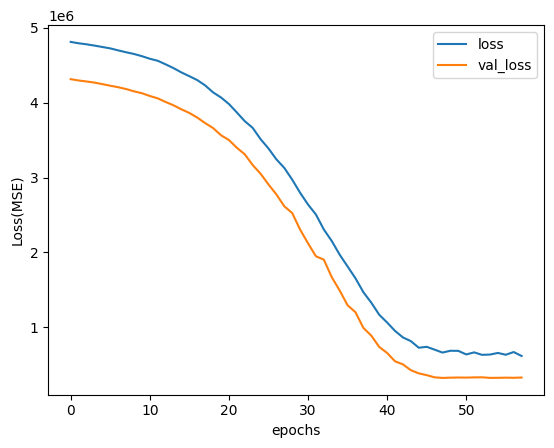

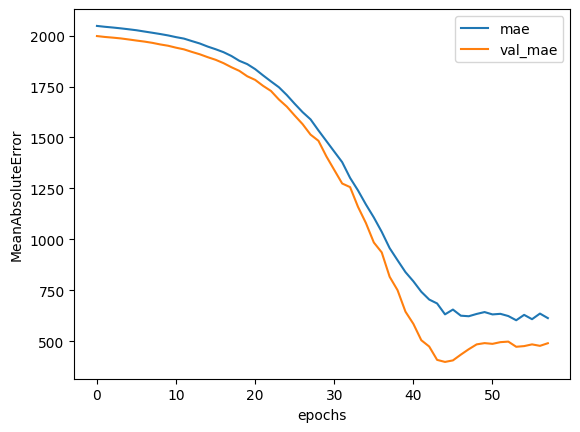

Best trial (test for office7):
  Value: 424254.3625
  Params: 
    activation: LeakyReLU
    batch_size: 64
    conv_layers_aircon: 1
    conv_layers_airvent: 1
    conv_layers_body: 3
    conv_layers_layout: 3
    dense_layers: 2
    dropout: 0.5
    filters_aircon-0: 192
    filters_airvent-0: 160
    filters_body-0: 224
    filters_body-1: 32
    filters_body-2: 128
    filters_layout-0: 224
    filters_layout-1: 192
    filters_layout-2: 128
    lr: 0.04899161190597068
    units-0: 320
    units-1: 256


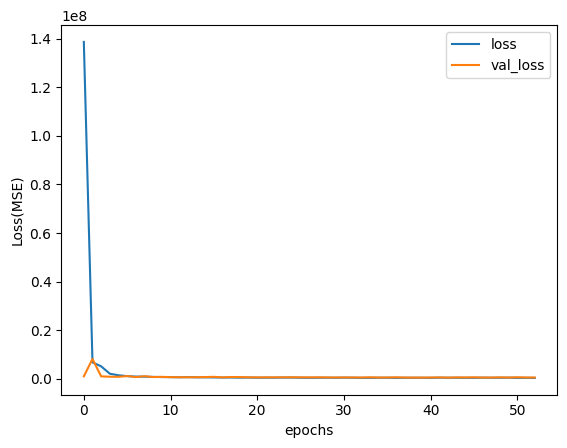

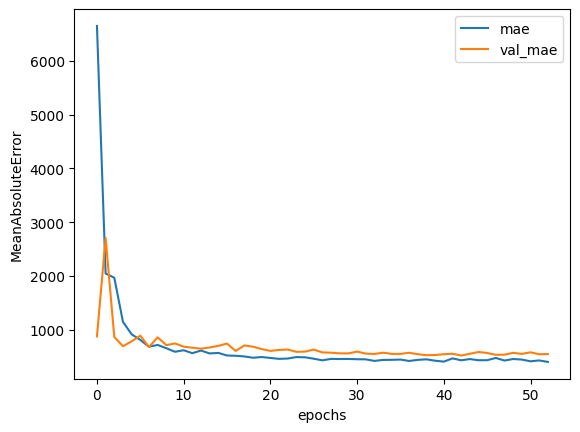

Best trial (test for office10):
  Value: 392899.2125
  Params: 
    activation: LeakyReLU
    batch_size: 16
    conv_layers_aircon: 3
    conv_layers_airvent: 3
    conv_layers_body: 1
    conv_layers_layout: 1
    dense_layers: 3
    dropout: 0.5
    filters_aircon-0: 96
    filters_aircon-1: 64
    filters_aircon-2: 96
    filters_airvent-0: 160
    filters_airvent-1: 128
    filters_airvent-2: 32
    filters_body-0: 96
    filters_layout-0: 32
    lr: 0.0029905290072667974
    units-0: 128
    units-1: 512
    units-2: 448


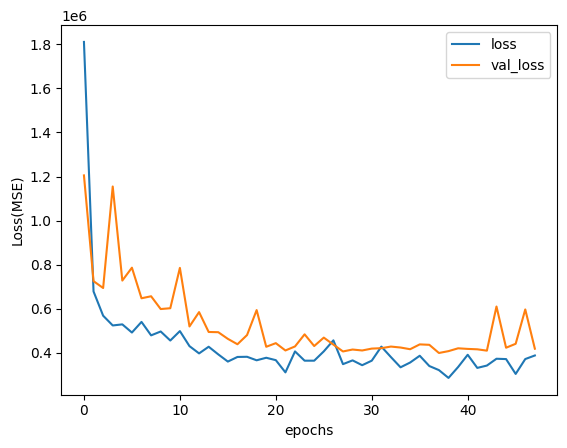

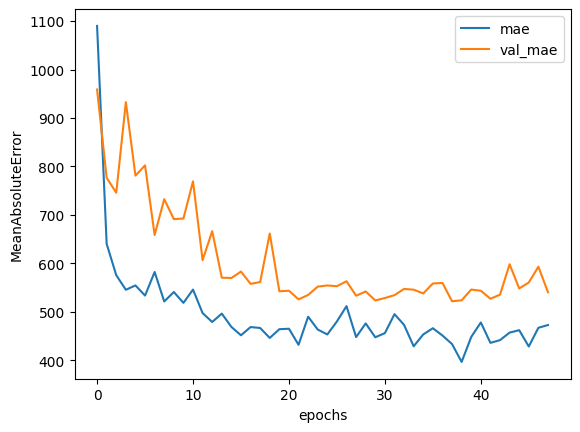

Best trial (test for office16):
  Value: 486593.465625
  Params: 
    activation: ReLU
    batch_size: 32
    conv_layers_aircon: 3
    conv_layers_airvent: 3
    conv_layers_body: 1
    conv_layers_layout: 3
    dense_layers: 2
    dropout: None
    filters_aircon-0: 256
    filters_aircon-1: 32
    filters_aircon-2: 224
    filters_airvent-0: 160
    filters_airvent-1: 96
    filters_airvent-2: 160
    filters_body-0: 128
    filters_layout-0: 96
    filters_layout-1: 256
    filters_layout-2: 32
    lr: 0.027385806961178365
    units-0: 512
    units-1: 512


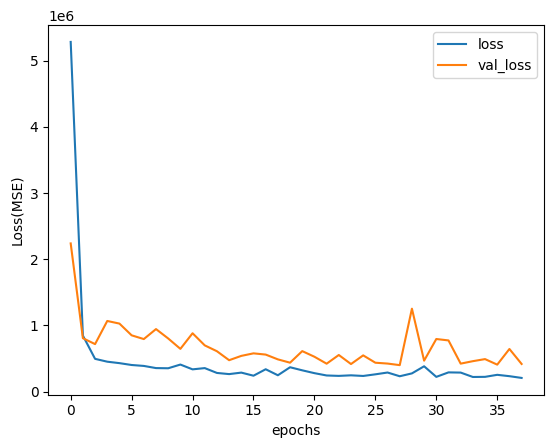

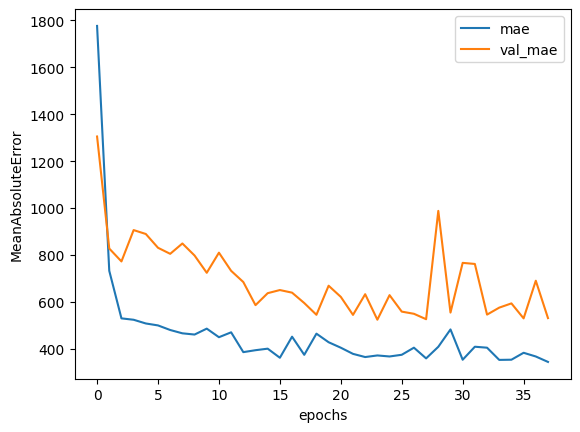

Best trial (test for office22):
  Value: 394687.49375
  Params: 
    activation: LeakyReLU
    batch_size: 64
    conv_layers_aircon: 1
    conv_layers_airvent: 1
    conv_layers_body: 1
    conv_layers_layout: 1
    dense_layers: 4
    dropout: 0.5
    filters_aircon-0: 160
    filters_airvent-0: 256
    filters_body-0: 32
    filters_layout-0: 128
    lr: 0.023994960542476844
    units-0: 192
    units-1: 512
    units-2: 512
    units-3: 320


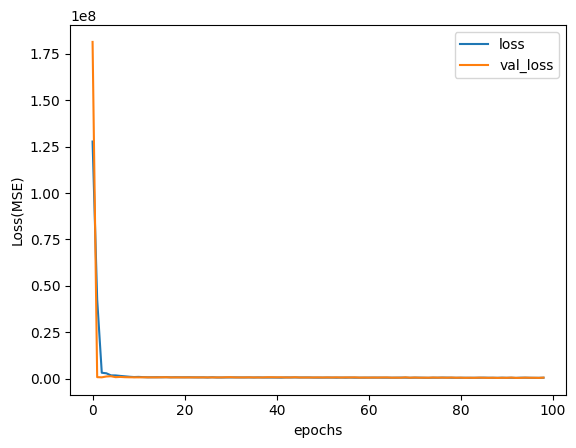

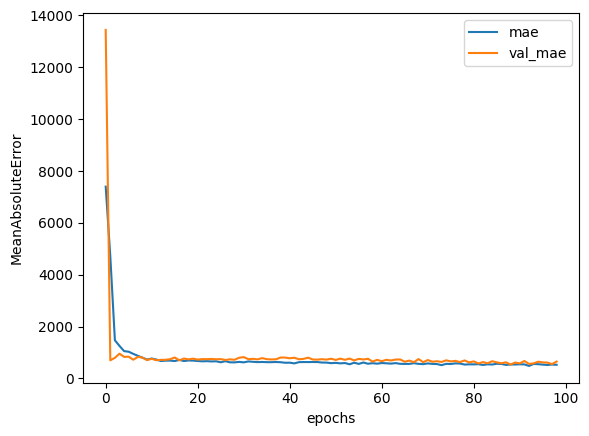

Best trial (test for office28):
  Value: 445027.7125
  Params: 
    activation: ELU
    batch_size: 16
    conv_layers_aircon: 2
    conv_layers_airvent: 3
    conv_layers_body: 2
    conv_layers_layout: 2
    dense_layers: 3
    dropout: 0.3
    filters_aircon-0: 192
    filters_aircon-1: 256
    filters_airvent-0: 64
    filters_airvent-1: 32
    filters_airvent-2: 32
    filters_body-0: 192
    filters_body-1: 256
    filters_layout-0: 224
    filters_layout-1: 32
    lr: 0.026065722434464138
    units-0: 448
    units-1: 64
    units-2: 64


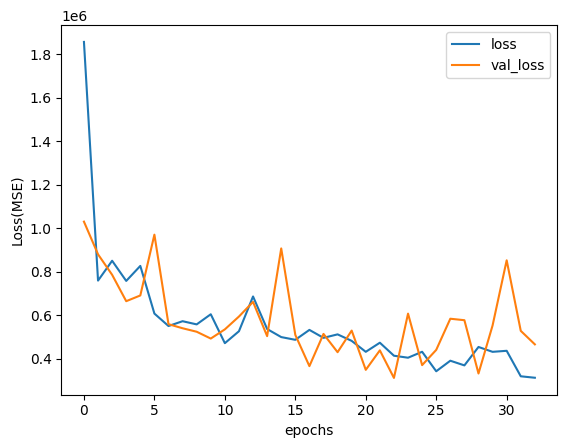

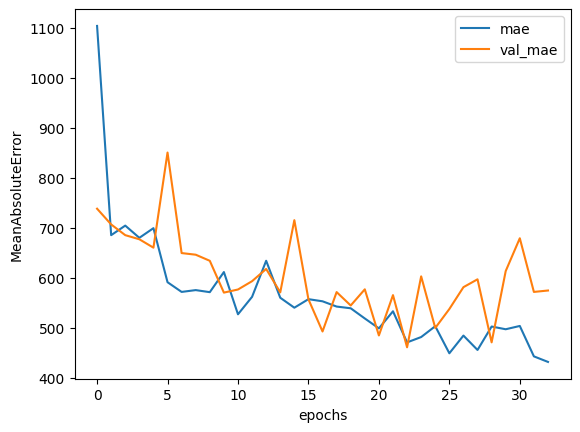

In [202]:
for test_office, result_dict in tuning_dict.items():
    print(f"Best trial (test for {test_office}):")
    best_trial = result_dict["best_trial"]

    print("  Value: {}".format(best_trial.value))

    print("  Params: ")
    for key, value in best_trial.params.items():
        print("    {}: {}".format(key, value))
        
    plot_history(result_dict["history"].history)

In [208]:
"""
最終テスト
チューナーに与えなかったオフィスを使って検証
"""

# db_path = '/mnt/MachineLearning/OptunaLog/optuna_study.db'

test_dict = {}

for test_office in test_office_list:
    print("test_office:", test_office)
    fit_office_list = [office for office in office_list if office != test_office]
    
    X_dict_fit, y_fit = get_officeDataset(fit_office_list, df_ml, pointCloud_dict, shuffle=True)
    X_dict_test, y_test = get_officeDataset([test_office], df_ml, pointCloud_dict, shuffle=False)
    
    study_name = test_office + '_is_test'

    loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

    best_trial = loaded_study.best_trial
    best_model = total_model_builder(best_trial)

    test_history = best_model.fit(
        X_dict_fit, y_fit,
        batch_size = loaded_study.best_params["batch_size"],
        epochs = 200,
        validation_data = (X_dict_test, y_test),
        # callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0, patience=20)]
    )
    
    test_dict[test_office] = {"best_trial":best_trial, "history":test_history}


test_office: office1
Epoch 1/200
4/4 [==============================] - 4s 225ms/step - loss: 4764363.0000 - mae: 2051.1885 - val_loss: 4502503.5000 - val_mae: 1944.2909
Epoch 2/200
4/4 [==============================] - 0s 58ms/step - loss: 4746044.5000 - mae: 2046.6191 - val_loss: 4481835.0000 - val_mae: 1938.9794
Epoch 3/200
4/4 [==============================] - 0s 60ms/step - loss: 4726043.5000 - mae: 2041.6791 - val_loss: 4462193.0000 - val_mae: 1933.8840
Epoch 4/200
4/4 [==============================] - 0s 54ms/step - loss: 4702403.5000 - mae: 2036.2140 - val_loss: 4435682.5000 - val_mae: 1927.0204
Epoch 5/200
4/4 [==============================] - 0s 56ms/step - loss: 4678207.5000 - mae: 2030.2843 - val_loss: 4398185.5000 - val_mae: 1917.2662
Epoch 6/200
4/4 [==============================] - 0s 55ms/step - loss: 4654301.5000 - mae: 2024.4225 - val_loss: 4369283.5000 - val_mae: 1909.7131
Epoch 7/200
4/4 [==============================] - 0s 54ms/step - loss: 4619955.5000 - mae

Best trial (test for office1):
  Value: 391548.253125
  Params: 
    activation: ReLU
    batch_size: 128
    conv_layers_aircon: 2
    conv_layers_airvent: 3
    conv_layers_body: 3
    conv_layers_layout: 2
    dense_layers: 2
    dropout: 0.5
    filters_aircon-0: 256
    filters_aircon-1: 192
    filters_airvent-0: 224
    filters_airvent-1: 64
    filters_airvent-2: 256
    filters_body-0: 224
    filters_body-1: 32
    filters_body-2: 160
    filters_layout-0: 224
    filters_layout-1: 64
    lr: 0.00017895769457958164
    units-0: 128
    units-1: 128


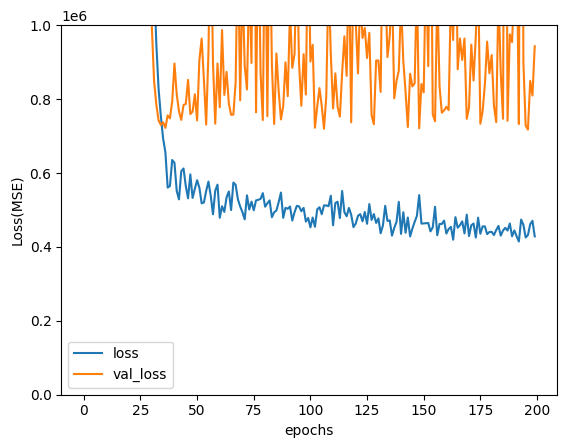

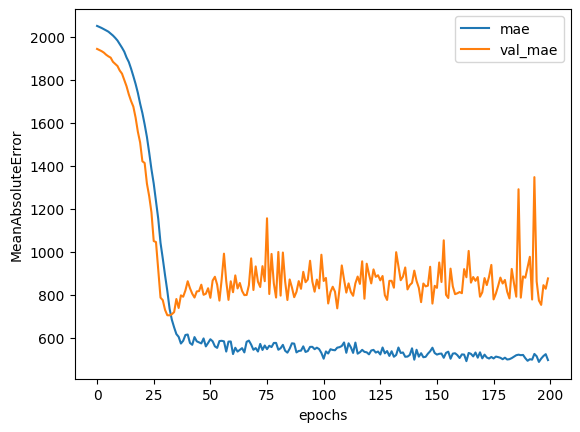

Best trial (test for office7):
  Value: 424254.3625
  Params: 
    activation: LeakyReLU
    batch_size: 64
    conv_layers_aircon: 1
    conv_layers_airvent: 1
    conv_layers_body: 3
    conv_layers_layout: 3
    dense_layers: 2
    dropout: 0.5
    filters_aircon-0: 192
    filters_airvent-0: 160
    filters_body-0: 224
    filters_body-1: 32
    filters_body-2: 128
    filters_layout-0: 224
    filters_layout-1: 192
    filters_layout-2: 128
    lr: 0.04899161190597068
    units-0: 320
    units-1: 256


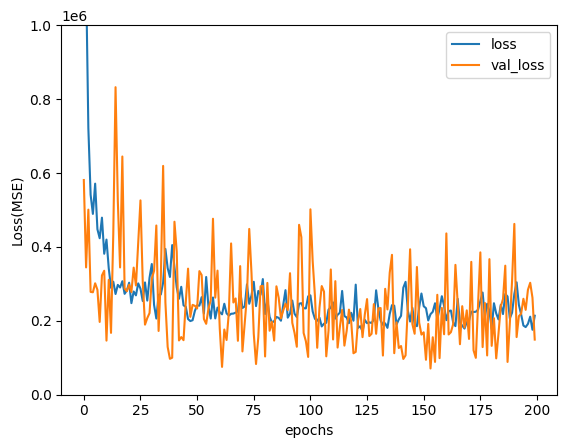

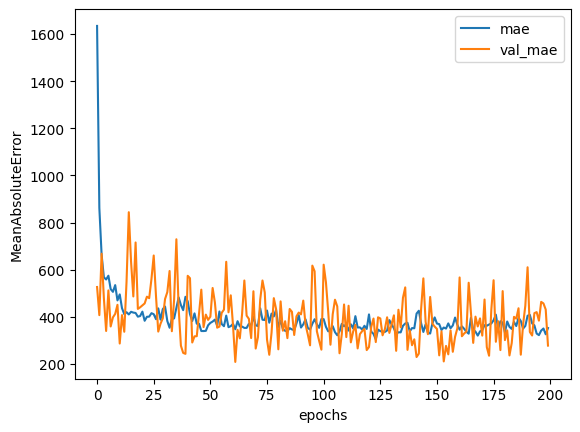

Best trial (test for office10):
  Value: 392899.2125
  Params: 
    activation: LeakyReLU
    batch_size: 16
    conv_layers_aircon: 3
    conv_layers_airvent: 3
    conv_layers_body: 1
    conv_layers_layout: 1
    dense_layers: 3
    dropout: 0.5
    filters_aircon-0: 96
    filters_aircon-1: 64
    filters_aircon-2: 96
    filters_airvent-0: 160
    filters_airvent-1: 128
    filters_airvent-2: 32
    filters_body-0: 96
    filters_layout-0: 32
    lr: 0.0029905290072667974
    units-0: 128
    units-1: 512
    units-2: 448


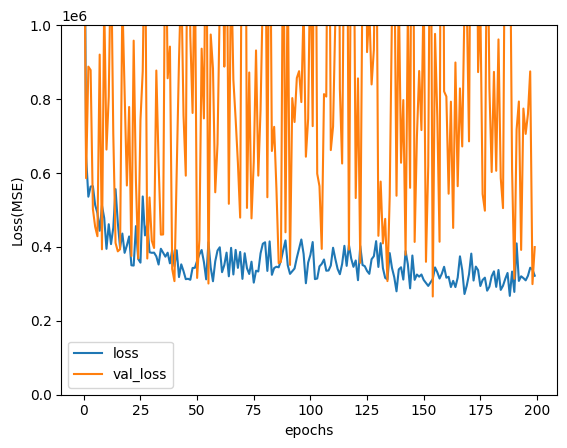

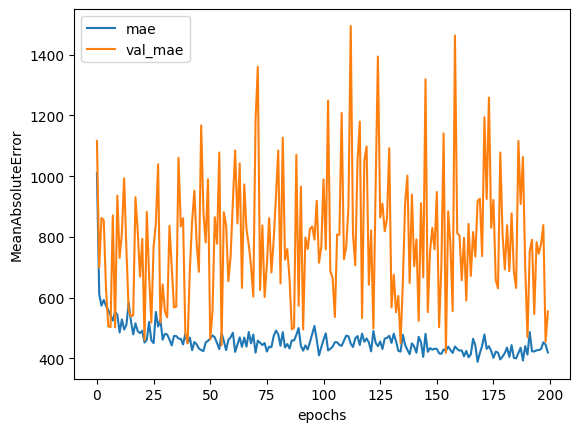

Best trial (test for office16):
  Value: 486593.465625
  Params: 
    activation: ReLU
    batch_size: 32
    conv_layers_aircon: 3
    conv_layers_airvent: 3
    conv_layers_body: 1
    conv_layers_layout: 3
    dense_layers: 2
    dropout: None
    filters_aircon-0: 256
    filters_aircon-1: 32
    filters_aircon-2: 224
    filters_airvent-0: 160
    filters_airvent-1: 96
    filters_airvent-2: 160
    filters_body-0: 128
    filters_layout-0: 96
    filters_layout-1: 256
    filters_layout-2: 32
    lr: 0.027385806961178365
    units-0: 512
    units-1: 512


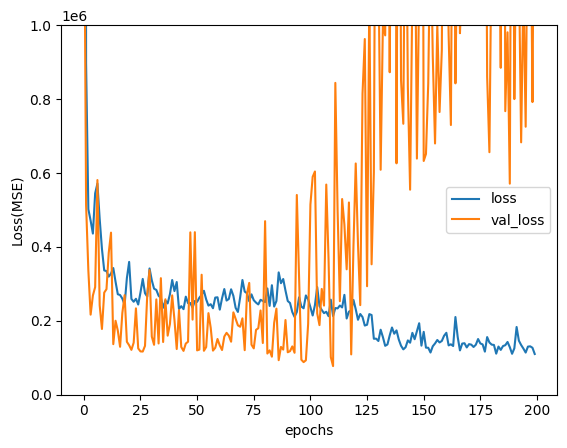

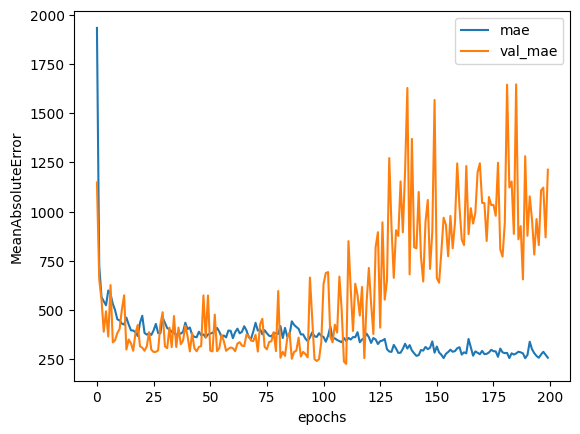

Best trial (test for office22):
  Value: 394687.49375
  Params: 
    activation: LeakyReLU
    batch_size: 64
    conv_layers_aircon: 1
    conv_layers_airvent: 1
    conv_layers_body: 1
    conv_layers_layout: 1
    dense_layers: 4
    dropout: 0.5
    filters_aircon-0: 160
    filters_airvent-0: 256
    filters_body-0: 32
    filters_layout-0: 128
    lr: 0.023994960542476844
    units-0: 192
    units-1: 512
    units-2: 512
    units-3: 320


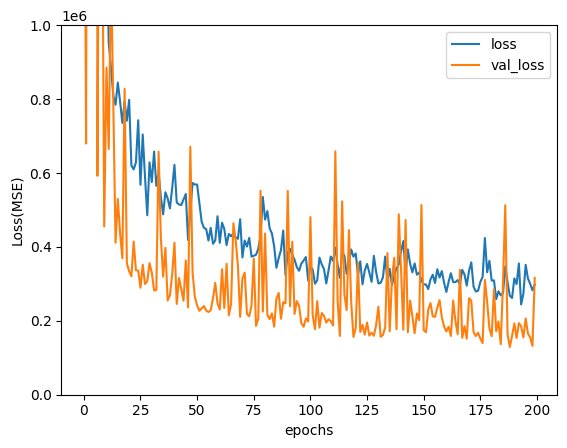

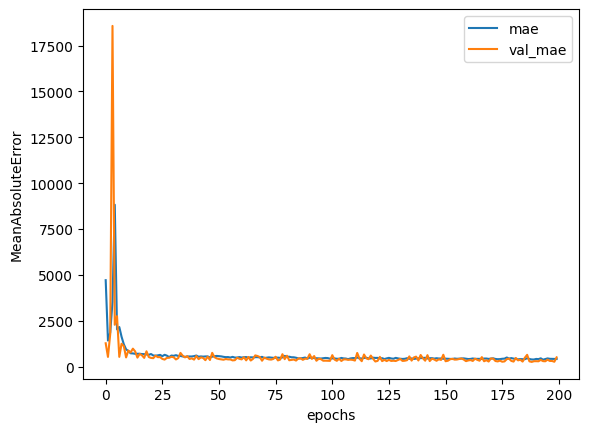

Best trial (test for office28):
  Value: 445027.7125
  Params: 
    activation: ELU
    batch_size: 16
    conv_layers_aircon: 2
    conv_layers_airvent: 3
    conv_layers_body: 2
    conv_layers_layout: 2
    dense_layers: 3
    dropout: 0.3
    filters_aircon-0: 192
    filters_aircon-1: 256
    filters_airvent-0: 64
    filters_airvent-1: 32
    filters_airvent-2: 32
    filters_body-0: 192
    filters_body-1: 256
    filters_layout-0: 224
    filters_layout-1: 32
    lr: 0.026065722434464138
    units-0: 448
    units-1: 64
    units-2: 64


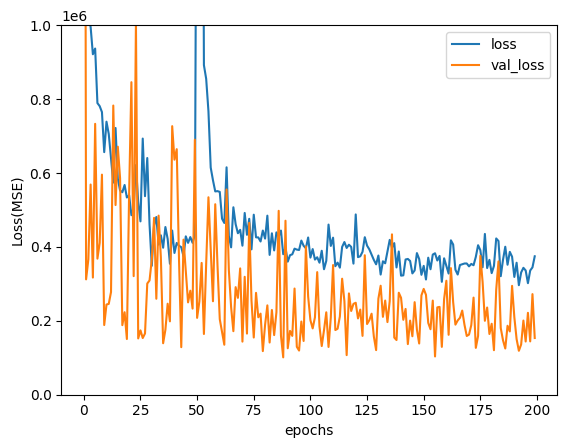

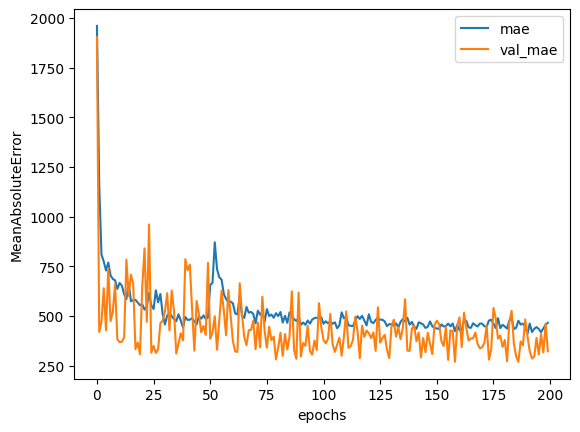

In [209]:
for test_office, result_dict in test_dict.items():
    print(f"Best trial (test for {test_office}):")
    best_trial = result_dict["best_trial"]

    print("  Value: {}".format(best_trial.value))

    print("  Params: ")
    for key, value in best_trial.params.items():
        print("    {}: {}".format(key, value))
        
        
    plot_history(result_dict["history"].history, ymax=1.0e6)

test_office: office10
Epoch 1/200
26/26 [==============================] - 3s 22ms/step - loss: 1806765.3750 - mae: 1048.1707 - val_loss: 2001661.1250 - val_mae: 1274.5077
Epoch 2/200
26/26 [==============================] - 0s 11ms/step - loss: 645574.8125 - mae: 623.3447 - val_loss: 506618.0312 - val_mae: 587.4644
Epoch 3/200
26/26 [==============================] - 0s 11ms/step - loss: 522690.8438 - mae: 567.1602 - val_loss: 793949.4375 - val_mae: 823.4261
Epoch 4/200
26/26 [==============================] - 0s 9ms/step - loss: 537650.1250 - mae: 579.5396 - val_loss: 793835.9375 - val_mae: 819.6176
Epoch 5/200
26/26 [==============================] - 0s 12ms/step - loss: 550768.5000 - mae: 557.9266 - val_loss: 474172.0000 - val_mae: 585.9818
Epoch 6/200
26/26 [==============================] - 0s 10ms/step - loss: 541292.8750 - mae: 582.3470 - val_loss: 469976.5625 - val_mae: 496.2900
Epoch 7/200
26/26 [==============================] - 0s 10ms/step - loss: 487827.2188 - mae: 536.72

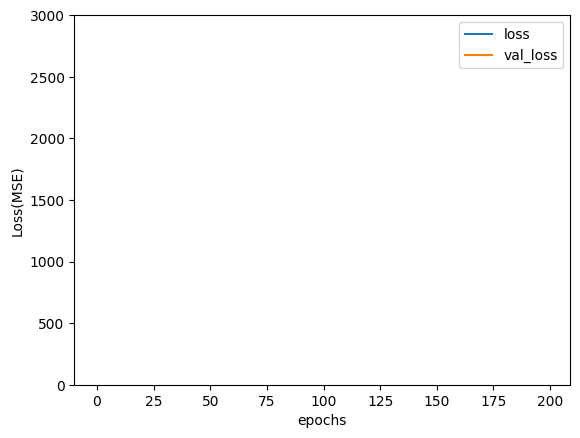

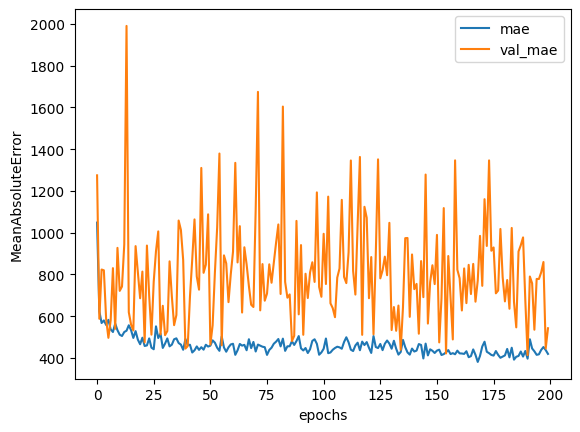

In [210]:
"""
最終テスト
only office10
"""

test_office="office10"

print("test_office:", test_office)
fit_office_list = [office for office in office_list if office != test_office]
    
X_dict_fit, y_fit = get_officeDataset(fit_office_list, df_ml, pointCloud_dict, shuffle=True)
X_dict_test, y_test = get_officeDataset([test_office], df_ml, pointCloud_dict, shuffle=False)

study_name = test_office + '_is_test'

loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

best_trial = loaded_study.best_trial
best_model = total_model_builder(best_trial)

test_history = best_model.fit(
    X_dict_fit, y_fit,
    batch_size = loaded_study.best_params["batch_size"],
    epochs = 200,
    validation_data = (X_dict_test, y_test),
    # callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0, patience=20)]
)

print("  Value: {}".format(best_trial.value))

print("  Params: ")
for key, value in best_trial.params.items():
    print("    {}: {}".format(key, value))

plot_history(test_history.history, ymax=3000.)

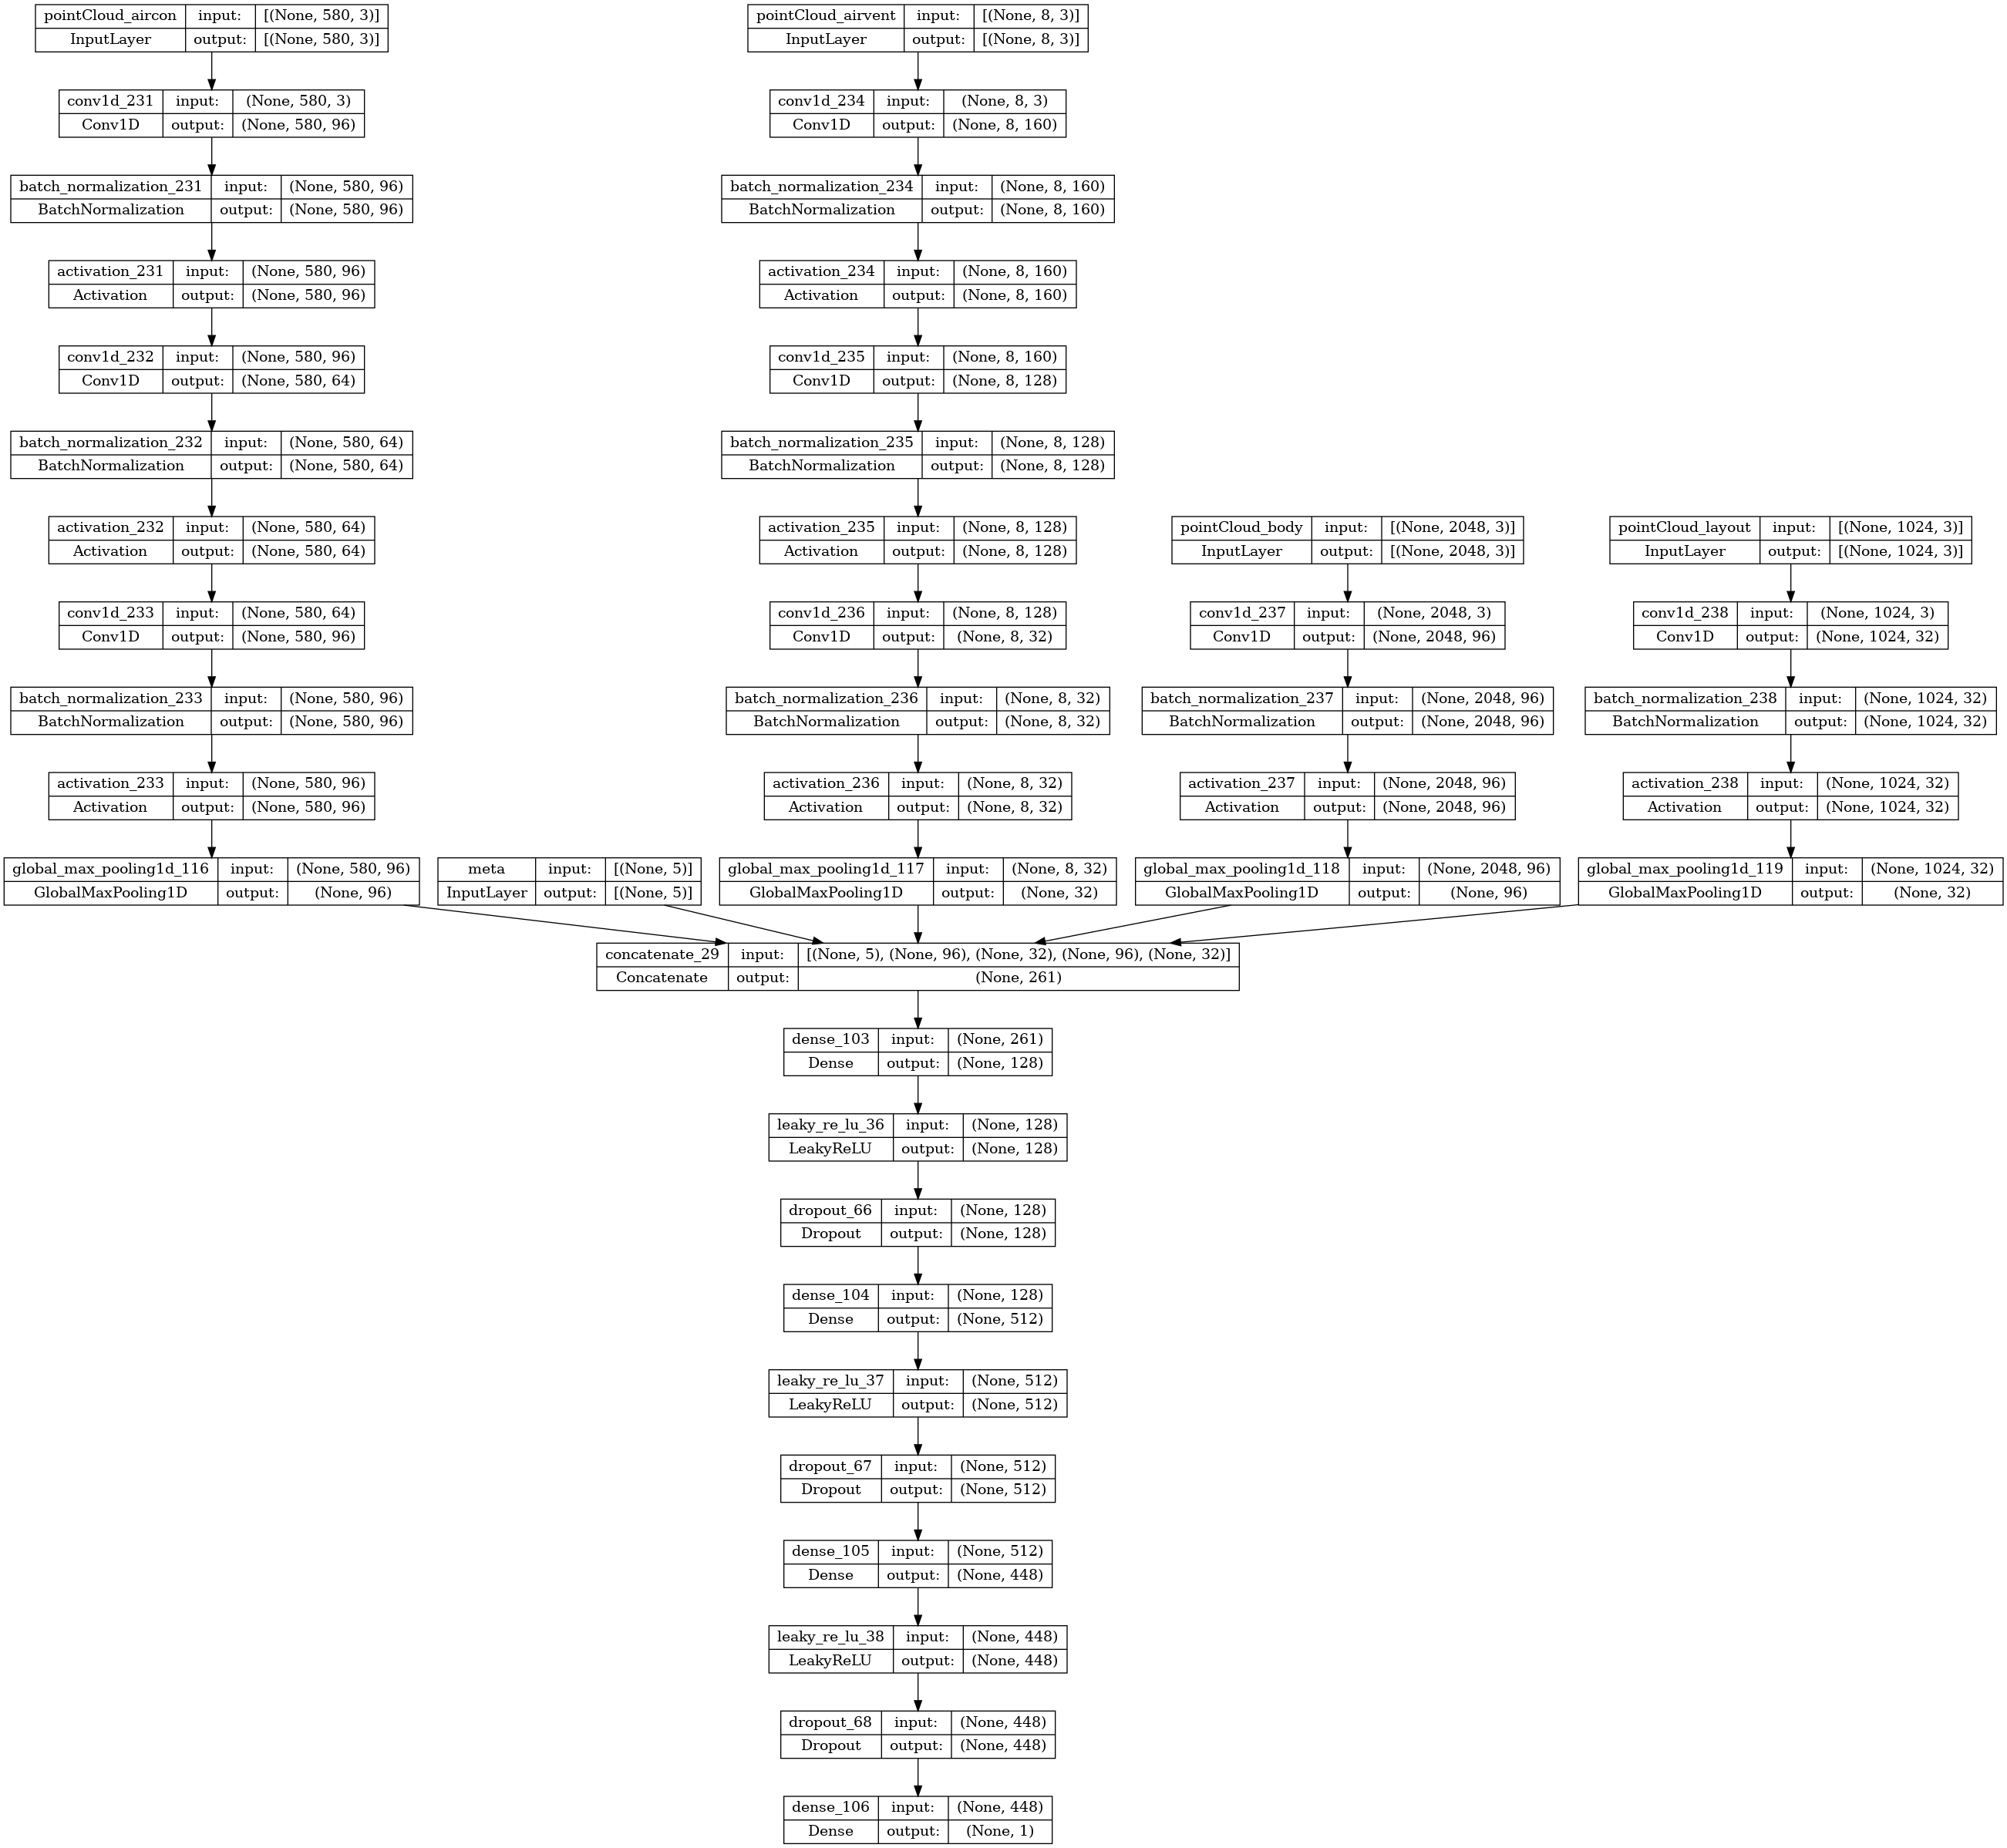

In [211]:
keras.utils.plot_model(best_model, show_shapes=True)

In [212]:
y_fit_pred = best_model.predict(X_dict_fit)
y_test_pred = best_model.predict(X_dict_test)

1/1 [==============================] - 0s 26ms/step


In [230]:
X_dict_fit

{'meta':                          aircon  ventilation  exhaust_a  exhaust_b  \
 case_name                                                            
 office4_660_82_bout    0.446455    -0.689460  -0.871311   1.147695   
 office28_360_164_aout -0.385821     0.288031   1.147695  -0.871311   
 office14_0_246_aout   -1.384552     1.265523   1.147695  -0.871311   
 office14_960_164_aout  1.278731     0.288031   1.147695  -0.871311   
 office14_360_164_bout -0.385821     0.288031  -0.871311   1.147695   
 ...                         ...          ...        ...        ...   
 office28_0_246_bout   -1.384552     1.265523  -0.871311   1.147695   
 office4_360_82_bout   -0.385821    -0.689460  -0.871311   1.147695   
 office1_960_246_aout   1.278731     1.265523   1.147695  -0.871311   
 office15_660_82_aout   0.446455    -0.689460   1.147695  -0.871311   
 office6_960_0          1.278731    -1.666952  -0.871311  -0.871311   
 
                        exhaust_off  
 case_name                   

In [238]:
def show_office_residual_plot(train_x, train_y, test_x, test_y, office_array, figsize=[10, 8]):
    xlim = [min(min(train_x), min(test_x))-5, max(max(train_x), max(test_x))+5]
    fig= plt.figure(figsize=figsize)

    plt.figure(figsize=[10, 8])

    #カラーマップ等の準備
    markers = ("s", "x", "o", "^", "v", "<", ">", "1", "2", "3", "4", "8")
    colors = ("red", "blue", "limegreen", "gray", "cyan", "black", "purple", "green",
              "orange", "yellow", "crimson", "goldenrod", "orchid", "khaki", "darkgray")

    idx = 0
    for target_office_name in np.unique(office_list):
        if target_office_name == "office10":
            continue
            
        target_office_index = [i for i in range(len(office_array)) if target_office_name+"_" in office_array[i]]
        print(target_office_name, len(target_office_index))
        
        plt.scatter(train_x[target_office_index], train_y[target_office_index], 
                    s=80, c=colors[idx], marker=markers[2], edgecolor="white", label="Training:"+target_office_name)
        
        idx+=1
        
    plt.scatter(test_x, test_y, s=80, c="steelblue", marker="x", edgecolor="white", label="Test data")
    plt.xlabel("Predicted values")
    plt.ylabel("Residuals")
    plt.legend(loc="best")
    plt.hlines(y=0, xmin=xlim[0], xmax=xlim[1], color="black", lw=2)
    plt.xlim(xlim)
    plt.tight_layout()
    plt.show()

In [239]:
y_fit.to_numpy().shape

(403,)

In [240]:
X_dict_fit["meta"].index

Index(['office4_660_82_bout', 'office28_360_164_aout', 'office14_0_246_aout',
       'office14_960_164_aout', 'office14_360_164_bout', 'office7_0_246_bout',
       'office4_660_82_aout', 'office16_960_164_bout', 'office22_660_82_aout',
       'office7_0_82_bout',
       ...
       'office16_0_246_bout', 'office2_360_164_bout', 'office5_360_82_aout',
       'office4_660_164_bout', 'office8_660_164_bout', 'office28_0_246_bout',
       'office4_360_82_bout', 'office1_960_246_aout', 'office15_660_82_aout',
       'office6_960_0'],
      dtype='object', name='case_name', length=403)

office1 39
office14 28
office15 28
office16 28
office2 28
office22 28
office28 28
office3 28
office4 28
office5 28
office6 28
office7 28
office8 28
office9 28


/tmp/ipykernel_745275/113909597.py:25: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(test_x, test_y, s=80, c="steelblue", marker="x", edgecolor="white", label="Test data")


<Figure size 1000x800 with 0 Axes>

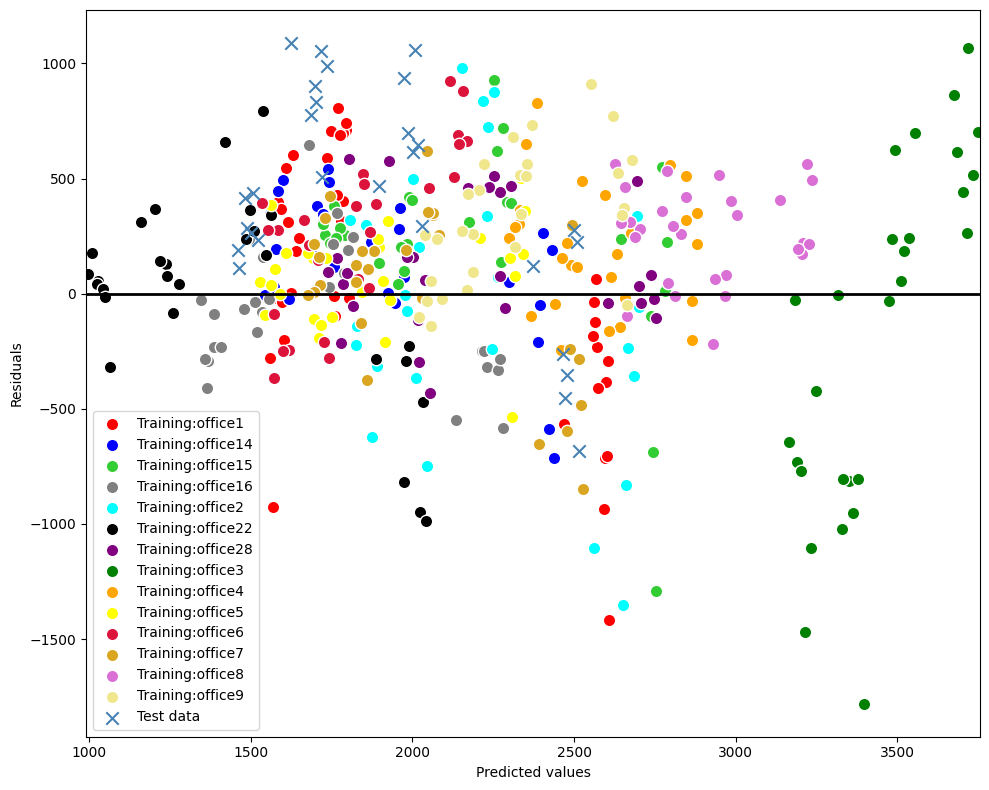

In [241]:
# #正規表現で書いており、.extractはパターンにマッチした最初の文字列のみを抜き出す。office+0-9までの数字1桁または2桁を探索
# office_array = X_index.str.extract("(office+[0-9]{1,2})").to_numpy()

#残差プロット
show_office_residual_plot(train_x=y_fit_pred, train_y=y_fit_pred - y_fit.to_numpy().reshape((-1,1)), 
                            test_x=y_test_pred, test_y=y_test_pred - y_test.to_numpy().reshape((-1,1)), 
                            office_array=X_dict_fit["meta"].index
                                  )

In [133]:
X_dict_fit

{'meta': array([[-1.38455178,  1.2655225 , -0.87131147,  1.14769521, -0.39824886],
        [ 1.27873108,  1.2655225 ,  1.14769521, -0.87131147, -0.39824886],
        [-1.38455178,  1.2655225 ,  1.14769521, -0.87131147, -0.39824886],
        ...,
        [ 0.44645519,  1.2655225 , -0.87131147,  1.14769521, -0.39824886],
        [ 1.27873108, -0.68946029, -0.87131147,  1.14769521, -0.39824886],
        [ 0.44645519, -1.66695169, -0.87131147, -0.87131147,  2.51099278]]),
 'pointCloud_aircon': array([[[ 1.3765091 , -2.0106473 , -0.52029866],
         [ 1.3765091 , -1.8412895 , -0.52029866],
         [ 1.3765091 , -1.7396748 , -0.52029866],
         ...,
         [ 2.7313716 , -0.92675734, -0.52029866],
         [ 2.7313716 , -0.8251426 , -0.52029866],
         [ 2.7313716 , -0.6557848 , -0.52029866]],
 
        [[-0.6557848 , -0.99450046, -0.52029866],
         [-0.6557848 , -0.8251426 , -0.52029866],
         [-0.6557848 , -0.72352785, -0.52029866],
         ...,
         [ 0.6990778 ,  0

In [137]:
import gc
 
gc.collect()

38460

In [136]:
from keras.backend import clear_session

# Clear clutter from previous Keras session graphs.
clear_session()